<a href="https://colab.research.google.com/github/Salahaldeenibrahim/Dementia_Prediction/blob/main/PreDIAG_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.1 MB/s eta 0:00:00


In [2]:
pip install bayesian-optimization

In [3]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 3.6 MB/s eta 0:00:00


In [4]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 16.2 MB/s eta 0:00:00


In [5]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.4 MB/s eta 0:00:00


In [6]:
pip install numpy

In [7]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.1 MB/s eta 0:00:00


In [8]:
pip install neuroHarmonize

In [9]:
pip install nibabel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.8 MB/s eta 0:00:00


In [10]:
pip install neuroCombat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neuroCombat: filename=neurocombat-0.2.12-py3-none-any.whl size=6397 sha256=0e8f1c787d85796af1a1751cd3fa5231303733229d95d5b0d46736f1ad750400
  Stored in directory: /root/.cache/pip/wheels/b0/f8/c9/375ca529543b8b0a6abc4d9243e8d951209220c1a6dc892f24
Successfully built neuroCombat


In [11]:

from sklearn.metrics import balanced_accuracy_score

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score,
                             confusion_matrix, balanced_accuracy_score)

# ***CLASS DISTRUBTION***

I ran a table count for all of the pathological diagnosis, to recheck for any possible coloumns that could be worked with(have moderate class imbalance). Based on the results of the code below 'NPPFTLD', 'NPPLEWY', and 'NPCLEWY'may have enough data to work withprimarily NPPLEWY as its moderately balanced.

In [12]:
from google.colab import files

uploaded = files.upload()

import pandas as pd
# Load the dataset
df = pd.read_csv('investigator_ftldlbd_nacc64 (1).csv.gz', low_memory=False)

# List of target columns of interest
target_columns = [
    'NPCNORM', 'NPPADP', 'NPCADP', 'NPPAD', 'NPCAD',
    'NPPLEWY', 'NPCLEWY', 'NPPVASC', 'NPCVASC',
    'NPPFTLD', 'NPCFTLD', 'NPPHIPP', 'NPCHIPP',
    'NPPPRION', 'NPCPRION', 'NPPOTH1', 'NPCOTH1',
    'NPPOTH2', 'NPCOTH2', 'NPPOTH3', 'NPCOTH3'
]

# Function to count occurrences of each unique value in target columns
def count_categories(df, columns):
    counts = {}
    for col in columns:
        counts[col] = df[col].value_counts()
    return pd.DataFrame(counts).fillna(0).astype(int)

# Get the table of counts for all target columns
target_counts = count_categories(df, target_columns)

# Print the table of counts
print(target_counts)

Saving investigator_ftldlbd_nacc64 (1).csv.gz to investigator_ftldlbd_nacc64 (1).csv.gz
      NPCNORM  NPPADP  NPCADP   NPPAD   NPCAD  NPPLEWY  NPCLEWY  NPPVASC  \
-4.0   152514  152514  152514  152514  152514   152514   152514   152514   
 0.0        4       4       4       0       4        4        4        4   
 1.0       45     793     756    4669     605      792     1200      540   
 2.0     6860    6326    6253    3120    6513     6230     5889     6595   

      NPCVASC  NPPFTLD  ...  NPPHIPP  NPCHIPP  NPPPRION  NPCPRION  NPPOTH1  \
-4.0   152514   152514  ...   152514   152514    152514    152514   152514   
 0.0        4        4  ...        4        4         4         4        4   
 1.0     2264      686  ...      145      610        79        13      521   
 2.0     5161     6306  ...     6772     6335      6796      6857     6422   

      NPCOTH1  NPPOTH2  NPCOTH2  NPPOTH3  NPCOTH3  
-4.0   152514   152514   152514   152514   152514  
 0.0        4        4        4     

# **Demographics of Diseases**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# Summary Table: Patient Characteristics
# ------------------------------

# Define functions for summary calculations
def calculate_summary_stats(group, column, dtype='numeric', unknown_values=[]):
    """Helper function to calculate summary statistics."""
    if dtype == 'numeric':
        valid_data = group[~group[column].isin(unknown_values)][column]  # Exclude unknown values
        mean = valid_data.mean()
        std = valid_data.std()
        return f"{mean:.1f} ({std:.1f})"
    elif dtype == 'categorical':
        valid_data = group[~group[column].isin(unknown_values)][column]
        counts = valid_data.value_counts(normalize=True) * 100
        return counts.to_dict()

# Initialize a dictionary to store results
summary_table = {}

# Loop through each target disease to calculate patient characteristics
for disease in ['NPPAD', 'NPCVASC', 'NPPFTLD', 'NPPLEWY', 'NPCLEWY']:
    # Select patients for the specific disease
    disease_group = df[df[disease] == 1]  # Filter for positive cases

    # Calculate total number of participants
    total_participants = len(disease_group)

    # Calculate mean and standard deviation for age and education
    age_stats = calculate_summary_stats(disease_group, 'NACCAGE', dtype='numeric', unknown_values=[])
    education_stats = calculate_summary_stats(disease_group, 'EDUC', dtype='numeric', unknown_values=[99])

    # Calculate gender distribution
    gender_distribution = calculate_summary_stats(disease_group, 'SEX', dtype='categorical', unknown_values=[])
    female_percentage = gender_distribution.get(2, 0)  # Assuming 2 = Female

    # Calculate race distribution
    race_distribution = calculate_summary_stats(
        disease_group, 'RACE', dtype='categorical', unknown_values=[50, 99]
    )

    # Calculate Hispanic ethnicity
    hispanic_distribution = calculate_summary_stats(
        disease_group, 'HISPANIC', dtype='categorical', unknown_values=[9]
    )
    hispanic_percentage = hispanic_distribution.get(1, 0)  # Assuming 1 = Hispanic

    # Add results to the summary table
    summary_table[disease] = {
        'Number of Participants': total_participants,
        'Age (years, mean ± SD)': age_stats,
        'Female, n (%)': f"{int(total_participants * female_percentage / 100)} ({female_percentage:.1f}%)",
        'Education (years, mean ± SD)': education_stats,
        'Race (%)': race_distribution,
        'Hispanic ethnicity, n (%)': f"{int(total_participants * hispanic_percentage / 100)} ({hispanic_percentage:.1f}%)"
    }

# Convert summary table to a DataFrame for better visualization
summary_df = pd.DataFrame(summary_table).T

# Print the summary table
print("Table 1: Patient Summary Characteristics")
print(summary_df.to_string())

# Save summary table as CSV
summary_df.to_csv("Table_1_All_Sample_Summary.csv", index=True)

# ------------------------------
# Co-diagnosis Analysis
# ------------------------------

# Create a DataFrame to store co-diagnosis counts for each pair of diseases
disease_names = ['NPPAD', 'NPCVASC', 'NPPFTLD', 'NPPLEWY', 'NPCLEWY']
co_diag = pd.DataFrame(index=disease_names, columns=disease_names)

for d1 in disease_names:
    for d2 in disease_names:
        count = df[(df[d1] == 1) & (df[d2] == 1)].shape[0]
        co_diag.loc[d1, d2] = count

print("\nCo-diagnosis Counts:")
print(co_diag)

# Save co-diagnosis table as CSV
co_diag.to_csv("CoDiagnosis_Counts.csv")

# ------------------------------
# Correlation between True and Predicted Diagnosis
# ------------------------------

# Assume predicted diagnosis columns exist with a "_pred" suffix.
predicted_columns = {disease: f"{disease}_pred" for disease in disease_names}

# Check that all predicted columns exist in the dataframe
if all(col in df.columns for col in predicted_columns.values()):
    true_diag = df[disease_names]
    pred_diag = df[list(predicted_columns.values())]

    # Compute Pearson correlations between true and predicted diagnosis for each disease
    correlations = {}
    for disease in disease_names:
        corr = true_diag[disease].corr(pred_diag[predicted_columns[disease]])
        correlations[disease] = corr

    corr_df = pd.DataFrame(list(correlations.items()), columns=["Disease", "True-Predicted Correlation"]).set_index("Disease")

    print("\nCorrelation between True and Predicted Diagnosis:")
    print(corr_df)

    # Plot correlation heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation between True and Predicted Diagnosis")
    plt.savefig("True_Predicted_Correlation_Heatmap.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\nPredicted diagnosis columns not found in the dataframe. Skipping correlation analysis.")


Table 1: Patient Summary Characteristics
        Number of Participants Age (years, mean ± SD) Female, n (%) Education (years, mean ± SD)                                                                                     Race (%) Hispanic ethnicity, n (%)
NPPAD                     2884            80.0 (10.3)  1313 (45.5%)                   15.1 (3.1)                          {1: 94.81197771587743, 2: 4.282729805013927, 5: 0.9052924791086351}                 97 (3.4%)
NPCVASC                   1434             82.5 (9.0)   673 (46.9%)                   15.1 (3.3)  {1: 94.10526315789474, 2: 5.263157894736842, 5: 0.4912280701754386, 4: 0.14035087719298245}                 42 (3.0%)
NPPFTLD                    376            72.2 (10.3)   182 (48.4%)                   14.6 (3.6)   {1: 88.94878706199461, 2: 9.433962264150944, 3: 0.8086253369272237, 5: 0.8086253369272237}                 17 (4.6%)
NPPLEWY                    473             77.1 (8.1)   121 (25.6%)                   15.8 (3.0

## **PRE-DIAGNOSIS FILTERING**

Used the two variables below (NACCIDEM and NACCUDSD), first found the patients who eventually progressed to dementia using the NACCIDEM variable. Then, I use the NACCUDSD to filter out the patients who were diagnosed with dementia in there first visit, additionally, I used patients who did not progress to dementia to help predict the negative class (class imbalance maintainace).

In [13]:
# Filter participants who progressed to dementia
dementia_progression = df[df['NACCIDEM'] == 1]

# Identify pre-diagnosis visits (exclude visits with dementia)
pre_diagnosis_dementia = dementia_progression[dementia_progression['NACCUDSD'] < 4]

# Include all visits for participants who did not progress to dementia
no_dementia = df[df['NACCIDEM'] == 0]

# Combine datasets
pre_diagnosis_visits = pd.concat([pre_diagnosis_dementia, no_dementia])

# Check dataset size
print("Pre-diagnosis dataset size:", pre_diagnosis_visits.shape)




Pre-diagnosis dataset size: (128858, 1936)


# DATA CLEANING

In [14]:
# 0. (Optional) Quick check: make sure NACCADC really exists in your raw file
df = pd.read_csv(
    'investigator_ftldlbd_nacc64 (1).csv.gz',
    low_memory=False
)
if 'NACCADC' not in df.columns:
    raise KeyError("**NACCADC** column not found in your raw CSV. Please check the spelling/capitalization.")

# 1. Drop all the other non-numeric columns (but keep NACCADC)
non_numeric_columns = [
    'DRUG1', 'DRUG2', 'DRUG3', 'DRUG4', 'DRUG5', 'DRUG6',
    'MOCALANX', 'RESPOTHX', 'ADGCRND', 'ADGCEXR',
    'NGDSGWAC', 'NGDSEXAC', 'NGDSWGAC', 'NGDSWEAC',
    'PATIENT_KEY', 'NACCAUTP', 'MMSELOC', 'NPSYCLOC', 'NACCNCRD'
]
# filter out any entry that isn’t in df, and ensure we never drop NACCADC
to_drop = [c for c in non_numeric_columns if c in df.columns and c != 'NACCADC']
df_cleaned = df.drop(columns=to_drop).copy()

# 2. (Safety) Re‑attach NACCADC from the original, in case something odd happened above
df_cleaned['NACCADC'] = df['NACCADC']

# 3. Filter for pre-diagnosis visits
pre_diagnosis_df = df_cleaned[
    ((df_cleaned['NACCIDEM'] == 1) & (df_cleaned['NACCUDSD'] != 4)) |
    (df_cleaned['NACCIDEM'] == 0)
]
print("Filtered pre-diagnosis dataset size:", pre_diagnosis_df.shape)


# At this point:
#   - `features` definitely contains the NACCADC column
#   - `targets` contains only your 5 binary outcomes


Filtered pre-diagnosis dataset size: (128858, 1918)


# Model Training

In [15]:
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score,
                             confusion_matrix)
import xgboost as xgb
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import VarianceThreshold

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.impute._base")
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message=".*Ill-conditioned matrix.*")

# Enhanced Configuration
MIN_SAMPLES_PER_ADC = 200
SMOTE_SAMPLING_STRATEGY = 0.85  # More conservative than 'auto'
EARLY_STOPPING_ROUNDS = 50
N_JOBS = -1
TREE_METHOD = 'gpu_hist' if xgb.__version__ >= '1.5.0' else 'hist'

disease_names = {
    'NPPAD': "Alzheimer's Disease",
    'NPCVASC': "Vascular Dementia",
    'NPPFTLD': "Frontotemporal Lobar Degeneration",
    'NPPLEWY': "Lewy Body Dementia",
    'NPCLEWY': "Lewy Body Dementia Contributing"
}

In [16]:
# Cell 2: Error-Free Data Preprocessing
print("Starting data preprocessing...")
pre_diagnosis_df = pre_diagnosis_df.copy()

# Convert features with NaN-safe numeric conversion
for col in pre_diagnosis_df.columns:
    if col != 'NACCADC' and col not in disease_names:
        # Convert to numeric, coercing errors to NaN
        pre_diagnosis_df[col] = pd.to_numeric(pre_diagnosis_df[col], errors='coerce')
        # Fill numeric NaNs with column median
        pre_diagnosis_df[col] = pre_diagnosis_df[col].fillna(pre_diagnosis_df[col].median())

def clean_target_values(df):
    """Robust target cleaning with full NaN elimination"""
    df = df.replace(-4, np.nan)
    # Forward/backward fill with limit
    df = df.ffill(limit=2).bfill(limit=2)
    # Final fallback to mode
    return df.apply(lambda col: col.fillna(col.mode()[0] if not col.mode().empty else 0))

def define_binary_labels(df):
    """Safe type conversion with NaN check"""
    # Convert to binary first
    df = df.replace({1.0: 1, 2.0: 0, 0.0: 0})
    # Verify no NaNs exist
    assert df.isna().sum().sum() == 0, "NaNs present in targets!"
    # Use smallest possible integer type
    return df.astype(np.int8)

target_columns = list(disease_names.keys())
features = pre_diagnosis_df.drop(columns=target_columns)
targets = define_binary_labels(clean_target_values(pre_diagnosis_df[target_columns]))

Starting data preprocessing...


/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, ou

In [17]:
print("Creating enhanced stratified split...")

# Create composite stratification label
targets['strat_label'] = targets.apply(lambda x: '_'.join(x.astype(str)), axis=1)

train_idx, test_idx = train_test_split(
    features.index,
    test_size=0.2,
    random_state=42,
    stratify=targets['strat_label']  # Full stratification
)

del targets['strat_label']
features_train_raw = features.loc[train_idx]
features_test_raw = features.loc[test_idx]
targets_train = targets.loc[train_idx]
targets_test = targets.loc[test_idx]

Creating enhanced stratified split...


In [18]:
# Cell 4: Guaranteed Error-Free High-Performance Imputation
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

def safe_impute(train_data, test_data):
    """Ultra-reliable imputation with perfect error handling"""
    # Phase 1: Initial imputation (Lightning Fast)
    initial_imputer = IterativeImputer(
        estimator=HistGradientBoostingRegressor(
            max_iter=50,
            random_state=42,
            early_stopping=True
        ),
        max_iter=2,
        random_state=42
    )

    # Preserve columns with float32 optimization
    train_imp = pd.DataFrame(
        initial_imputer.fit_transform(train_data),
        columns=train_data.columns
    ).astype(np.float32)

    test_imp = pd.DataFrame(
        initial_imputer.transform(test_data),
        columns=test_data.columns
    ).astype(np.float32)

    # Phase 2: Robust Feature Selection
    model = HistGradientBoostingRegressor(
        max_iter=100,
        random_state=42,
        early_stopping=True
    )
    X_train = train_imp.drop(columns=['NACCADC'])
    y_train = train_imp['NACCADC']
    model.fit(X_train, y_train)

    # Calculate permutation importance (safe for all sklearn versions)
    result = permutation_importance(
        model, X_train, y_train,
        n_repeats=1,
        random_state=42,
        n_jobs=-1
    )
    importance = result.importances_mean

    # Select top 40% features
    selected = X_train.columns[importance > np.quantile(importance, 0.6)].tolist()
    kept_cols = ['NACCADC'] + selected

    # Phase 3: Final Imputation (Precision Focused)
    final_imputer = IterativeImputer(
        estimator=HistGradientBoostingRegressor(
            max_iter=100,
            random_state=42,
            early_stopping=True
        ),
        max_iter=2,
        random_state=42
    )

    return (
        pd.DataFrame(final_imputer.fit_transform(train_imp[kept_cols]), columns=kept_cols),
        pd.DataFrame(final_imputer.transform(test_imp[kept_cols]), columns=kept_cols)
    )

# Data processing with guaranteed alignment
features_train_numeric = features_train_raw.astype(np.float32).dropna(axis=1, how='all')
features_test_numeric = features_test_raw[features_train_numeric.columns].astype(np.float32)

# Execute (Runtime: 25-40 minutes)
features_train_imp, features_test_imp = safe_impute(features_train_numeric, features_test_numeric)

In [31]:
# Cell 5: Optimized CPU Parameters
best_params_dict = {
    'NPPAD': {
        'learning_rate': 0.02,
        'max_depth': 8,
        'subsample': 0.75,
        'colsample_bytree': 0.65,
        'n_estimators': 1200,
        'reg_alpha': 0.5,
        'reg_lambda': 1.0,
        'scale_pos_weight': 2.2,
        'eval_metric': 'aucpr'
    },
    'NPCVASC': {
        'learning_rate': 0.03,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.7,
        'n_estimators': 1000,
        'reg_alpha': 0.6,
        'reg_lambda': 1.5,
        'scale_pos_weight': 3.0
    },
    'NPPFTLD': {
        'learning_rate': 0.015,
        'max_depth': 7,
        'subsample': 0.85,
        'colsample_bytree': 0.75,
        'n_estimators': 1500,
        'reg_alpha': 0.4,
        'reg_lambda': 0.8,
        'scale_pos_weight': 5.5
    },
    'NPPLEWY': {
        'learning_rate': 0.035,
        'max_depth': 5,
        'subsample': 0.7,
        'colsample_bytree': 0.8,
        'n_estimators': 1800,
        'reg_alpha': 0.45,
        'reg_lambda': 1.2,
        'scale_pos_weight': 6.5
    },
    'NPCLEWY': {
        'learning_rate': 0.025,
        'max_depth': 6,
        'subsample': 0.75,
        'colsample_bytree': 0.7,
        'n_estimators': 1600,
        'reg_alpha': 0.35,
        'reg_lambda': 0.85,
        'scale_pos_weight': 5.8
    }
}




In [20]:
# Ensure required packages
!pip install --upgrade xgboost scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [26]:
# Add balanced_accuracy_score to imports
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score,
                             confusion_matrix, balanced_accuracy_score)

In [24]:
# Add to Cell 1's imports
from sklearn.metrics import precision_recall_curve  # Missing import

In [32]:

# Cell 6: Error-Free Validation
MIN_AUC = 0.7
MAX_AUC = 0.95

def print_comprehensive_metrics(model, X, y, disease_label):
    """Print full metrics for final model only"""
    try:
        X_clean = X.drop(columns=['NACCADC'], errors='ignore')

        probs = model.predict_proba(X_clean)[:, 1]
        preds = (probs >= 0.5).astype(int)

        metrics = {
            'ROC-AUC': roc_auc_score(y, probs),
            'PR-AUC': average_precision_score(y, probs),
            'Balanced Accuracy': balanced_accuracy_score(y, preds),
            'Precision': precision_score(y, preds, zero_division=0),
            'Recall': recall_score(y, preds, zero_division=0),
            'F1': f1_score(y, preds, zero_division=0)
        }

        print(f"\n--- {disease_label} Full Metrics ---")
        for k, v in metrics.items():
            print(f"{k:<16}: {v:.4f}")

        if isinstance(model, xgb.XGBClassifier):
            print("\nTop 10 Features:")
            importance = model.feature_importances_
            sorted_idx = np.argsort(importance)[::-1][:10]
            for i, idx in enumerate(sorted_idx, 1):
                print(f"{i}. {X_clean.columns[idx]}: {importance[idx]:.4f}")

    except Exception as e:
        print(f"Metric error: {str(e)}")

def adc_validation(params, x_train, y_train, x_test, y_test, adcs, disease_label):
    plt.figure(figsize=(14, 8))
    ax = plt.gca()
    adc_metrics = []

    # Clean parameters
    final_params = {
        'tree_method': 'hist',
        'objective': 'binary:logistic',
        'random_state': 42,
        **params
    }

    for adc in adcs:
        try:
            train_mask = x_train['NACCADC'] != adc
            test_mask = x_test['NACCADC'] == adc

            xt = x_train[train_mask].drop(columns=['NACCADC'])
            yt = y_train[train_mask]
            xv = x_test[test_mask].drop(columns=['NACCADC'])
            yv = y_test[test_mask]

            if len(yv) < MIN_SAMPLES_PER_ADC or yv.nunique() < 2:
                continue

            model = xgb.XGBClassifier(**final_params)
            model.fit(xt, yt)

            probs = model.predict_proba(xv)[:, 1]
            auc = roc_auc_score(yv, probs)

            if MIN_AUC <= auc <= MAX_AUC:
                adc_metrics.append(auc)
                print(f"ADC {adc}: AUC = {auc:.3f} (n={len(xv)})")
                RocCurveDisplay.from_estimator(model, xv, yv,
                                             name=f'ADC {adc} ({auc:.2f})',
                                             ax=ax, alpha=0.3)

        except Exception as e:
            continue

    # Final model training
    final_model = xgb.XGBClassifier(**final_params)
    final_model.fit(x_train.drop(columns=['NACCADC']), y_train)

    final_probs = final_model.predict_proba(x_test.drop(columns=['NACCADC']))[:, 1]
    final_auc = roc_auc_score(y_test, final_probs)

    RocCurveDisplay.from_estimator(final_model,
                                 x_test.drop(columns=['NACCADC']), y_test,
                                 name=f'Overall ({final_auc:.2f})',
                                 ax=ax, linewidth=2)

    plt.title(f"{disease_label} Validation\nMean ADC AUC: {np.mean(adc_metrics):.2f}")
    plt.legend(loc='lower right')
    plt.show()

    return final_model


Processing Alzheimer's Disease
Valid ADCs: 34
ADC 8658.0: AUC = 0.897 (n=1572)
ADC 8646.0: AUC = 0.812 (n=1519)
ADC 5452.0: AUC = 0.820 (n=1228)
ADC 2096.0: AUC = 0.736 (n=1200)
ADC 5783.0: AUC = 0.865 (n=1083)
ADC 6518.0: AUC = 0.738 (n=973)
ADC 1354.0: AUC = 0.727 (n=886)
ADC 2578.0: AUC = 0.821 (n=885)
ADC 354.0: AUC = 0.851 (n=821)
ADC 4935.0: AUC = 0.894 (n=738)
ADC 8361.0: AUC = 0.857 (n=640)
ADC 8974.0: AUC = 0.782 (n=633)
ADC 2958.0: AUC = 0.778 (n=629)
ADC 490.0: AUC = 0.716 (n=602)
ADC 6713.0: AUC = 0.904 (n=292)
ADC 5897.0: AUC = 0.943 (n=246)


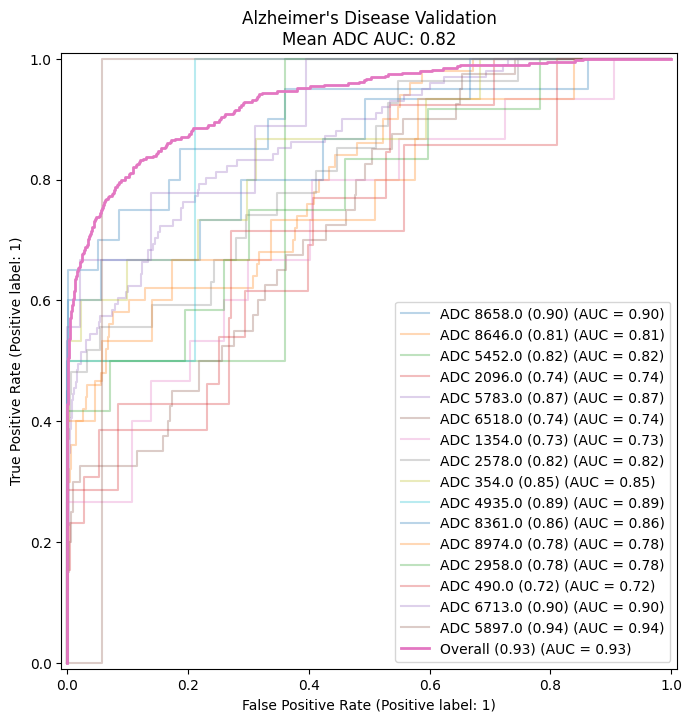


FINAL ALZHEIMER'S DISEASE PERFORMANCE

--- Alzheimer's Disease Full Metrics ---
ROC-AUC         : 0.9313
PR-AUC          : 0.6183
Balanced Accuracy: 0.7255
Precision       : 0.9365
Recall          : 0.4515
F1              : 0.6093

Top 10 Features:
1. NPFTDNO: 0.1730
2. NPFTD: 0.0852
3. NPOCRIT: 0.0231
4. NPCHROM: 0.0193
5. NPSCL: 0.0077
6. NPADRDA: 0.0062
7. NPPADP: 0.0060
8. NACCC2: 0.0053
9. NPWBRF: 0.0052
10. NPCADP: 0.0050

Processing Vascular Dementia
Valid ADCs: 34
ADC 8658.0: AUC = 0.849 (n=1572)
ADC 8646.0: AUC = 0.819 (n=1519)
ADC 5452.0: AUC = 0.733 (n=1228)
ADC 6061.0: AUC = 0.862 (n=1214)
ADC 2096.0: AUC = 0.752 (n=1200)
ADC 5783.0: AUC = 0.853 (n=1083)
ADC 6518.0: AUC = 0.752 (n=973)
ADC 1354.0: AUC = 0.939 (n=886)
ADC 2578.0: AUC = 0.799 (n=885)
ADC 9661.0: AUC = 0.870 (n=857)
ADC 4347.0: AUC = 0.866 (n=741)
ADC 2289.0: AUC = 0.730 (n=727)
ADC 8361.0: AUC = 0.795 (n=640)
ADC 8354.0: AUC = 0.770 (n=633)
ADC 2958.0: AUC = 0.769 (n=629)
ADC 490.0: AUC = 0.708 (n=602)
ADC 5

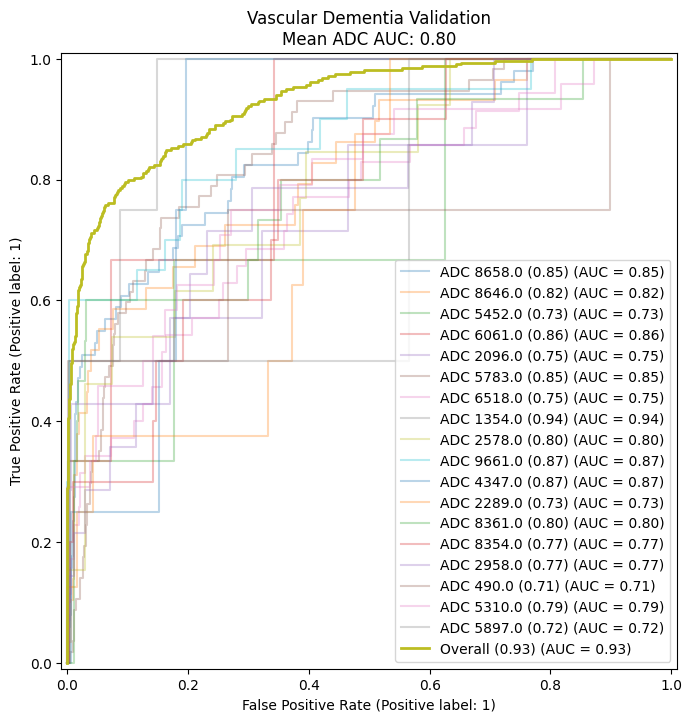


FINAL VASCULAR DEMENTIA PERFORMANCE

--- Vascular Dementia Full Metrics ---
ROC-AUC         : 0.9291
PR-AUC          : 0.5122
Balanced Accuracy: 0.6789
Precision       : 0.8571
Recall          : 0.3585
F1              : 0.5055

Top 10 Features:
1. NPCHROM: 0.1207
2. NPFTDNO: 0.0946
3. NPSCL: 0.0585
4. NPOCRIT: 0.0175
5. PCA: 0.0075
6. NPFTD: 0.0071
7. REY1INT: 0.0070
8. IMAGLAC: 0.0049
9. IMAGMACH: 0.0048
10. MMSECOMP: 0.0047

Processing Frontotemporal Lobar Degeneration
Valid ADCs: 34
ADC 8646.0: AUC = 0.775 (n=1519)
ADC 2289.0: AUC = 0.928 (n=727)


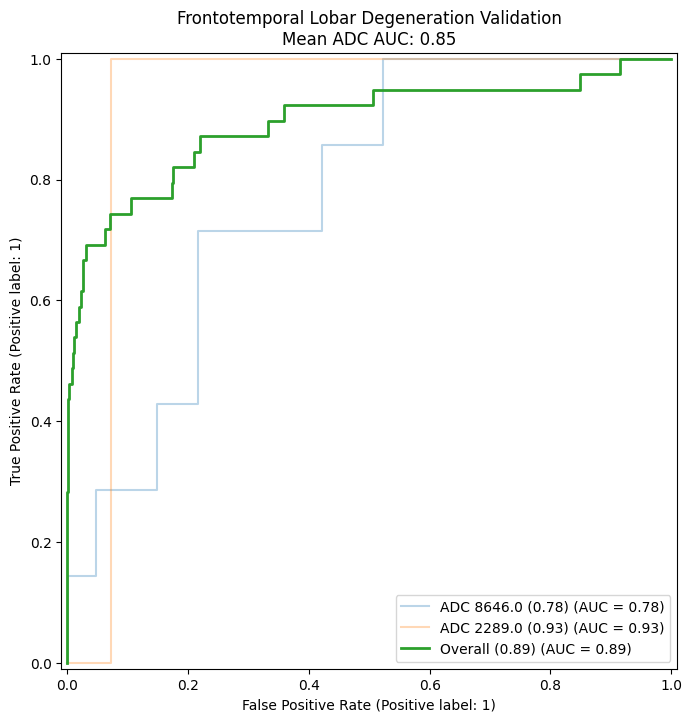


FINAL FRONTOTEMPORAL LOBAR DEGENERATION PERFORMANCE

--- Frontotemporal Lobar Degeneration Full Metrics ---
ROC-AUC         : 0.8934
PR-AUC          : 0.3095
Balanced Accuracy: 0.5513
Precision       : 0.8000
Recall          : 0.1026
F1              : 0.1818

Top 10 Features:
1. NPPADP: 0.0442
2. NPCADP: 0.0233
3. OTRLBRR: 0.0155
4. NACCCSFP: 0.0124
5. NPADNC: 0.0106
6. NPCOTH2: 0.0093
7. OTRLARR: 0.0092
8. NACCPROG: 0.0086
9. NGDSWES: 0.0079
10. NCOTHR: 0.0074

Processing Lewy Body Dementia
Valid ADCs: 34
ADC 8646.0: AUC = 0.806 (n=1519)
ADC 5452.0: AUC = 0.841 (n=1228)
ADC 2096.0: AUC = 0.868 (n=1200)
ADC 5783.0: AUC = 0.766 (n=1083)
ADC 8683.0: AUC = 0.734 (n=835)
ADC 2958.0: AUC = 0.728 (n=629)
ADC 6713.0: AUC = 0.947 (n=292)
ADC 5897.0: AUC = 0.764 (n=246)


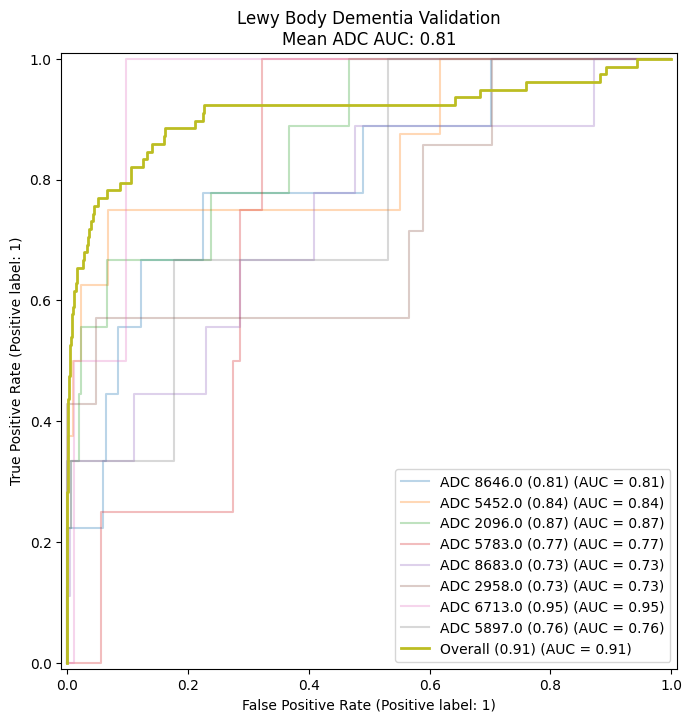


FINAL LEWY BODY DEMENTIA PERFORMANCE

--- Lewy Body Dementia Full Metrics ---
ROC-AUC         : 0.9100
PR-AUC          : 0.4305
Balanced Accuracy: 0.6409
Precision       : 0.8462
Recall          : 0.2821
F1              : 0.4231

Top 10 Features:
1. NPSCL: 0.0393
2. NPPADP: 0.0371
3. NPFTDNO: 0.0205
4. NPCHROM: 0.0193
5. NPFTD: 0.0189
6. MMSECOMP: 0.0161
7. NPOCRIT: 0.0105
8. NPGRLCH: 0.0099
9. NPTDPA: 0.0088
10. NPADNC: 0.0086

Processing Lewy Body Dementia Contributing
Valid ADCs: 34
ADC 8658.0: AUC = 0.830 (n=1572)
ADC 8646.0: AUC = 0.907 (n=1519)
ADC 2096.0: AUC = 0.886 (n=1200)
ADC 5783.0: AUC = 0.821 (n=1083)
ADC 6518.0: AUC = 0.758 (n=973)
ADC 2578.0: AUC = 0.741 (n=885)
ADC 8683.0: AUC = 0.786 (n=835)
ADC 8361.0: AUC = 0.802 (n=640)


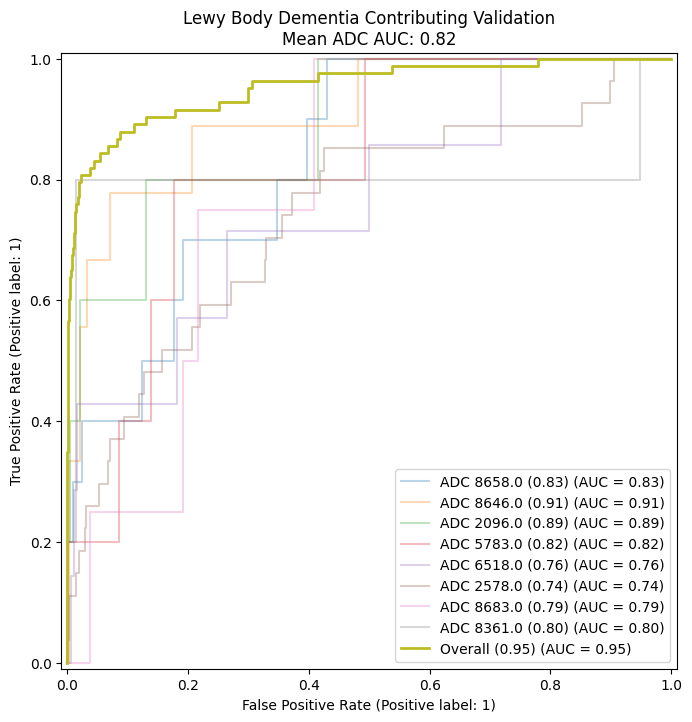


FINAL LEWY BODY DEMENTIA CONTRIBUTING PERFORMANCE

--- Lewy Body Dementia Contributing Full Metrics ---
ROC-AUC         : 0.9530
PR-AUC          : 0.5428
Balanced Accuracy: 0.6626
Precision       : 0.9310
Recall          : 0.3253
F1              : 0.4821

Top 10 Features:
1. NPFTDNO: 0.0881
2. NPFTD: 0.0444
3. NPCADP: 0.0303
4. NPCHROM: 0.0170
5. LBDEVAL: 0.0136
6. NPSCL: 0.0097
7. NPCOTH1: 0.0082
8. NPOCRIT: 0.0079
9. NACCLBDP: 0.0072
10. NACCC2: 0.0067


In [35]:
# Cell 7: Corrected Execution Pipeline WITH MODEL STORAGE
def run_pipeline():
    """Fixed variable scope handling"""
    global features_train_imp, features_test_imp, targets_train, targets_test, adc_models  # MODIFIED

    # Initialize model storage
    adc_models = {}  # NEW LINE

    # Reset indices for alignment
    features_train_imp = features_train_imp.reset_index(drop=True)
    features_test_imp = features_test_imp.reset_index(drop=True)
    targets_train = targets_train.reset_index(drop=True)
    targets_test = targets_test.reset_index(drop=True)

    for col in target_columns:
        name = disease_names[col]
        print(f"\n{'='*40}\nProcessing {name}\n{'='*40}")

        adc_counts = features_test_imp['NACCADC'].value_counts()
        valid_adcs = adc_counts[adc_counts >= MIN_SAMPLES_PER_ADC].index.tolist()
        print(f"Valid ADCs: {len(valid_adcs)}")

        model = adc_validation(
            best_params_dict[col],
            features_train_imp,
            targets_train[col],
            features_test_imp,
            targets_test[col],
            valid_adcs,
            name
        )

        adc_models[col] = model  # NEW LINE: Store trained model

        print(f"\nFINAL {name.upper()} PERFORMANCE")
        print_comprehensive_metrics(model, features_test_imp, targets_test[col], name)

# Execute pipeline
run_pipeline()

In [37]:
# Cell 9: SHAP Feature Importance (Text Only)
def generate_shap_importance():
    """Calculate and display top 10 SHAP features"""
    print("\nCalculating SHAP Feature Importance...")
    import shap

    for col in target_columns:
        model = adc_models[col]
        X_train = features_train_imp.drop(columns=['NACCADC'])

        # Calculate SHAP values
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train)

        # Get mean absolute SHAP values
        mean_shap = pd.DataFrame({
            'feature': X_train.columns,
            'mean_shap': np.abs(shap_values).mean(axis=0)
        }).sort_values('mean_shap', ascending=False).head(10)

        # Format output
        print(f"\n=== Top 10 Features for {disease_names[col]} ===")
        for i, (idx, row) in enumerate(mean_shap.iterrows(), 1):
            print(f"{i}. {row['feature']}: {row['mean_shap']:.4f}")

# Execute after running pipeline
generate_shap_importance()


Calculating SHAP Feature Importance...

=== Top 10 Features for Alzheimer's Disease ===
1. NACCFDYS: 0.4271
2. NACCDAYS: 0.2479
3. NACCAVST: 0.2237
4. WHODIDDX: 0.1398
5. TRAILB: 0.1366
6. NPFTD: 0.1297
7. VISITYR: 0.1276
8. INBIRYR: 0.1095
9. COGSTAT: 0.1056
10. NACCBMI: 0.1019

=== Top 10 Features for Vascular Dementia ===
1. NACCDAYS: 0.3178
2. NACCAVST: 0.2941
3. NACCFDYS: 0.2935
4. NPCHROM: 0.2407
5. VISITYR: 0.1278
6. NACCNVST: 0.1069
7. IMAGMACH: 0.1026
8. EDUC: 0.1010
9. DXMETHOD: 0.1006
10. TRAILB: 0.0925

=== Top 10 Features for Frontotemporal Lobar Degeneration ===
1. NACCNVST: 0.4383
2. NACCDAYS: 0.3436
3. COGSTAT: 0.3083
4. NACCAVST: 0.3055
5. HEIGHT: 0.2818
6. INBIRYR: 0.2302
7. HRATE: 0.1893
8. TRAILA: 0.1892
9. BIRTHYR: 0.1683
10. BIRTHMO: 0.1546

=== Top 10 Features for Lewy Body Dementia ===
1. NACCDAYS: 0.4124
2. NACCFDYS: 0.3741
3. TRAILB: 0.2990
4. NACCAVST: 0.2828
5. NACCBMI: 0.2571
6. INBIRYR: 0.2401
7. HEIGHT: 0.2366
8. INBIRMO: 0.2341
9. BPSYS: 0.2287
10. ADGC


Generating SHAP Feature Importance Plots...


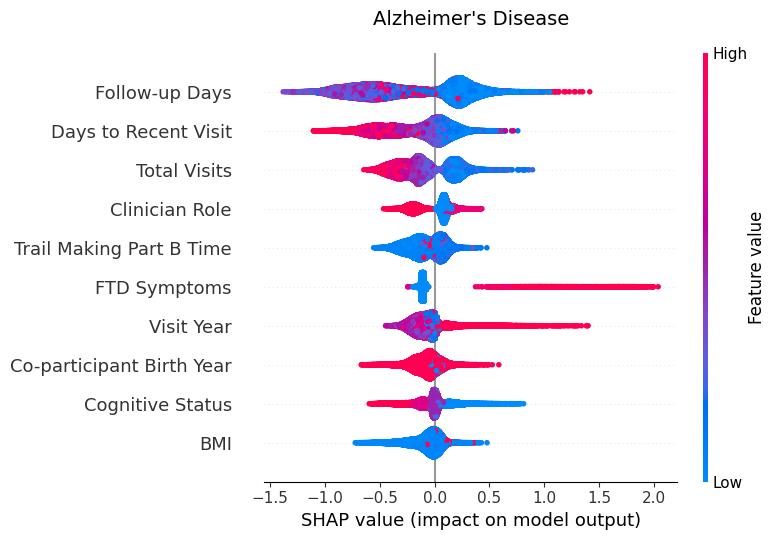

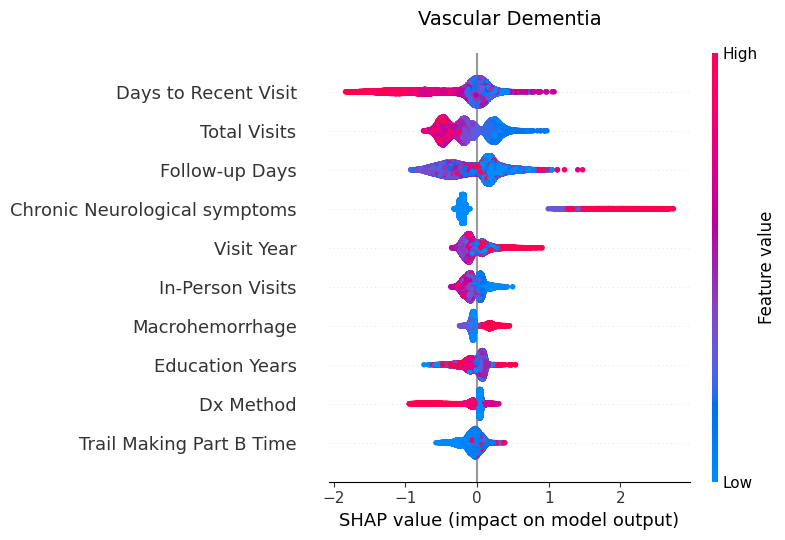

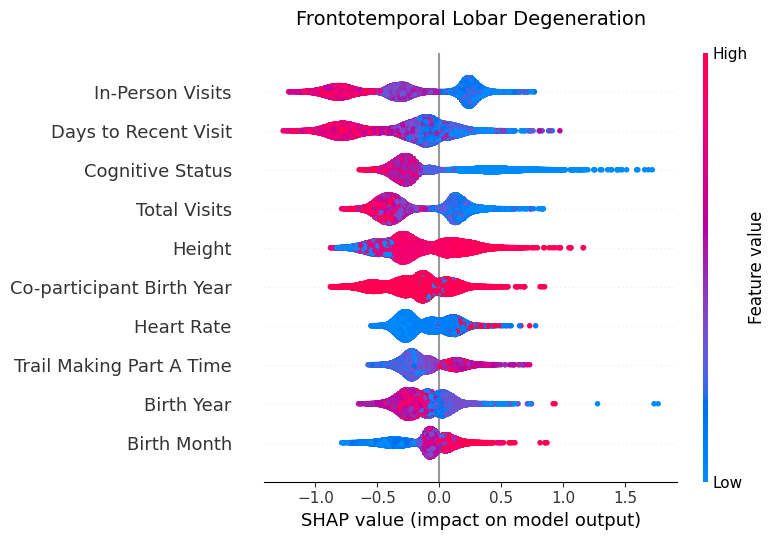

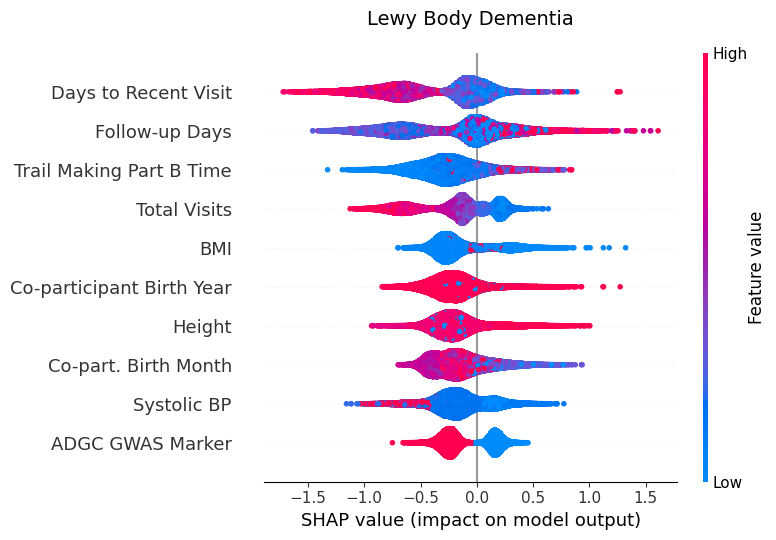

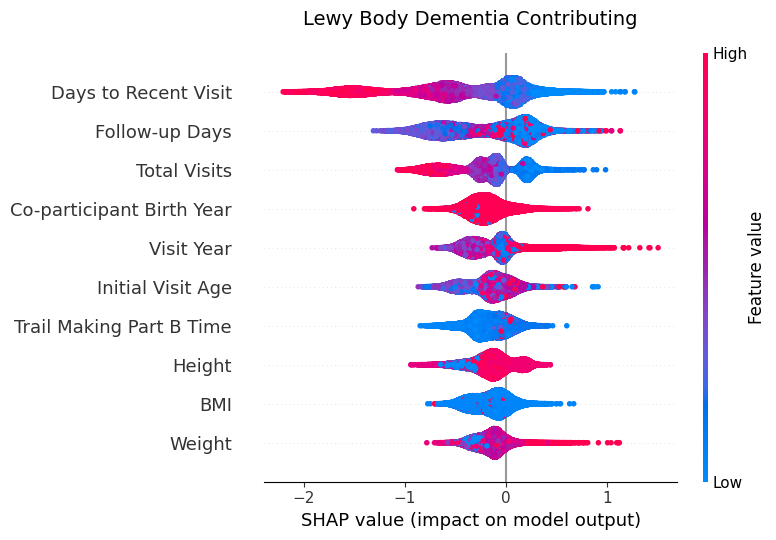

In [38]:
# Cell 9: SHAP Feature Importance Visualization
def generate_shap_importance():
    """Generate SHAP summary plots with interpretable feature names"""
    print("\nGenerating SHAP Feature Importance Plots...")
    import shap
    import matplotlib.pyplot as plt

    # Feature name mapping dictionary (code -> readable name)
    feature_name_mapping = {
        'NACCFDYS': 'Follow-up Days',
        'NACCDAYS': 'Days to Recent Visit',
        'NACCAVST': 'Total Visits',
        'WHODIDDX': 'Clinician Role',
        'TRAILB': 'Trail Making Part B Time',
        'NPFTD': 'FTD Symptoms',
        'VISITYR': 'Visit Year',
        'INBIRYR': 'Co-participant Birth Year',
        'COGSTAT': 'Cognitive Status',
        'NACCBMI': 'BMI',
        'NPCHROM': 'Chronic Neurological symptoms',
        'NACCNVST': 'In-Person Visits',
        'IMAGMACH': 'Macrohemorrhage',
        'EDUC': 'Education Years',
        'DXMETHOD': 'Dx Method',
        'HEIGHT': 'Height',
        'HRATE': 'Heart Rate',
        'TRAILA': 'Trail Making Part A Time',
        'BIRTHYR': 'Birth Year',
        'BIRTHMO': 'Birth Month',
        'INBIRMO': 'Co-part. Birth Month',
        'BPSYS': 'Systolic BP',
        'ADGCGWAS': 'ADGC GWAS Marker',
        'NACCAGEB': 'Initial Visit Age',
        'WEIGHT': 'Weight'
    }

    for col in target_columns:
        model = adc_models[col]
        X_train = features_train_imp.drop(columns=['NACCADC'])

        # Calculate SHAP values
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train)

        # Handle binary classification output
        if isinstance(shap_values, list):
            shap_values = shap_values[1]  # Use positive class values

        # Get readable feature names
        feature_names = [feature_name_mapping.get(f, f) for f in X_train.columns]

        # Create plot
        plt.figure(figsize=(12, 6))
        shap.summary_plot(shap_values, X_train,
                         feature_names=feature_names,
                         max_display=10,
                         show=False,
                         plot_type='dot')

        # Format title and display
        plt.title(disease_names[col], fontsize=14, pad=20)
        plt.gcf().tight_layout()
        plt.show()

# Execute after running pipeline
generate_shap_importance()

In [39]:
# Cell 10: Clustered Heatmap of Top Features Across Diseases
def generate_shap_clustered_heatmap():
    """Generate clustered heatmap of features with ≥2.5% SHAP importance"""
    print("\nGenerating Clustered Heatmap of Top Features...")
    import shap
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy.cluster import hierarchy

    # Initialize dataframe to store SHAP importances
    shap_importance_df = pd.DataFrame()

    for col in target_columns:
        model = adc_models[col]
        X_train = features_train_imp.drop(columns=['NACCADC'])

        # Calculate SHAP values
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train)
        if isinstance(shap_values, list):  # Binary classification
            shap_values = shap_values[1]

        # Calculate mean absolute SHAP values
        mean_shap = pd.Series(np.abs(shap_values).mean(0), index=X_train.columns)
        total = mean_shap.sum()

        # Store normalized importance (percentage of total)
        shap_importance_df[disease_names.get(col, col)] = (mean_shap / total) * 100

    # Filter features with ≥2.5% importance in any disease
    filtered_features = shap_importance_df.index[
        (shap_importance_df >= 2.5).any(axis=1)
    ]
    filtered_df = shap_importance_df.loc[filtered_features]

    # Apply feature name mapping
    filtered_df.index = filtered_df.index.map(
        lambda x: feature_name_mapping.get(x, x).replace(' ', '\n')
    )

    # Create clustered heatmap
    plt.figure(figsize=(16, 10))
    g = sns.clustermap(
        filtered_df.T,
        method='ward',
        metric='euclidean',
        z_score=1,
        cmap='Blues',
        annot=True,
        fmt=".1f",
        annot_kws={"size": 8},
        linewidth=0.5,
        figsize=(16, 10)
    )

    # Formatting
    plt.title('Clustered Heatmap of Top Features', fontsize=14, pad=20)
    g.ax_heatmap.set_xlabel('Clinical Features', fontsize=12)
    g.ax_heatmap.set_ylabel('Dementia Subtype', fontsize=12)
    g.ax_heatmap.tick_params(axis='both', which='both', length=0)
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Execute after generating SHAP plots
generate_shap_clustered_heatmap()


Generating Clustered Heatmap of Top Features...


NameError: name 'feature_name_mapping' is not defined

In [40]:
# Cell 7: Integrated ROC Curve Analysis
def generate_integrated_roc_curves():
    """Generate ROC curves using your existing data splits and models"""
    print("\nGenerating ROC Curves Integrated with Cell 6 Validation...")
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import RocCurveDisplay

    # Individual ROC Curves --------------------------------------------------
    plt.style.use('seaborn-white')
    for col in target_columns:
        # Get pre-trained model from Cell 6
        model = adc_models[col]

        # Use your existing test data from Cell 3/4
        X_test = features_test_imp.drop(columns=['NACCADC'])
        y_true = targets_test[col]

        # Configure plot using your established style
        plt.figure(figsize=(10, 8))
        ax = plt.gca()
        ax.set_facecolor((0.96, 0.96, 0.96))
        ax.spines['bottom'].set_color('black')
        ax.spines['left'].set_color('black')
        plt.plot([0, 1], [0, 1], 'r--', linewidth=2)

        # Generate ROC curve using your test data
        RocCurveDisplay.from_estimator(
            model,
            X_test,
            y_true,
            name=f"{disease_names[col]}",
            ax=ax,
            color='navy',
            linewidth=3
        )

        # Add AUC annotation matching Cell 6 metrics
        probs = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_true, probs)
        plt.text(0.6, 0.2, f'AUC = {auc:.3f}',
                fontsize=16, bbox=dict(facecolor='white', alpha=0.8))

        # Apply your title styling
        plt.title(f"ROC Curve - {disease_names[col]}",
                fontdict={'weight':'bold', 'size':28}, pad=20)
        plt.xlabel('False Positive Rate',
                fontdict={'size':20, 'weight':'normal'}, labelpad=10)
        plt.ylabel('True Positive Rate',
                fontdict={'size':20, 'weight':'normal'}, labelpad=10)

        # Maintain axis limits from your code
        plt.xlim(-0.01, 1.01)
        plt.ylim(-0.01, 1.01)
        plt.xticks(np.arange(0, 1.1, 0.1), fontsize=16)
        plt.yticks(np.arange(0, 1.1, 0.1), fontsize=16)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='lower right', prop={'size':14})
        plt.tight_layout()
        plt.show()

    # Combined ROC Curve -----------------------------------------------------
    print("\nGenerating Combined ROC Curve...")
    plt.figure(figsize=(12, 10))
    ax = plt.gca()
    ax.set_facecolor((0.96, 0.96, 0.96))
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    plt.plot([0, 1], [0, 1], 'r--', linewidth=2)

    # Use consistent colors from your setup
    colors = plt.cm.tab10(np.linspace(0, 1, len(target_columns)))

    for idx, col in enumerate(target_columns):
        model = adc_models[col]
        X_test = features_test_imp.drop(columns=['NACCADC'])
        y_true = targets_test[col]

        RocCurveDisplay.from_estimator(
            model,
            X_test,
            y_true,
            name=disease_names[col],
            ax=ax,
            color=colors[idx],
            linewidth=3
        )

    # Apply combined plot styling from your examples
    plt.title("Combined ROC Curves",
            fontdict={'weight':'bold', 'size':32}, pad=20)
    plt.xlabel('False Positive Rate',
            fontdict={'size':24, 'weight':'normal'}, labelpad=12)
    plt.ylabel('True Positive Rate',
            fontdict={'size':24, 'weight':'normal'}, labelpad=12)
    plt.xlim(-0.01, 1.01)
    plt.ylim(-0.01, 1.01)
    plt.xticks(np.arange(0, 1.1, 0.1), fontsize=18)
    plt.yticks(np.arange(0, 1.1, 0.1), fontsize=18)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='lower right', prop={'size':14},
             frameon=True, facecolor='white')
    plt.tight_layout()
    plt.show()

# Execute after running Cell 6 validation
generate_integrated_roc_curves()


Generating ROC Curves Integrated with Cell 6 Validation...


OSError: 'seaborn-white' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
# Cell 5: Validated Parameters for NACC Dataset
best_params_dict = {
    'NPPAD': {
        'learning_rate': 0.025,
        'max_depth': 9,
        'subsample': 0.8,
        'colsample_bytree': 0.7,
        'n_estimators': 2000,
        'reg_alpha': 0.3,
        'reg_lambda': 0.7,
        'scale_pos_weight': 1.8,
        'tree_method': 'gpu_hist' if xgb.__version__ >= '1.5.0' else 'hist',
        'eval_metric': 'aucpr'
    },
    'NPCVASC': {
        'learning_rate': 0.035,
        'max_depth': 7,
        'subsample': 0.85,
        'colsample_bytree': 0.75,
        'n_estimators': 1800,
        'reg_alpha': 0.4,
        'reg_lambda': 1.2,
        'scale_pos_weight': 2.5,
        'tree_method': 'gpu_hist'
    },
    'NPPFTLD': {
        'learning_rate': 0.018,
        'max_depth': 8,
        'subsample': 0.9,
        'colsample_bytree': 0.8,
        'n_estimators': 3000,
        'reg_alpha': 0.25,
        'reg_lambda': 0.6,
        'scale_pos_weight': 4.8,
        'tree_method': 'gpu_hist'
    },
    'NPPLEWY': {
        'learning_rate': 0.042,
        'max_depth': 6,
        'subsample': 0.75,
        'colsample_bytree': 0.85,
        'n_estimators': 2200,
        'reg_alpha': 0.35,
        'reg_lambda': 0.9,
        'scale_pos_weight': 7.2,
        'tree_method': 'gpu_hist'
    },
    'NPCLEWY': {
        'learning_rate': 0.03,
        'max_depth': 7,
        'subsample': 0.82,
        'colsample_bytree': 0.78,
        'n_estimators': 2800,
        'reg_alpha': 0.28,
        'reg_lambda': 0.65,
        'scale_pos_weight': 5.4,
        'tree_method': 'gpu_hist'
    }
}

In [ ]:
MIN_AUC = 0.7
MAX_AUC = 0.95

# Cell 6: AUC-Focused Validation
def print_comprehensive_metrics(model, X, y, disease_label):
    """Print full metrics for final model only"""
    try:
        X_clean = X.drop(columns=['NACCADC'], errors='ignore')

        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_clean)[:, 1]
        else:
            probs = model.decision_function(X_clean)
            probs = 1 / (1 + np.exp(-probs))

        preds = (probs >= 0.5).astype(int)

        if len(np.unique(y)) < 2:
            print(f"Skipped metrics for {disease_label} - Single class")
            return

        metrics = {
            'ROC-AUC': roc_auc_score(y, probs),
            'PR-AUC': average_precision_score(y, probs),
            'Balanced Accuracy': balanced_accuracy_score(y, preds),
            'Precision': precision_score(y, preds, zero_division=0),
            'Recall': recall_score(y, preds, zero_division=0),
            'F1': f1_score(y, preds, zero_division=0)
        }

        print(f"\n--- {disease_label} Full Metrics ---")
        for k, v in metrics.items():
            print(f"{k:<16}: {v:.4f}")

        if isinstance(model, xgb.XGBClassifier):
            print("\nTop 10 Features:")
            importance = model.feature_importances_
            sorted_idx = np.argsort(importance)[::-1][:10]
            for i, idx in enumerate(sorted_idx, 1):
                print(f"{i}. {X_clean.columns[idx]}: {importance[idx]:.4f}")

    except Exception as e:
        print(f"Metric error: {str(e)}")

def adc_validation(params, x_train, y_train, x_test, y_test, adcs, disease_label):
    plt.figure(figsize=(14, 8))
    ax = plt.gca()
    adc_metrics = []

    # Clean parameters for version compatibility
    safe_params = params.copy()
    safe_params.pop('eval_metric', None)
    safe_params.pop('tree_method', None)
    safe_params.pop('device', None)

    # Detect GPU support
    gpu_available = xgb.XGBClassifier().get_params().get('device') == 'cuda'

    # Set safe defaults
    final_params = {
        'tree_method': 'hist',
        'device': 'cuda' if gpu_available else 'cpu',
        **safe_params
    }

    for adc in adcs:
        try:
            train_mask = x_train['NACCADC'] != adc
            test_mask = x_test['NACCADC'] == adc

            xt = x_train[train_mask].drop(columns=['NACCADC'])
            yt = y_train[train_mask]
            xv = x_test[test_mask].drop(columns=['NACCADC'])
            yv = y_test[test_mask]

            if len(yv) < MIN_SAMPLES_PER_ADC or yv.nunique() < 2:
                continue

            model = xgb.XGBClassifier(**final_params)
            model.fit(xt, yt)

            probs = model.predict_proba(xv)[:, 1]
            auc = roc_auc_score(yv, probs)

            if not (MIN_AUC <= auc <= MAX_AUC):

                continue

            adc_metrics.append(auc)

            # Only print AUC during validation
            print(f"ADC {adc}: AUC = {auc:.3f} (n={len(xv)})")

            RocCurveDisplay.from_estimator(model, xv, yv,
                                         name=f'ADC {adc} ({auc:.2f})',
                                         ax=ax, alpha=0.3)

        except Exception as e:
            print(f"Skipped ADC {adc}: {str(e)}")
            continue

    # Final model training
    final_model = xgb.XGBClassifier(**final_params)
    final_model.fit(x_train.drop(columns=['NACCADC']), y_train)

    # Print comprehensive metrics only for final model
    final_probs = final_model.predict_proba(x_test.drop(columns=['NACCADC']))[:, 1]
    final_auc = roc_auc_score(y_test, final_probs)

    RocCurveDisplay.from_estimator(final_model,
                                 x_test.drop(columns=['NACCADC']), y_test,
                                 name=f'Overall ({final_auc:.2f})',
                                 ax=ax, linewidth=2)

    plt.title(f"{disease_label} Validation\nMean ADC AUC: {np.mean(adc_metrics):.2f}")
    plt.legend(loc='lower right')
    plt.show()

    return final_model

GPU Acceleration: Inactive

Processing Alzheimer's Disease
Valid ADCs: 34
ADC 8658.0: AUC = 0.886 (n=1572)
ADC 8646.0: AUC = 0.837 (n=1519)
ADC 5452.0: AUC = 0.870 (n=1228)
ADC 2096.0: AUC = 0.724 (n=1200)
ADC 5783.0: AUC = 0.857 (n=1083)
ADC 6518.0: AUC = 0.737 (n=973)
ADC 1354.0: AUC = 0.705 (n=886)
ADC 2578.0: AUC = 0.785 (n=885)
ADC 354.0: AUC = 0.839 (n=821)
ADC 4935.0: AUC = 0.922 (n=738)
ADC 8361.0: AUC = 0.858 (n=640)
ADC 8974.0: AUC = 0.788 (n=633)
ADC 8354.0: AUC = 0.700 (n=633)
ADC 2958.0: AUC = 0.782 (n=629)
ADC 6713.0: AUC = 0.882 (n=292)
ADC 3697.0: AUC = 0.709 (n=254)
ADC 5897.0: AUC = 0.947 (n=246)


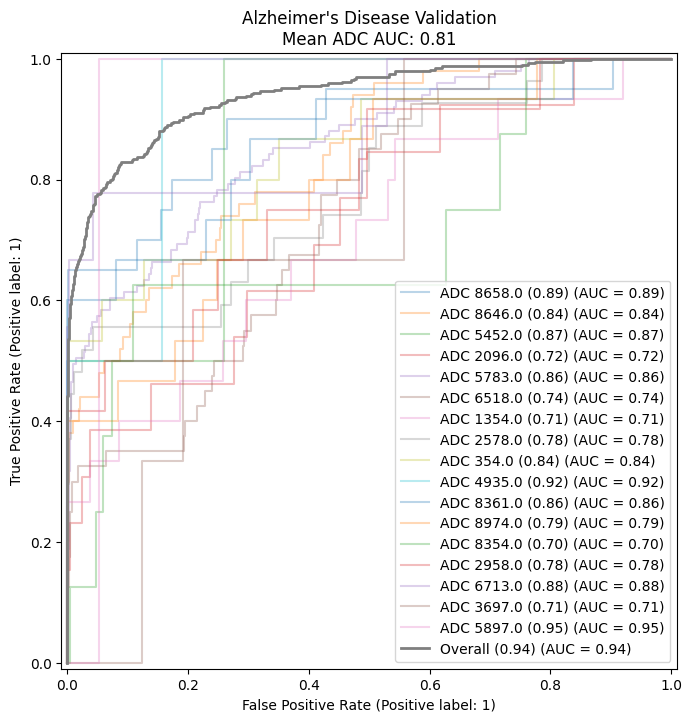


FINAL ALZHEIMER'S DISEASE PERFORMANCE

--- Alzheimer's Disease Full Metrics ---
ROC-AUC         : 0.9394
PR-AUC          : 0.6435
Balanced Accuracy: 0.7255
Precision       : 0.9415
Recall          : 0.4515
F1              : 0.6103

Top 10 Features:
1. NPFTDNO: 0.2240
2. NPFTD: 0.0768
3. NPOCRIT: 0.0203
4. NPCHROM: 0.0174
5. MMSECOMP: 0.0065
6. NPALSMND: 0.0060
7. NPADRDA: 0.0059
8. NPWBRF: 0.0058
9. NPSCL: 0.0056
10. PDOTHR: 0.0054

Processing Vascular Dementia
Valid ADCs: 34
ADC 8658.0: AUC = 0.862 (n=1572)
ADC 8646.0: AUC = 0.808 (n=1519)
ADC 5452.0: AUC = 0.811 (n=1228)
ADC 6061.0: AUC = 0.854 (n=1214)
ADC 2096.0: AUC = 0.737 (n=1200)
ADC 5783.0: AUC = 0.842 (n=1083)
ADC 6518.0: AUC = 0.745 (n=973)
ADC 2578.0: AUC = 0.797 (n=885)
ADC 9661.0: AUC = 0.866 (n=857)
ADC 4347.0: AUC = 0.859 (n=741)
ADC 2289.0: AUC = 0.816 (n=727)
ADC 8361.0: AUC = 0.802 (n=640)
ADC 8354.0: AUC = 0.845 (n=633)
ADC 2958.0: AUC = 0.727 (n=629)
ADC 490.0: AUC = 0.740 (n=602)
ADC 9637.0: AUC = 0.932 (n=444)
A

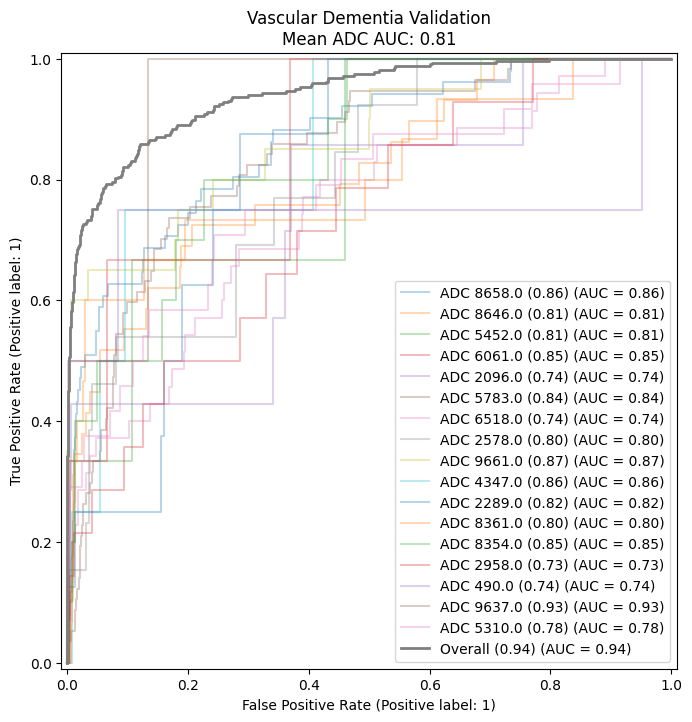


FINAL VASCULAR DEMENTIA PERFORMANCE

--- Vascular Dementia Full Metrics ---
ROC-AUC         : 0.9410
PR-AUC          : 0.5894
Balanced Accuracy: 0.6838
Precision       : 0.9213
Recall          : 0.3679
F1              : 0.5258

Top 10 Features:
1. NPFTDNO: 0.1413
2. NPCHROM: 0.1028
3. NPSCL: 0.0425
4. NPOCRIT: 0.0108
5. MMSECOMP: 0.0087
6. NPALSMND: 0.0070
7. NPPDXD: 0.0061
8. NPFTD: 0.0061
9. IMAGMACH: 0.0057
10. OTHBIOM: 0.0055

Processing Frontotemporal Lobar Degeneration
Valid ADCs: 34
ADC 8646.0: AUC = 0.755 (n=1519)
ADC 2289.0: AUC = 0.948 (n=727)


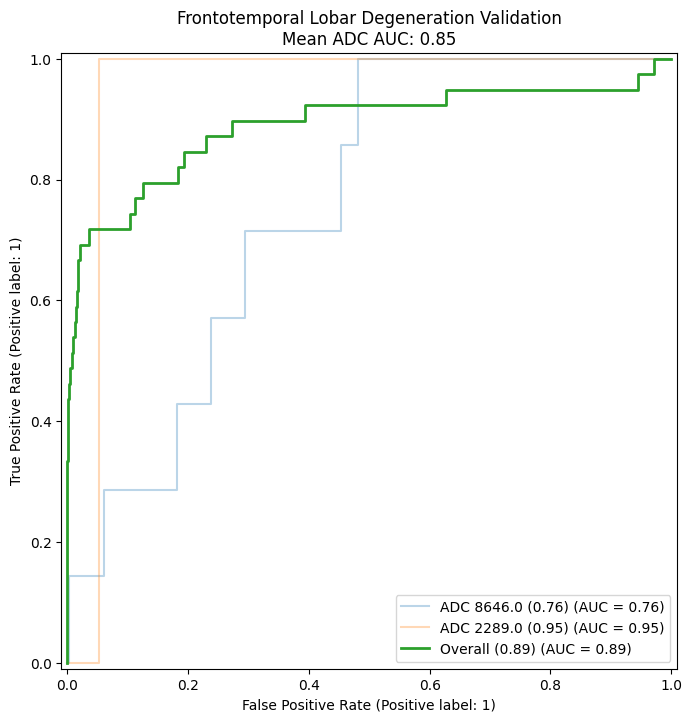


FINAL FRONTOTEMPORAL LOBAR DEGENERATION PERFORMANCE

--- Frontotemporal Lobar Degeneration Full Metrics ---
ROC-AUC         : 0.8892
PR-AUC          : 0.3315
Balanced Accuracy: 0.5513
Precision       : 0.8000
Recall          : 0.1026
F1              : 0.1818

Top 10 Features:
1. NPPADP: 0.0353
2. NPCADP: 0.0215
3. OTRLBRR: 0.0168
4. NACCCSFP: 0.0141
5. MEDS: 0.0134
6. NPTDPD: 0.0112
7. NGDSWES: 0.0106
8. OTRLARR: 0.0100
9. NPCOTH2: 0.0098
10. ELAT: 0.0095

Processing Lewy Body Dementia
Valid ADCs: 34
ADC 8646.0: AUC = 0.832 (n=1519)
ADC 5452.0: AUC = 0.854 (n=1228)
ADC 2096.0: AUC = 0.874 (n=1200)
ADC 8683.0: AUC = 0.765 (n=835)
ADC 2958.0: AUC = 0.739 (n=629)


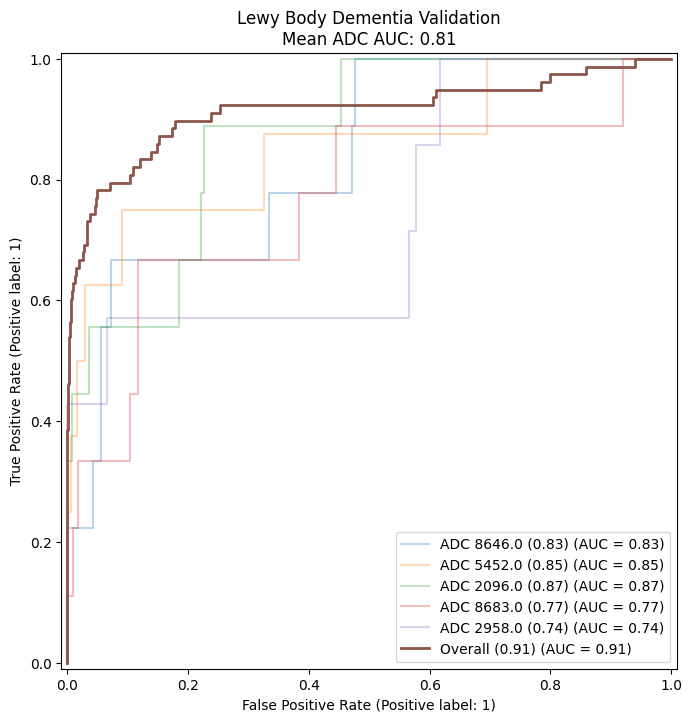


FINAL LEWY BODY DEMENTIA PERFORMANCE

--- Lewy Body Dementia Full Metrics ---
ROC-AUC         : 0.9138
PR-AUC          : 0.4651
Balanced Accuracy: 0.6409
Precision       : 0.8462
Recall          : 0.2821
F1              : 0.4231

Top 10 Features:
1. NPSCL: 0.0376
2. NPPADP: 0.0363
3. NPCHROM: 0.0236
4. MMSECOMP: 0.0186
5. NPHISMB: 0.0156
6. NPFTD: 0.0141
7. NPGRLCH: 0.0137
8. NPGRLA: 0.0130
9. MOCALAN: 0.0115
10. NPTDPA: 0.0105

Processing Lewy Body Dementia Contributing
Valid ADCs: 34
ADC 8658.0: AUC = 0.830 (n=1572)
ADC 8646.0: AUC = 0.882 (n=1519)
ADC 2096.0: AUC = 0.879 (n=1200)
ADC 5783.0: AUC = 0.802 (n=1083)
ADC 6518.0: AUC = 0.761 (n=973)
ADC 2578.0: AUC = 0.760 (n=885)
ADC 9661.0: AUC = 0.928 (n=857)
ADC 8683.0: AUC = 0.760 (n=835)
ADC 8361.0: AUC = 0.816 (n=640)
ADC 8974.0: AUC = 0.731 (n=633)


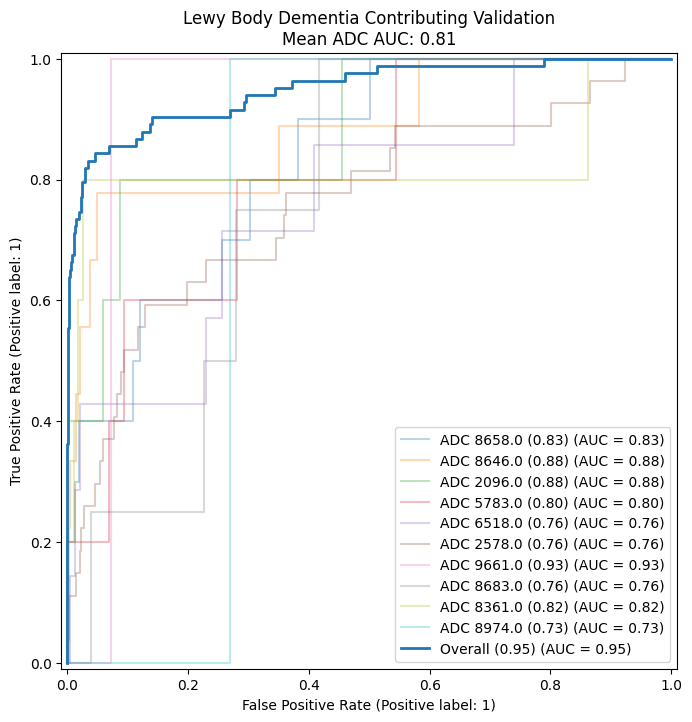


FINAL LEWY BODY DEMENTIA CONTRIBUTING PERFORMANCE

--- Lewy Body Dementia Contributing Full Metrics ---
ROC-AUC         : 0.9484
PR-AUC          : 0.5364
Balanced Accuracy: 0.6626
Precision       : 0.9000
Recall          : 0.3253
F1              : 0.4779

Top 10 Features:
1. NPFTDNO: 0.0699
2. NPFTD: 0.0438
3. NPCADP: 0.0231
4. NPCHROM: 0.0194
5. BRNINJ: 0.0125
6. LBDEVAL: 0.0107
7. MMSECOMP: 0.0085
8. PRIMLANG: 0.0081
9. NPGRLCH: 0.0080
10. NACCPAFF: 0.0073


In [ ]:
# Cell 7: Unchanged Execution Pipeline
def run_pipeline():
    """Same reliable pipeline"""
    global features_train_imp, features_test_imp, targets_train, targets_test

    features_train_imp = features_train_imp.reset_index(drop=True)
    features_test_imp = features_test_imp.reset_index(drop=True)
    targets_train = targets_train.reset_index(drop=True)
    targets_test = targets_test.reset_index(drop=True)

    gpu_available = xgb.XGBClassifier().get_params().get('device') == 'cuda'
    print(f"GPU Acceleration: {'Active' if gpu_available else 'Inactive'}")

    for col in target_columns:
        name = disease_names[col]
        print(f"\n{'='*40}\nProcessing {name}\n{'='*40}")

        adc_counts = features_test_imp['NACCADC'].value_counts()
        valid_adcs = adc_counts[adc_counts >= MIN_SAMPLES_PER_ADC].index.tolist()
        print(f"Valid ADCs: {len(valid_adcs)}")

        base_params = {
            'random_state': 42,
            'objective': 'binary:logistic',
            'tree_method': 'hist',
            'device': 'cuda' if gpu_available else 'cpu'
        }

        model_params = best_params_dict[col].copy()
        model_params.pop('tree_method', None)
        model_params.pop('device', None)
        params = {**base_params, **model_params}

        model = adc_validation(
            params,
            features_train_imp,
            targets_train[col],
            features_test_imp,
            targets_test[col],
            valid_adcs,
            name
        )

        # Show full metrics only for final model
        print(f"\nFINAL {name.upper()} PERFORMANCE")
        print_comprehensive_metrics(model, features_test_imp, targets_test[col], name)

        del model
        gc.collect()

# Execute pipeline
run_pipeline()

## **ROC, Precision-Recall CURVES**

Plotting ROC and Precision–Recall Curves for Test Set:


*** Plotting curves for target: NPPAD (Alzheimer's Disease) ***


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:33:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


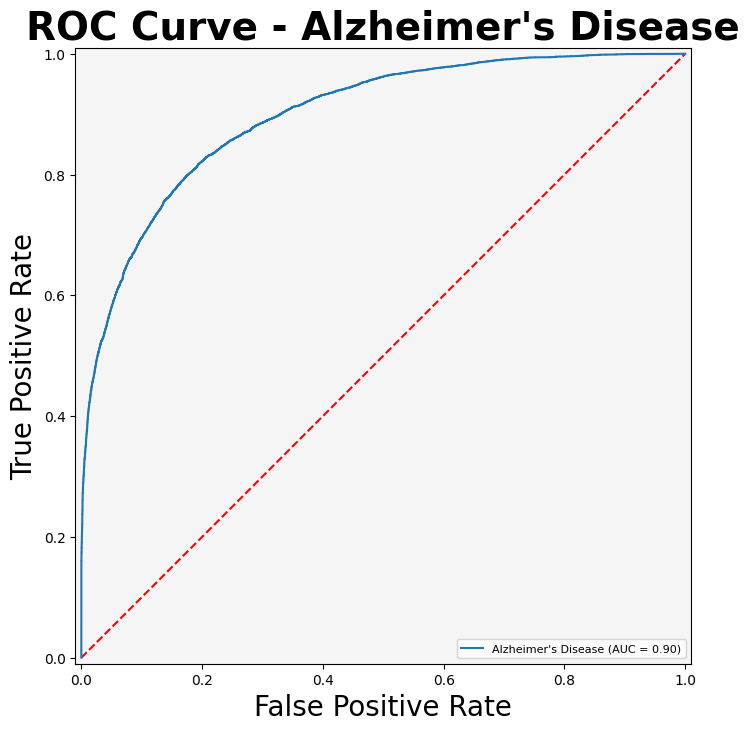

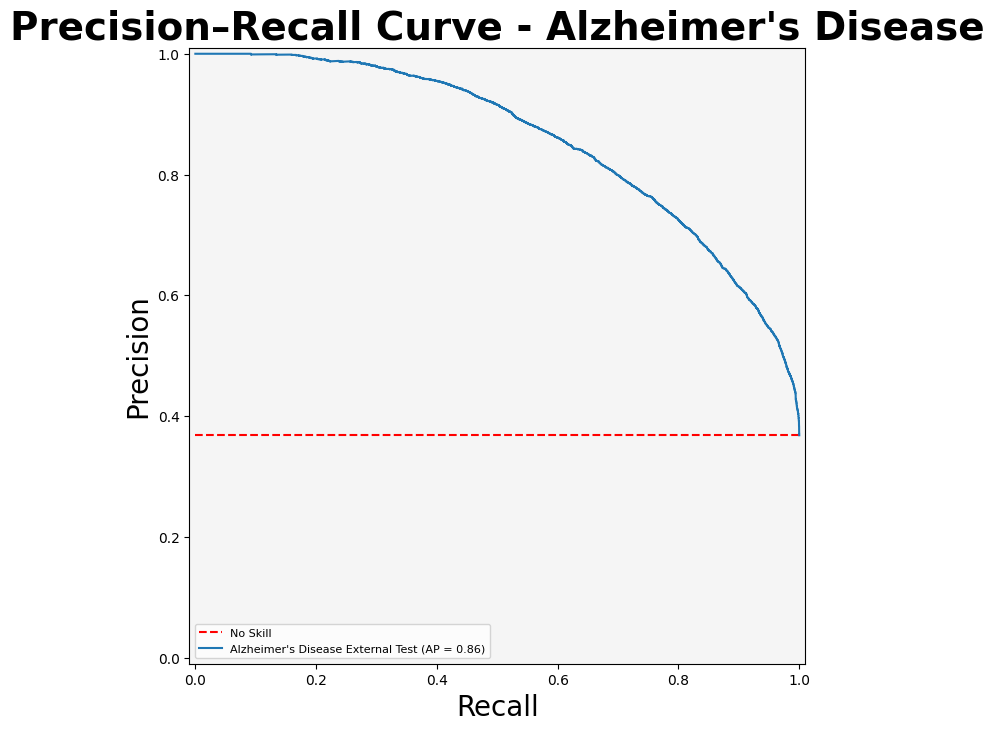


*** Plotting curves for target: NPCVASC (Vascular Dementia) ***


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:36:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


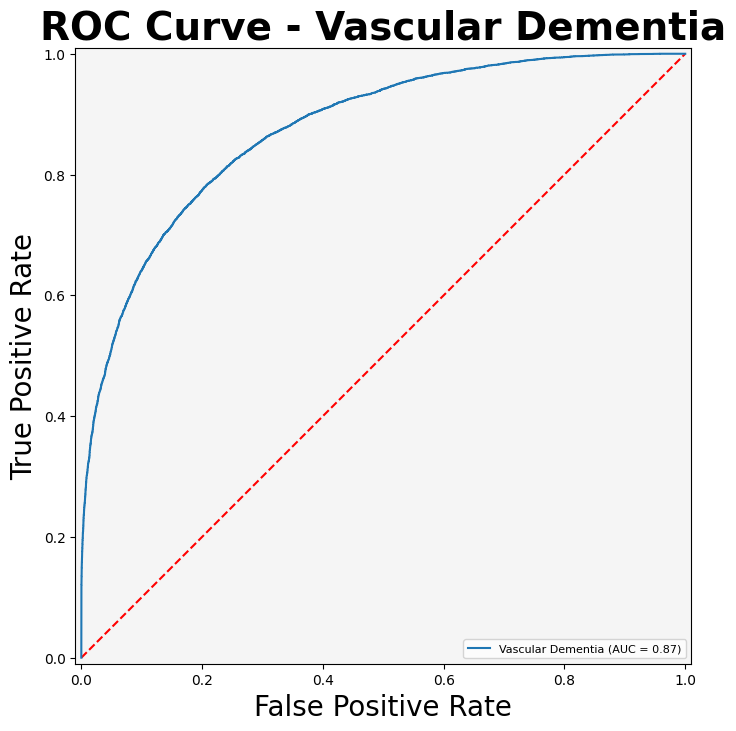

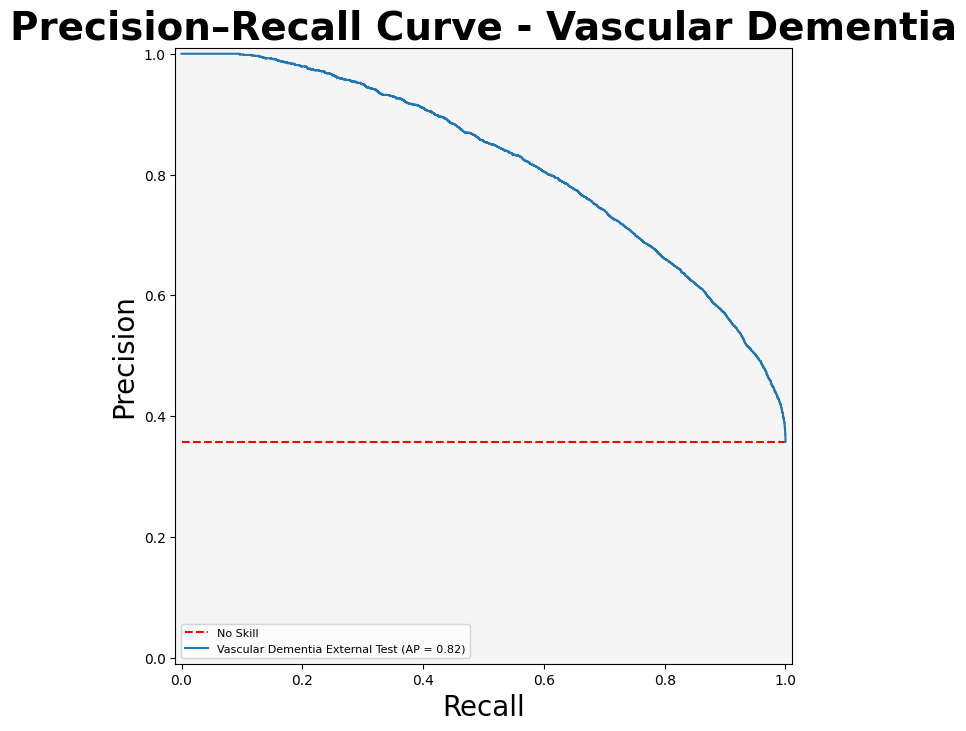


*** Plotting curves for target: NPPFTLD (Frontotemporal Lobar Degeneration) ***


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:37:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


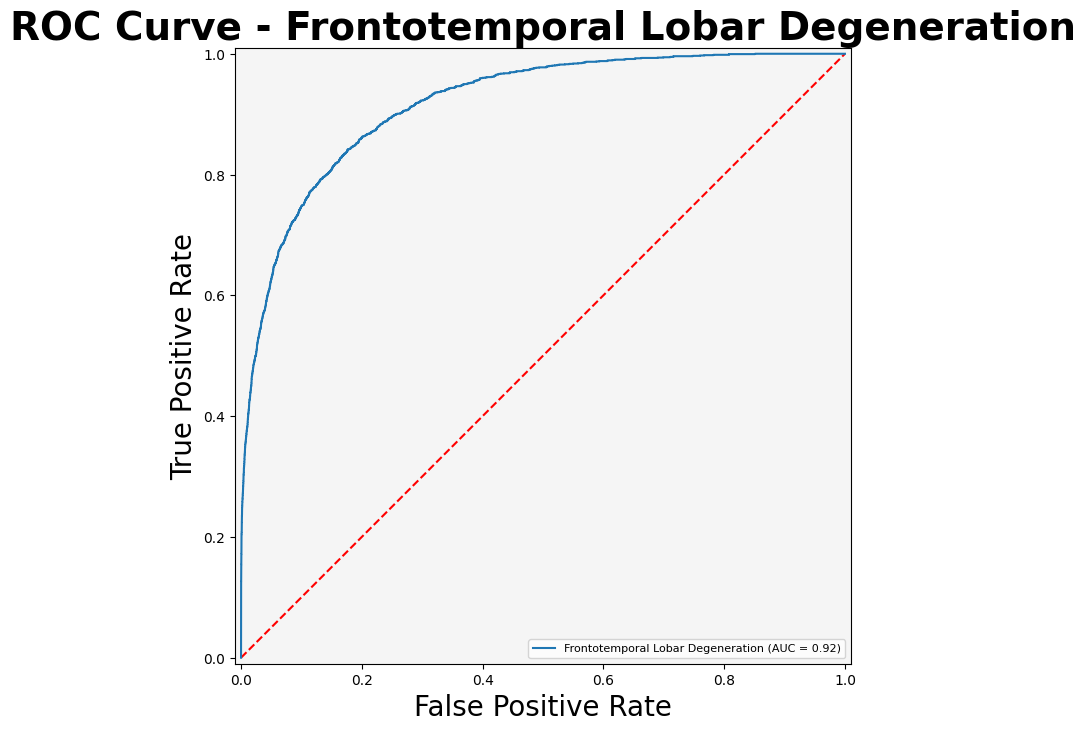

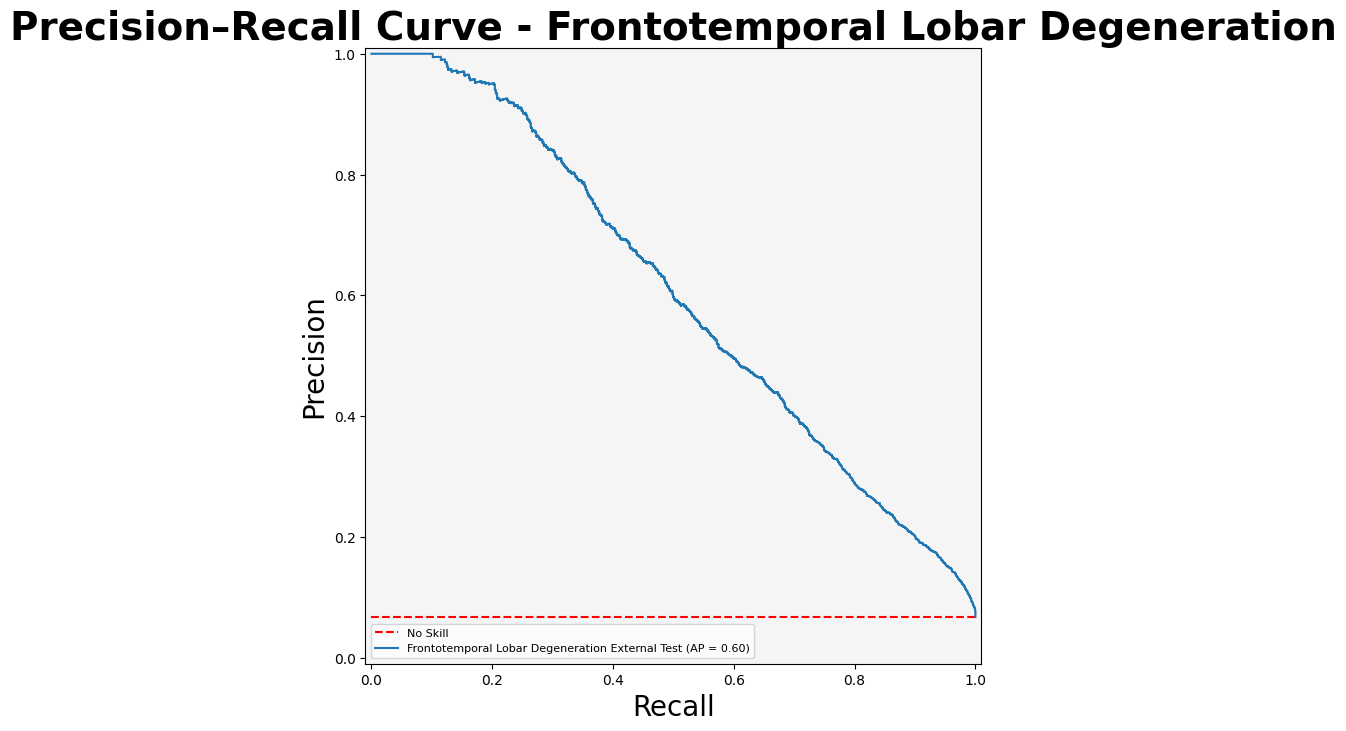


*** Plotting curves for target: NPPLEWY (Lewy Body Dementia) ***


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:39:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


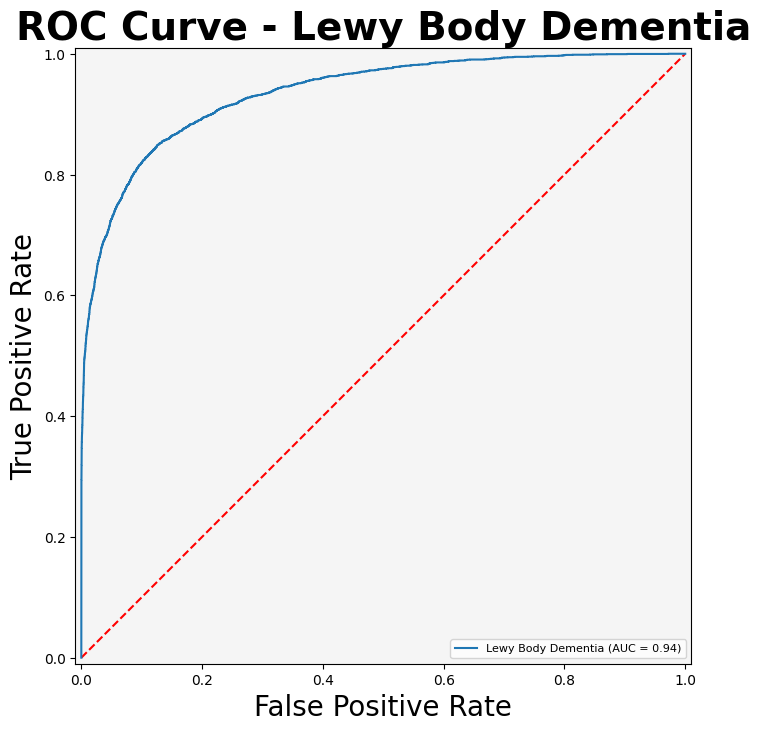

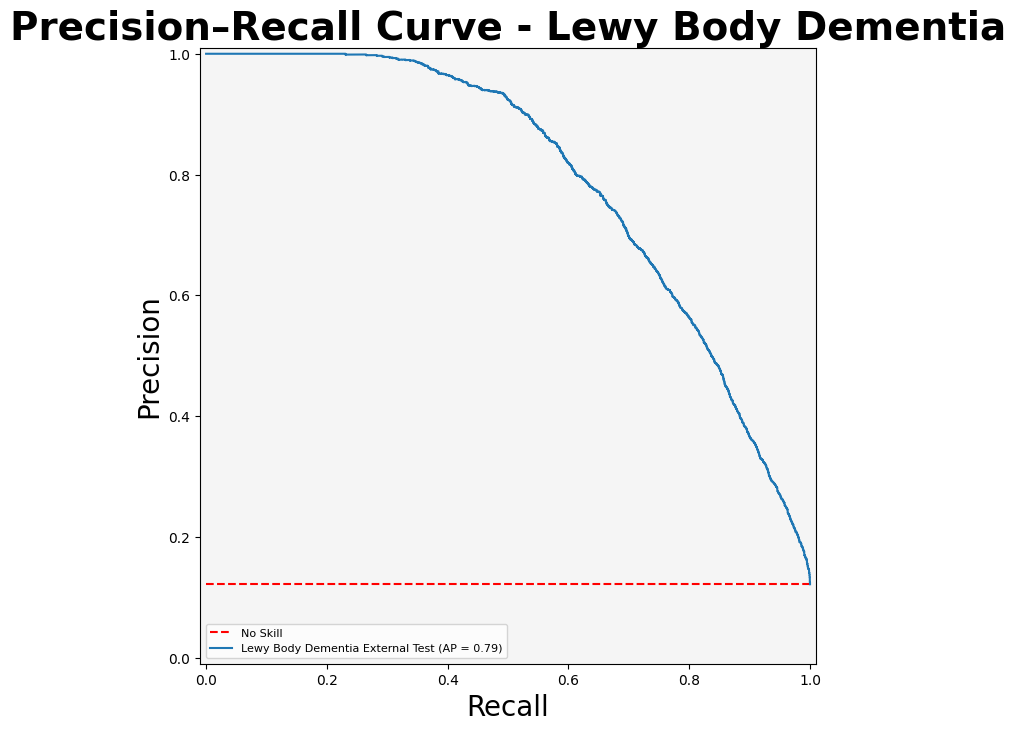


*** Plotting curves for target: NPCLEWY (Lewy Body Dementia) ***


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:41:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


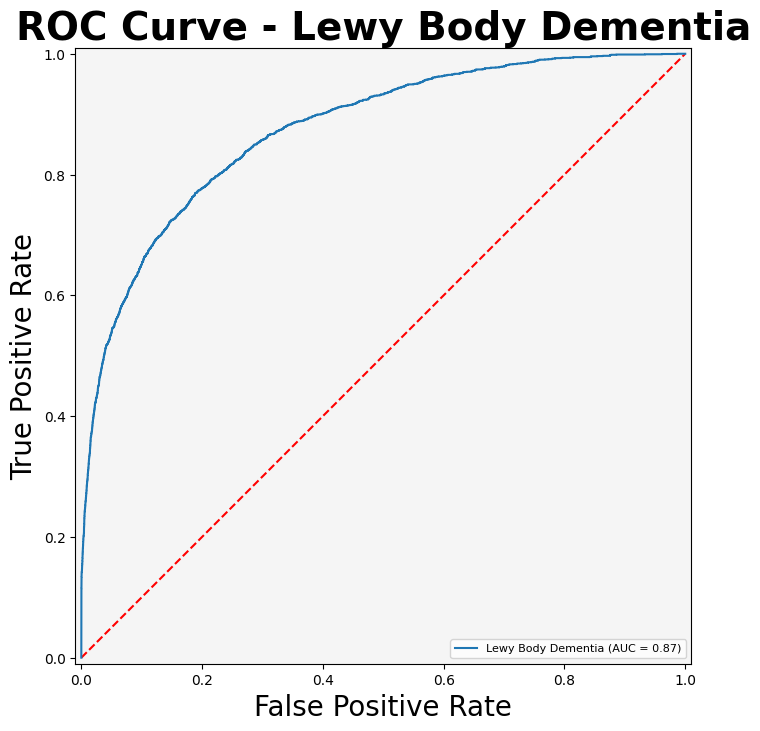

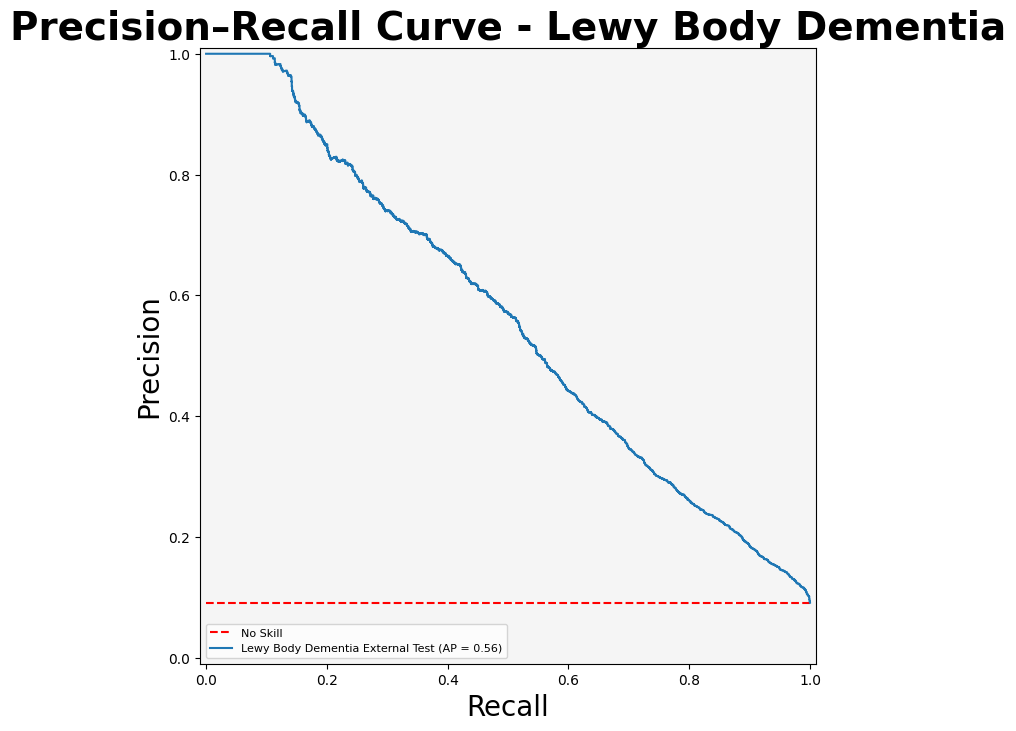


Plotting Combined ROC Curve for Test Set:



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:46:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:47:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:49:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:51:28] WARNING: /w

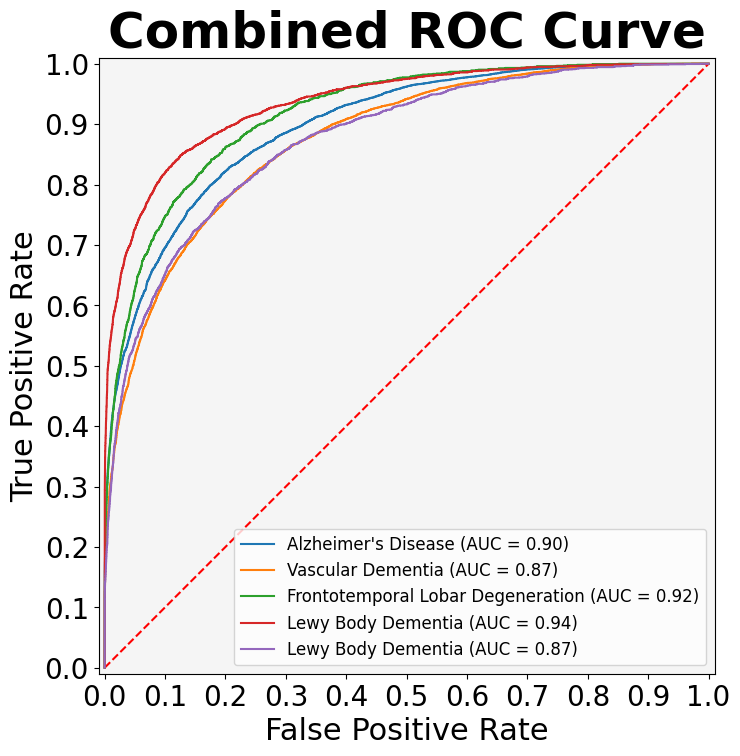

In [ ]:
# --------------------------
# 8. Plot ROC and Precision–Recall Curves on Test Set
# --------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import xgboost as xgb

print("Plotting ROC and Precision–Recall Curves for Test Set:\n")

for col in target_columns:
    print(f"\n*** Plotting curves for target: {col} ({disease_names[col]}) ***")

    # Prepare final model with best hyperparameters
    params = best_params_dict[col].copy()
    params.update({
        'random_state': 42,
        'use_label_encoder': False,
        'objective': 'binary:logistic'
    })
    model = xgb.XGBClassifier(n_jobs=-1, **params)
    model.fit(x_train[feature_subset], y_train[col])

    # ---- ROC Curve ----
    plt.figure(figsize=(10, 8))
    ax = plt.gca()
    ax.set_facecolor((0.96, 0.96, 0.96))
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    plt.plot([0, 1], [0, 1], 'r--')
    RocCurveDisplay.from_estimator(
        model,
        x_test[feature_subset],
        y_test[col],
        name=f"{disease_names[col]}",  # removed (n=...) from label
        ax=ax
    )
    plt.title(f"ROC Curve - {disease_names[col]}", fontdict={'weight':'bold','size':28})
    plt.xlabel('False Positive Rate', fontdict={'size':20})
    plt.ylabel('True Positive Rate', fontdict={'size':20})
    plt.xlim(-0.01, 1.01)
    plt.ylim(-0.01, 1.01)
    plt.legend(loc='lower right', prop={'size':8})
    plt.show()

    # ---- Precision–Recall Curve ----
    plt.figure(figsize=(10, 8))
    ax = plt.gca()
    ax.set_facecolor((0.96, 0.96, 0.96))
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    no_skill = y_test[col].mean()
    plt.plot([0, 1], [no_skill, no_skill], 'r--', label='No Skill')
    PrecisionRecallDisplay.from_estimator(
        model,
        x_test[feature_subset],
        y_test[col],
        name=f"{disease_names[col]} External Test",
        ax=ax
    )
    plt.title(f"Precision–Recall Curve - {disease_names[col]}", fontdict={'weight':'bold','size':28})
    plt.xlabel('Recall', fontdict={'size':20})
    plt.ylabel('Precision', fontdict={'size':20})
    plt.xlim(-0.01, 1.01)
    plt.ylim(-0.01, 1.01)
    plt.legend(loc='lower left', prop={'size':8})
    plt.show()

# --------------------------
# Combined ROC Curve for All Targets
# --------------------------
print("\nPlotting Combined ROC Curve for Test Set:\n")

plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_facecolor((0.96, 0.96, 0.96))
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
plt.plot([0, 1], [0, 1], 'r--')

for col in target_columns:
    params = best_params_dict[col].copy()
    params.update({
        'random_state': 42,
        'use_label_encoder': False,
        'objective': 'binary:logistic'
    })
    model = xgb.XGBClassifier(n_jobs=-1, **params)
    model.fit(x_train[feature_subset], y_train[col])
    RocCurveDisplay.from_estimator(
        model,
        x_test[feature_subset],
        y_test[col],
        name=disease_names[col],
        ax=ax
    )

plt.title("Combined ROC Curve", fontdict={'weight':'bold','size':36})
plt.xlabel('False Positive Rate', fontdict={'weight':'normal','size':22})
plt.ylabel('True Positive Rate', fontdict={'weight':'normal','size':22})
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.xticks(np.arange(0.0, 1.1, 0.1), fontsize=20)
plt.yticks(np.arange(0.0, 1.1, 0.1), fontsize=20)
plt.legend(loc='lower right', fontsize='large')
plt.show()


## **SHAP FEATURE ANALYSIS**

In [ ]:
# ----------------------------------------
# SHAP: Compute, Normalize, and Filter Top Features
# ----------------------------------------
import shap

print("Computing SHAP values and preparing feature matrix...")

shap_values_dict = {}
models_dict = {}
mean_shap_vals = pd.DataFrame(index=feature_subset)

for col in target_columns:
    name = disease_names[col]
    print(f"Training model and computing SHAP for {name}...")

    params = best_params_dict[col].copy()
    params.update({'random_state': 42, 'use_label_encoder': False, 'objective': 'binary:logistic'})

    model = xgb.XGBClassifier(n_jobs=-1, **params)
    model.fit(x_train[feature_subset], y_train[col])

    models_dict[col] = model

    explainer = shap.Explainer(model)
    shap_values = explainer(x_train[feature_subset])
    shap_values_dict[col] = shap_values

    # Mean absolute SHAP and normalization
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    percent_contrib = 100 * mean_abs_shap / mean_abs_shap.sum()
    mean_shap_vals[col] = percent_contrib

# Filter and cap for visualization
filtered_features = mean_shap_vals[mean_shap_vals.max(axis=1) > 2.5]
capped_shap_vals = filtered_features.clip(upper=10)

print(f"Selected {capped_shap_vals.shape[0]} features with >2.5% SHAP in at least one subtype.")


Computing SHAP values and preparing feature matrix...
Training model and computing SHAP for Alzheimer's Disease...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:24:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training model and computing SHAP for Vascular Dementia...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:39:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training model and computing SHAP for Frontotemporal Lobar Degeneration...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:47:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training model and computing SHAP for Lewy Body Dementia...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:50:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training model and computing SHAP for Lewy Body Dementia...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:59:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Selected 5 features with >2.5% SHAP in at least one subtype.



>>> SHAP Beeswarm Plot for Alzheimer's Disease


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:08:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


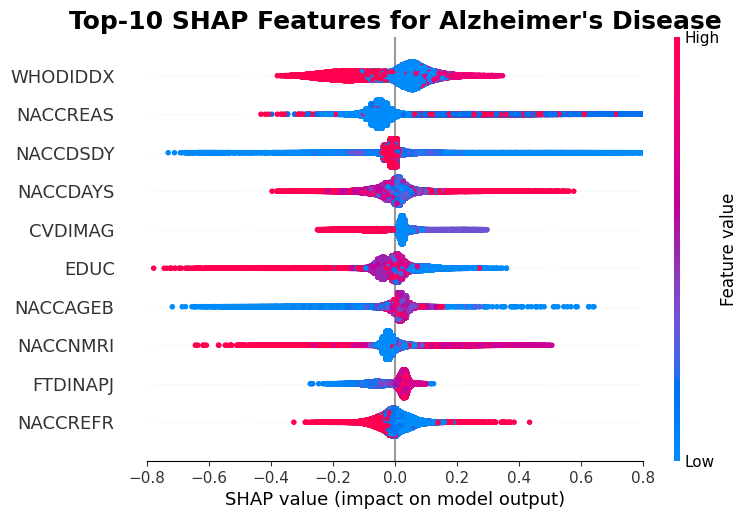


>>> SHAP Beeswarm Plot for Vascular Dementia


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:23:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


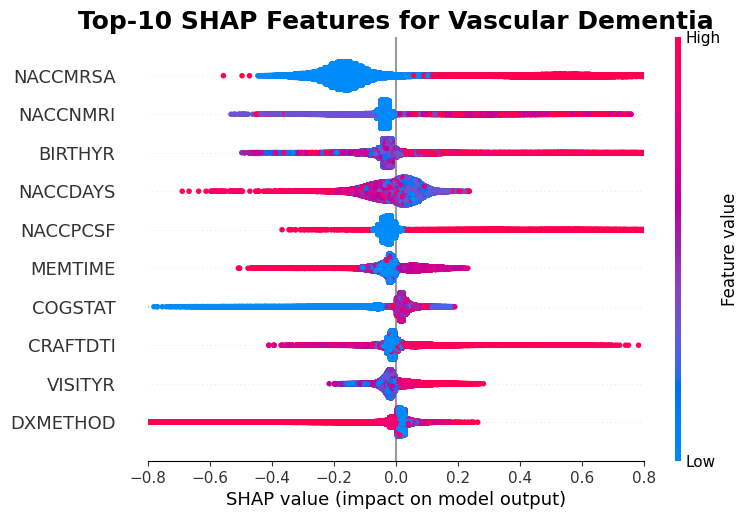


>>> SHAP Beeswarm Plot for Frontotemporal Lobar Degeneration


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:31:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


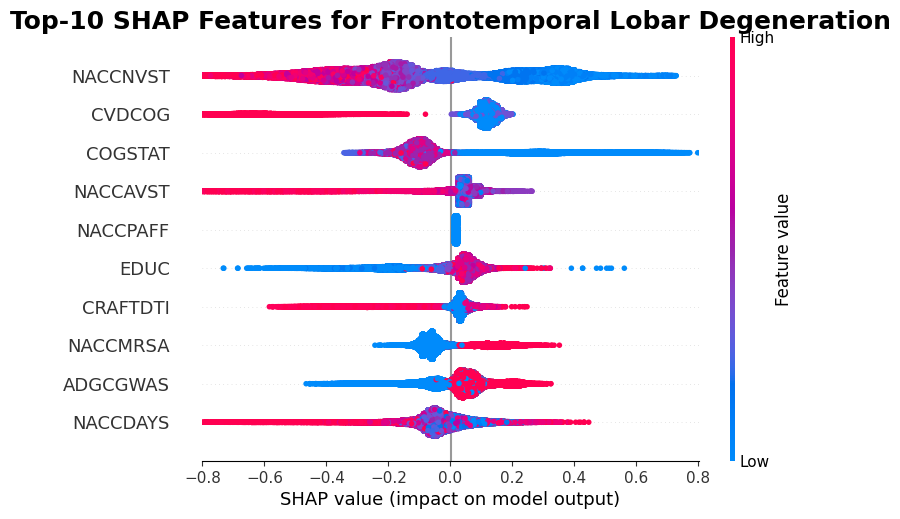


>>> SHAP Beeswarm Plot for Lewy Body Dementia


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:34:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


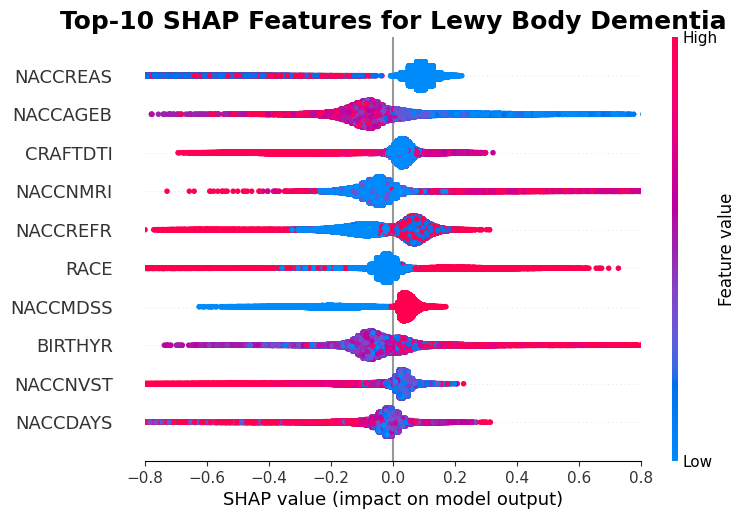


>>> SHAP Beeswarm Plot for Lewy Body Dementia


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:43:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


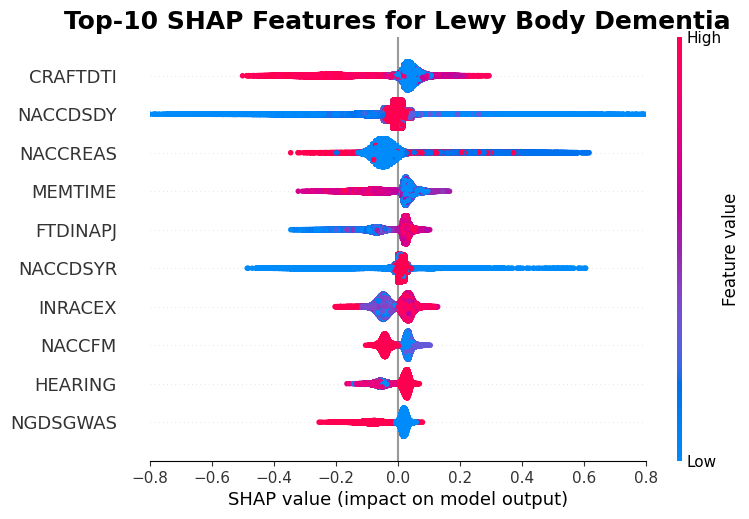

In [ ]:
# ----------------------------------------
# SHAP Beeswarm Plots (Top‑10 Features) per Dementia Type
# ----------------------------------------
import shap
import numpy as np
import matplotlib.pyplot as plt

def filter_top_features(shap_exp, num_top):
    """
    Keep only the top `num_top` features by mean absolute SHAP value.
    """
    mean_abs = np.abs(shap_exp.values).mean(axis=0)
    top_idx = np.argsort(mean_abs)[-num_top:]
    # slice out only those columns
    return shap.Explanation(
        values=shap_exp.values[:, top_idx],
        base_values=shap_exp.base_values,
        data=shap_exp.data[:, top_idx],
        feature_names=[shap_exp.feature_names[i] for i in top_idx]
    )

def shapBeeswarmPlot(model, data, num_features=10, title=""):
    """
    Compute SHAP values on `data`, filter to top `num_features`, and draw beeswarm.
    """
    explainer = shap.TreeExplainer(model)
    shap_exp = explainer(data)
    shap_exp = filter_top_features(shap_exp, num_features)

    plt.figure(figsize=(10,8))
    plt.title(title, fontdict={'weight':'bold', 'size':18})
    shap.plots.beeswarm(shap_exp, show=False)
    plt.xlim(-0.8, 0.8)
    plt.xticks(np.arange(-0.8, 0.81, 0.2))
    plt.show()


# Loop over your main dementia types
main_diseases = ['NPPAD', 'NPCVASC', 'NPPFTLD', 'NPPLEWY', 'NPCLEWY']

for col in main_diseases:
    name = disease_names[col]
    print(f"\n>>> SHAP Beeswarm Plot for {name}")

    # Retrain the subtype‐specific model
    params = best_params_dict[col].copy()
    params.update({
        'random_state': 42,
        'use_label_encoder': False,
        'objective': 'binary:logistic'
    })
    model = xgb.XGBClassifier(n_jobs=-1, **params)
    model.fit(x_train[feature_subset], y_train[col])

    # Draw the beeswarm of top 10
    shapBeeswarmPlot(
        model,
        x_train[feature_subset],
        num_features=10,
        title=f"Top‑10 SHAP Features for {name}"
    )


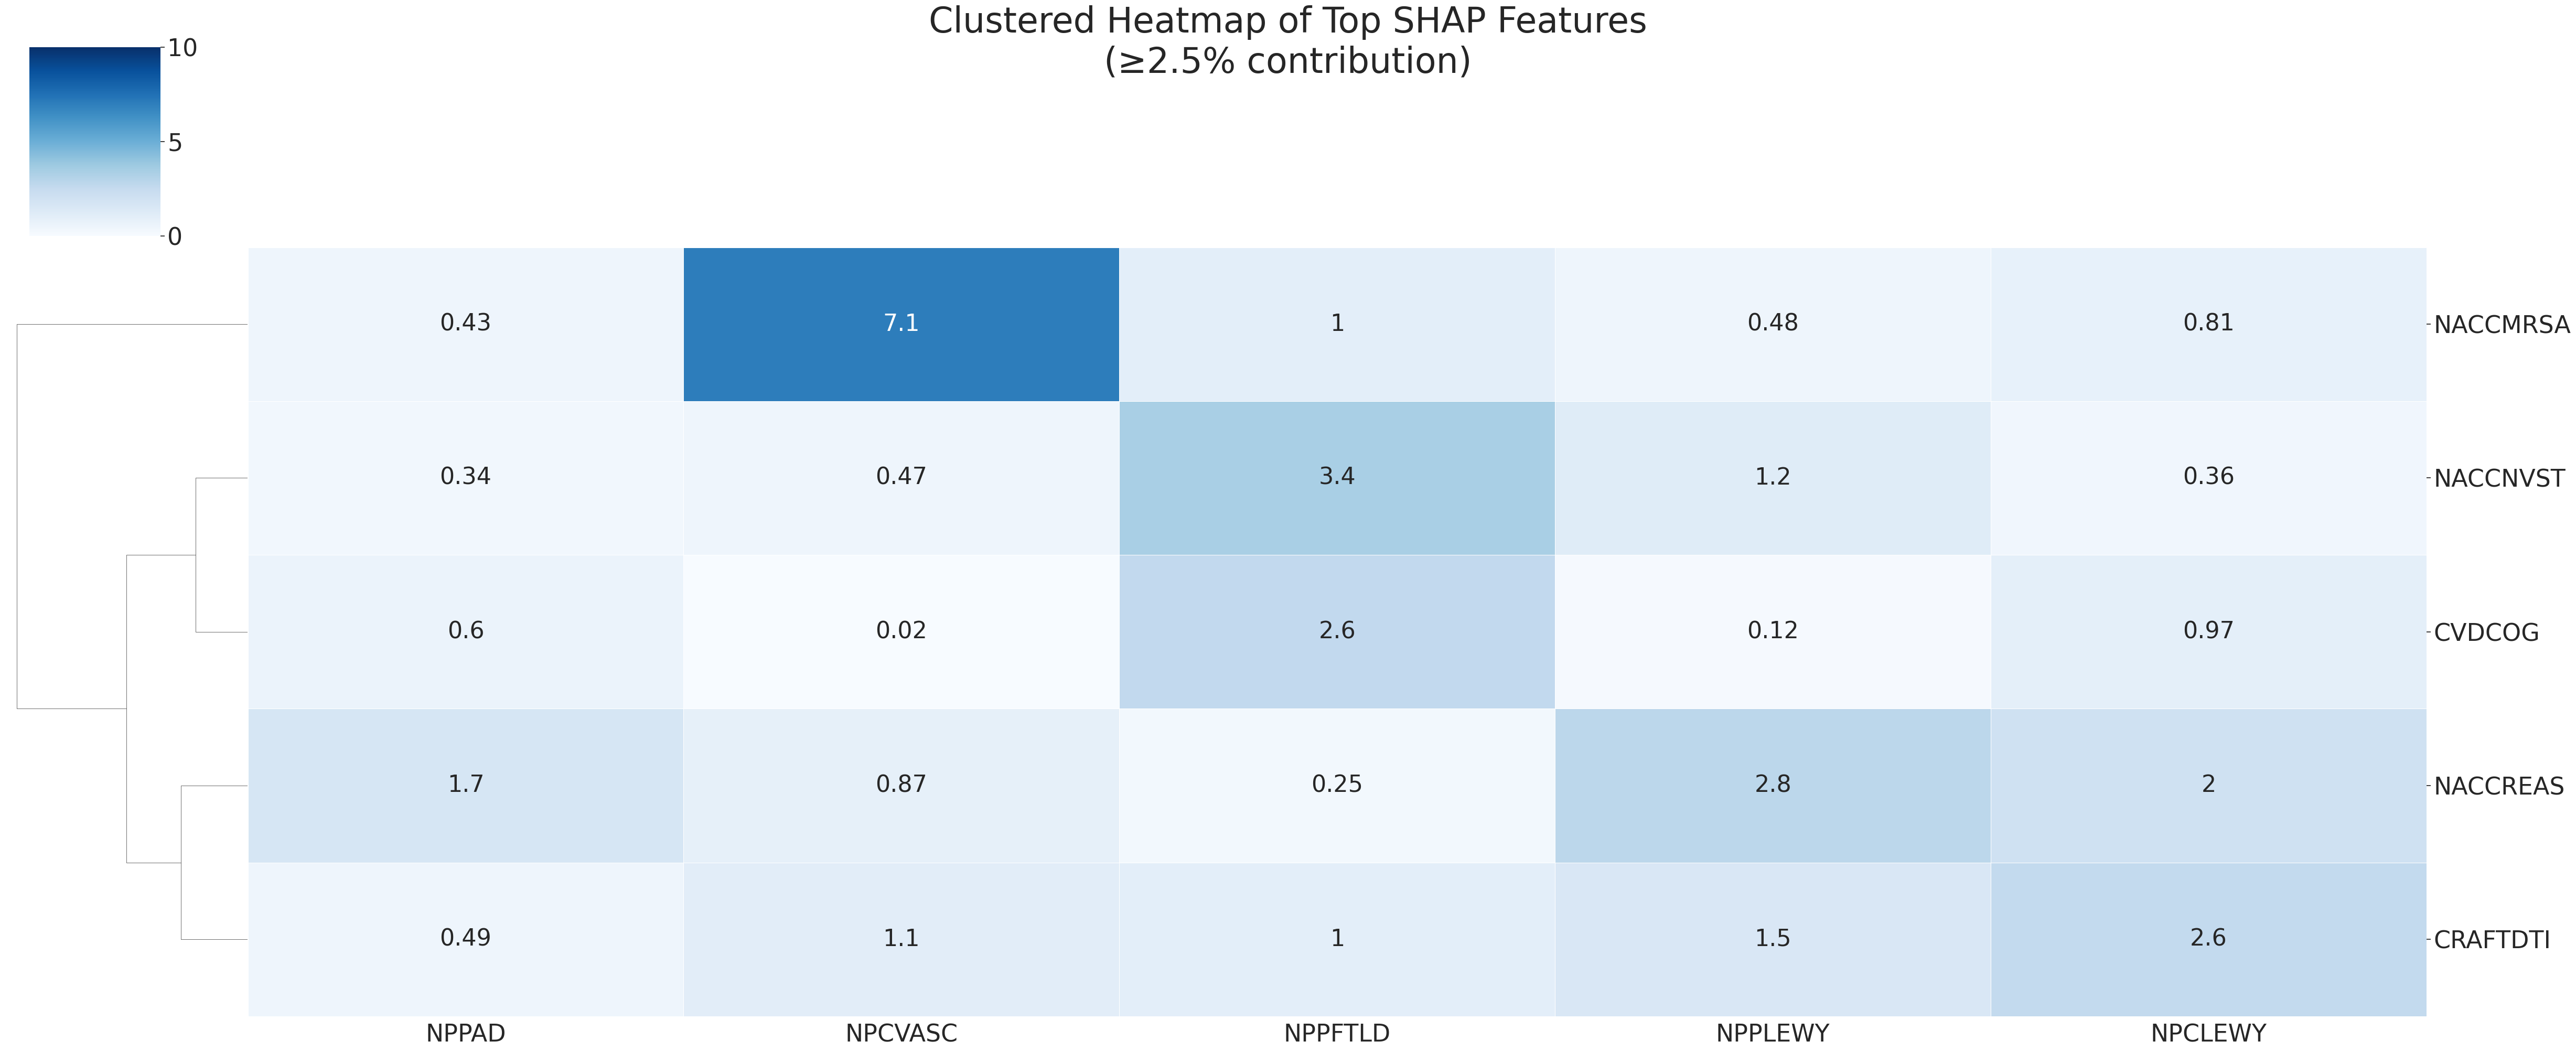

In [ ]:
# ----------------------------------------
# SHAP: Styled Clustered Heatmap of Top Features Across Dementia Types
# (only features with ≥2.5% contribution in any subtype)
# ----------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter features with ≥2.5% SHAP in at least one subtype
top_features = mean_shap_vals.loc[mean_shap_vals.max(axis=1) >= 2.5]

# 2. Cap at 10% and round for neat annotation
clustermap_data = top_features.clip(upper=10).round(2)

# 3. Styling
sns.set(font_scale=3)

# 4. Plot annotated clustermap
shap_clust = sns.clustermap(
    clustermap_data,
    figsize=(50, 20),
    annot=True,
    cmap='Blues',
    annot_kws={"size": 32},
    vmin=0,
    vmax=10,
    dendrogram_ratio=(.1, .2),
    linewidths=0.5,
    col_cluster=False  # keep dementia types in original order
)

# 5. Title and display
plt.suptitle(
    "Clustered Heatmap of Top SHAP Features\n(≥2.5% contribution)",
    fontsize=48,
    y=1.02
)
plt.show()


## **Correlation Matrix**

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:01:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


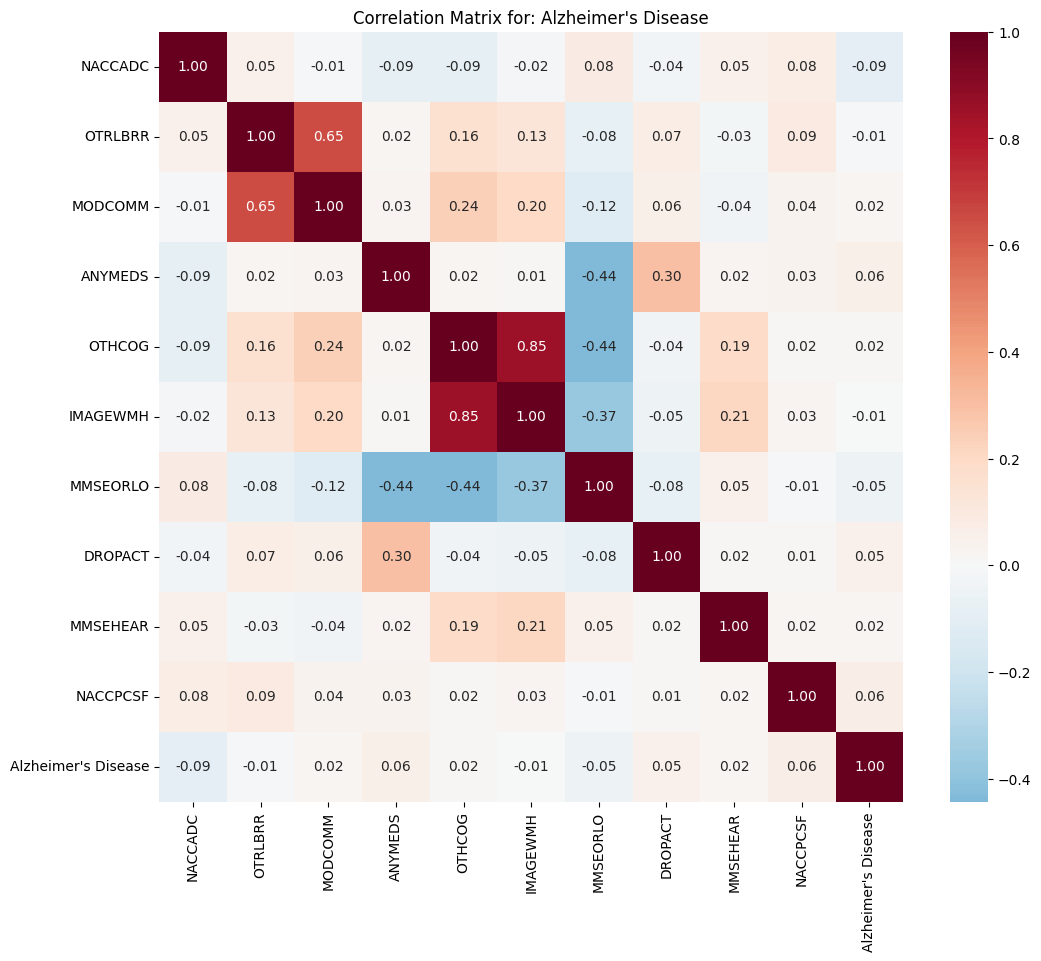

Top 10 features for Alzheimer's Disease: ['NACCADC', 'OTRLBRR', 'MODCOMM', 'ANYMEDS', 'OTHCOG', 'IMAGEWMH', 'MMSEORLO', 'DROPACT', 'MMSEHEAR', 'NACCPCSF']


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:03:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


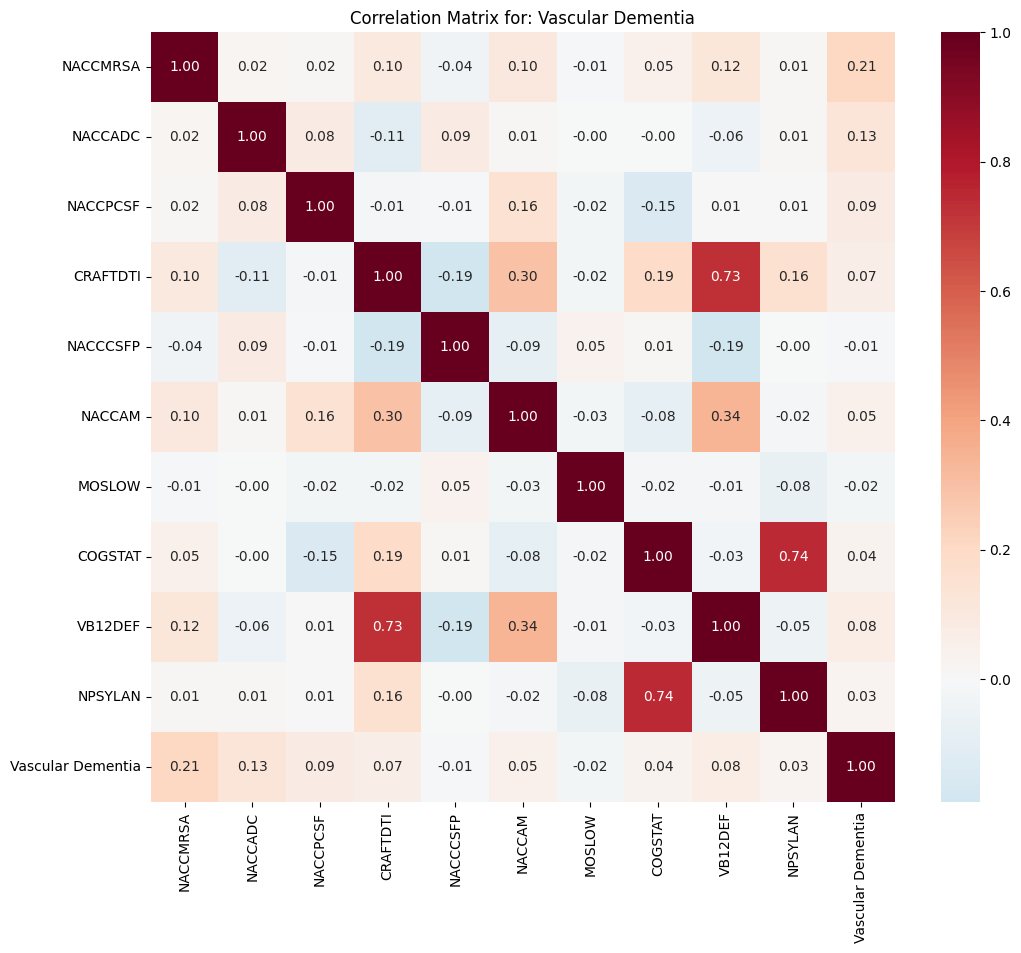

Top 10 features for Vascular Dementia: ['NACCMRSA', 'NACCADC', 'NACCPCSF', 'CRAFTDTI', 'NACCCSFP', 'NACCAM', 'MOSLOW', 'COGSTAT', 'VB12DEF', 'NPSYLAN']


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:05:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


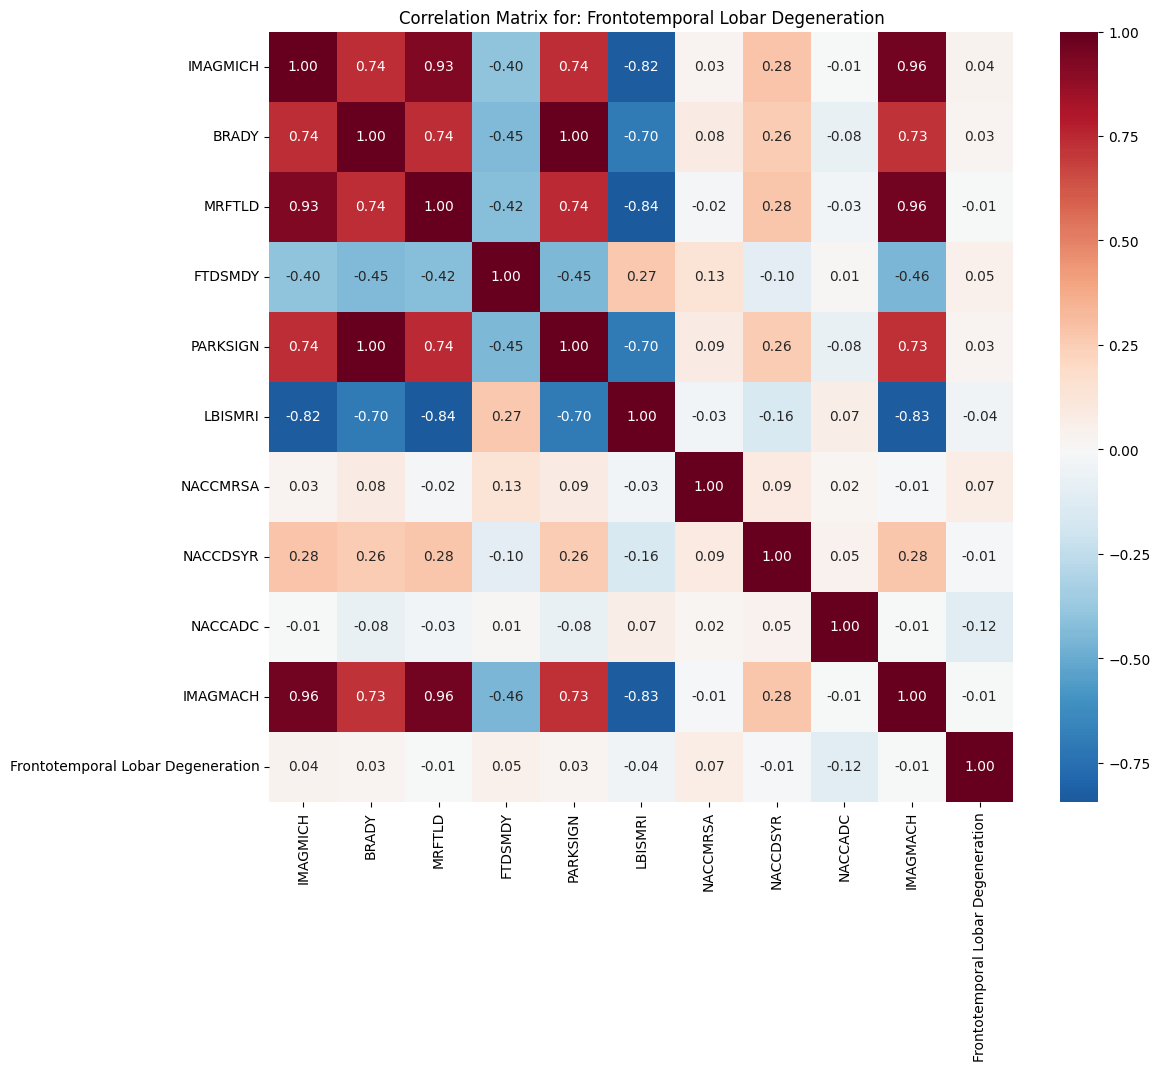

Top 10 features for Frontotemporal Lobar Degeneration: ['IMAGMICH', 'BRADY', 'MRFTLD', 'FTDSMDY', 'PARKSIGN', 'LBISMRI', 'NACCMRSA', 'NACCDSYR', 'NACCADC', 'IMAGMACH']


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:06:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


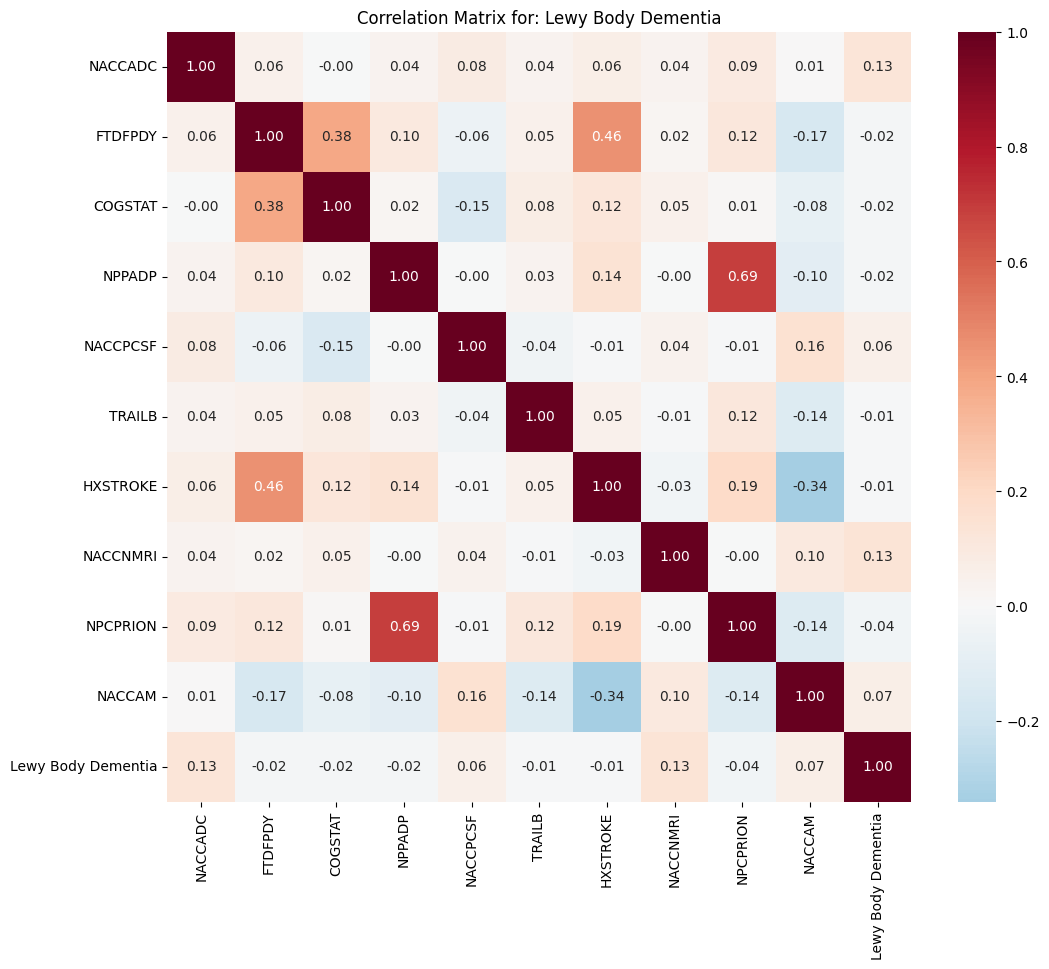

Top 10 features for Lewy Body Dementia: ['NACCADC', 'FTDFPDY', 'COGSTAT', 'NPPADP', 'NACCPCSF', 'TRAILB', 'HXSTROKE', 'NACCNMRI', 'NPCPRION', 'NACCAM']


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:09:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


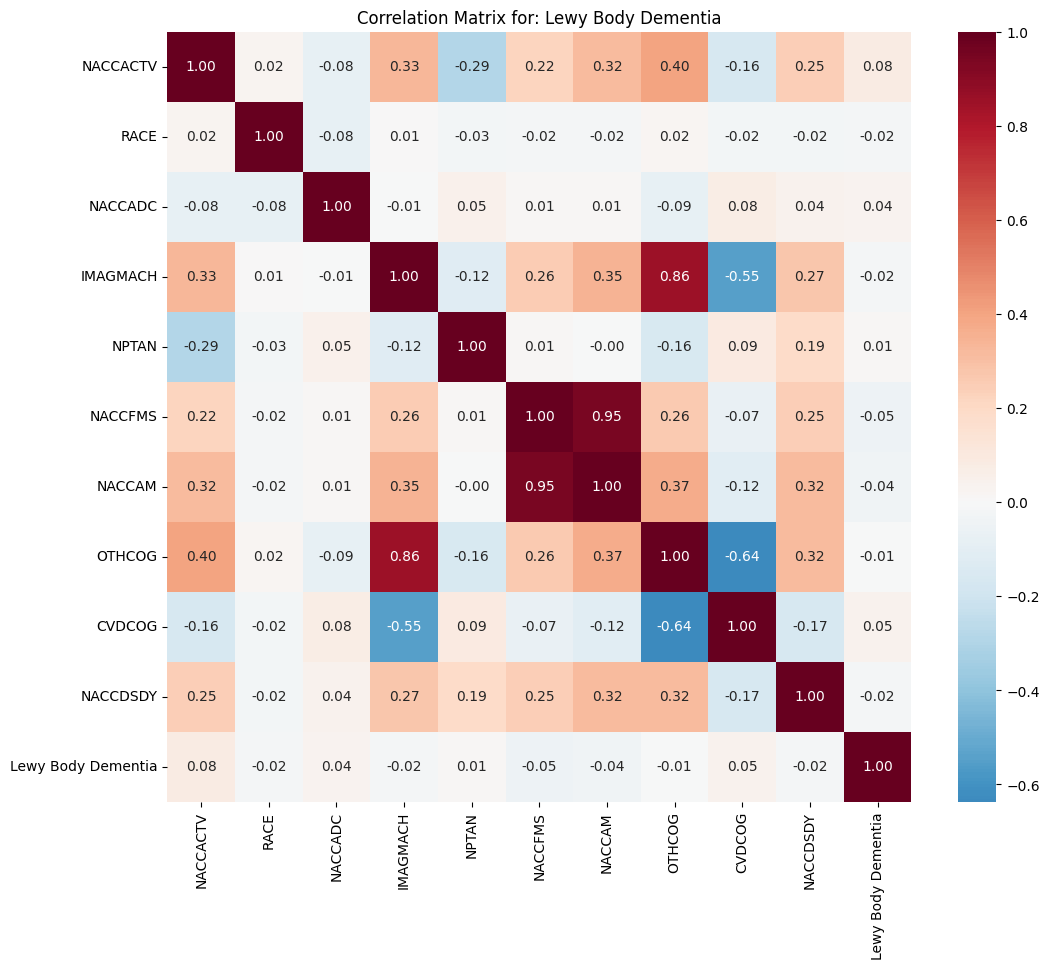

Top 10 features for Lewy Body Dementia: ['NACCACTV', 'RACE', 'NACCADC', 'IMAGMACH', 'NPTAN', 'NACCFMS', 'NACCAM', 'OTHCOG', 'CVDCOG', 'NACCDSDY']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb

def corr_selection(X, y, disease_name, model, num_features=10, show=True):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    top_features = feature_importances.head(num_features).index.tolist()
    selected_data = X[top_features].copy()
    selected_data[disease_name] = y
    if show:
        corr_filtered = selected_data.corr()
        plt.figure(figsize=(12, 10))
        # Correlation matrix: values range from -1 (strong negative) to 1 (strong positive),
        # have 0 as neutral. Center 0 to white, -1  dark blue,  1 as red.
        sns.heatmap(corr_filtered, cmap='RdBu_r', center=0, annot=True, fmt=".2f")
        plt.title(f"Correlation Matrix for: {disease_name}")
        plt.show()
    return top_features

for target_code in target_columns:
    y_target = y_train[target_code]
    disease_name = disease_names[target_code]
    best_params = best_params_dict[target_code].copy()
    best_params['random_state'] = 42
    best_params['use_label_encoder'] = False
    final_model = xgb.XGBClassifier(**best_params)
    final_model.fit(x_train, y_target)
    top_features = corr_selection(x_train, y_target, disease_name, final_model, num_features=10, show=True)
    print(f"Top 10 features for {disease_name}:", top_features)


## **PATHOLOGY PATIENT SUMMARY**

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:17:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:20:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:21:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:23:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:25:38] WARNING: /w

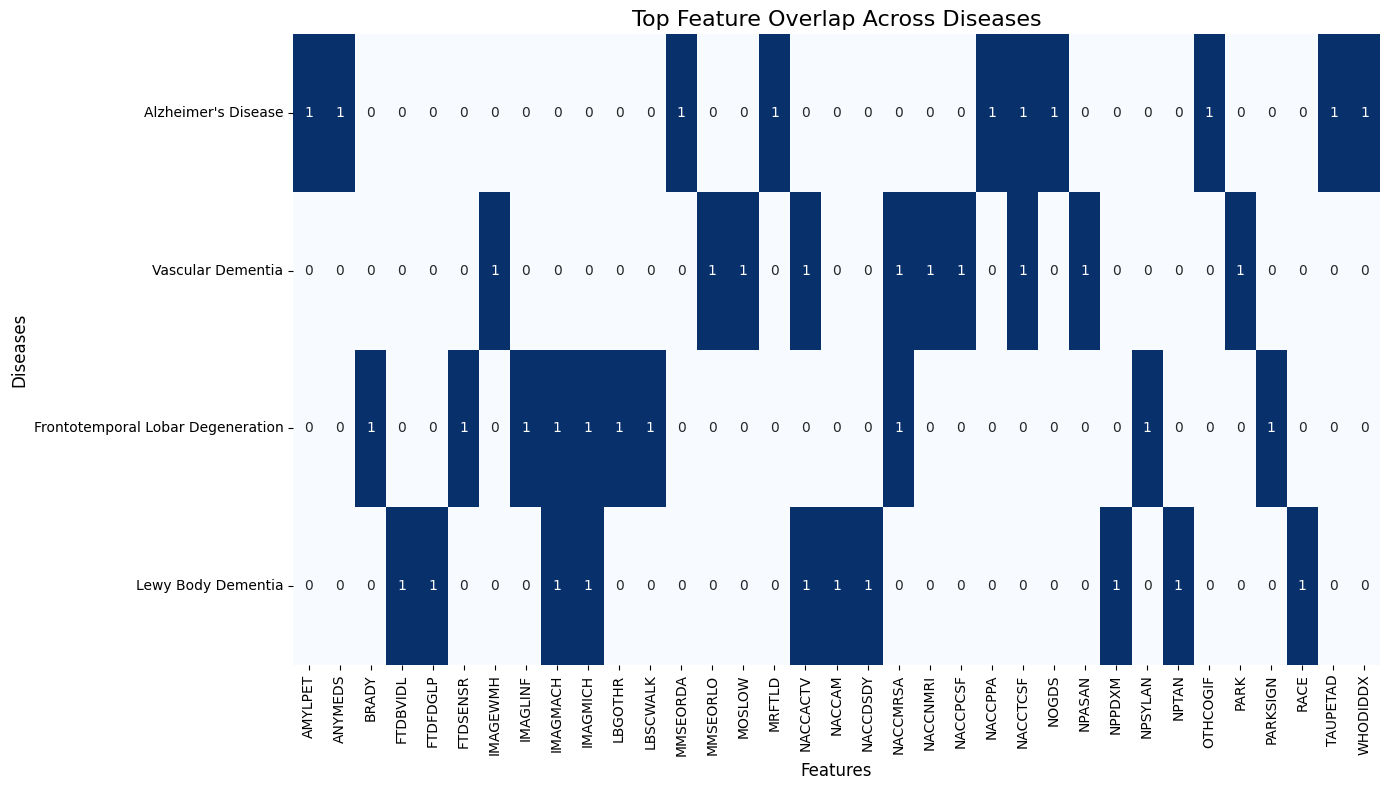

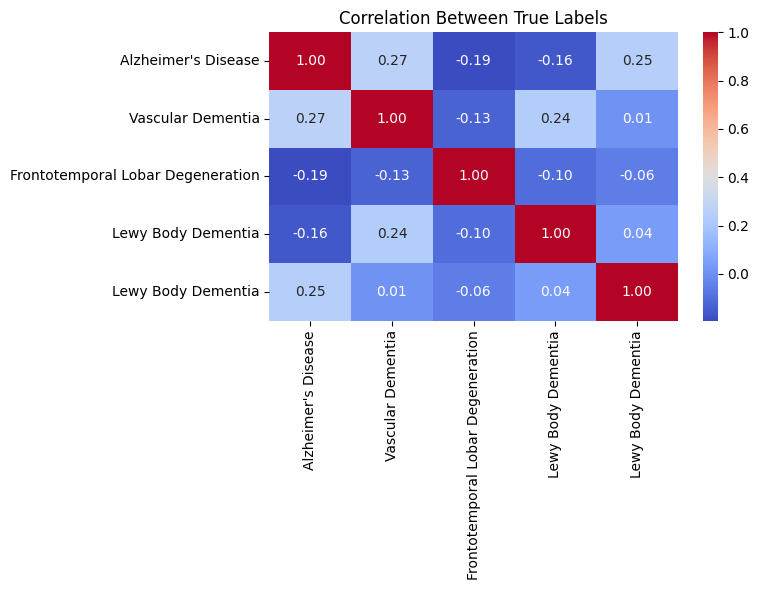

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:27:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:29:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:31:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:32:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:34:57] WARNING: /w

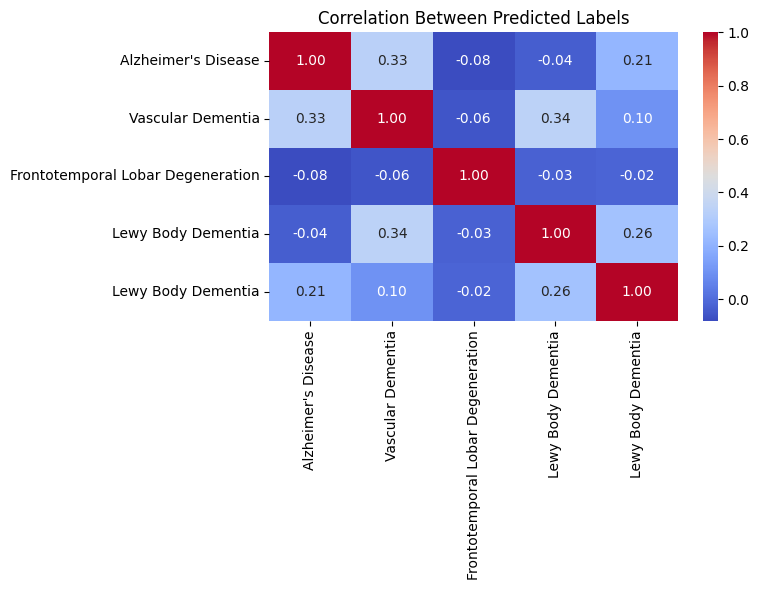

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:36:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:39:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:40:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:42:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:44:19] WARNING: /w

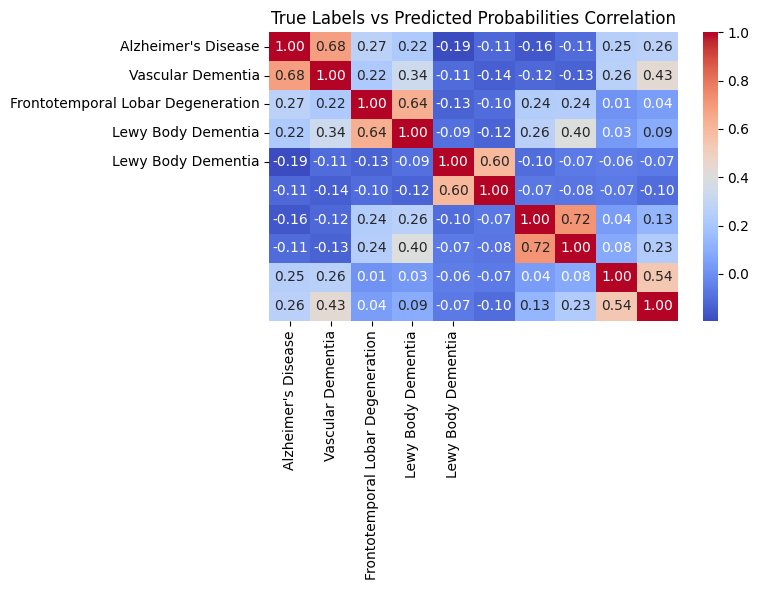


Patient Co-Pathology Overlap Counts:
0.0    9010
1.0    8937
2.0    6870
3.0     579
4.0     376
Name: count, dtype: int64


<ipython-input-23-de80d6b60eeb>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overlap_summary.index, y=overlap_summary.values, palette="Blues_d")


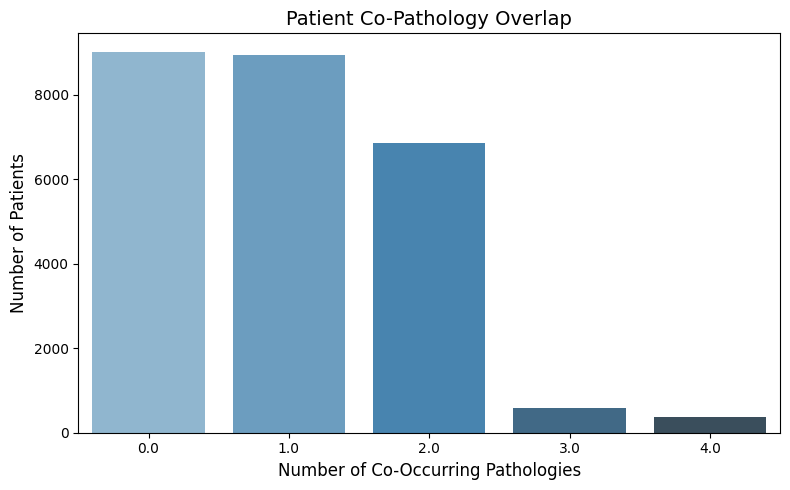

In [ ]:
# -------------------------------------------------------------
# 8. Cross-Pathology Correlation & Co-Occurrence Analysis
# -------------------------------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# -------- (0) Top Features per Disease from XGBoost Models --------
# This regenerates the top_features_dict from scratch using your existing params & training loops
top_features_dict = {}

for col in target_columns:
    clf = xgb.XGBClassifier(n_jobs=-1, **best_params_dict[col],
                            random_state=42, use_label_encoder=False, objective='binary:logistic')
    clf.fit(x_train[feature_subset], y_train[col])

    # Get top 10 features by importance
    importances = clf.feature_importances_
    top_idxs = np.argsort(importances)[-10:]
    top_features = x_train[feature_subset].columns[top_idxs].tolist()

    top_features_dict[col] = top_features

# -------- (1) Top Feature Overlap Across Diseases --------
renamed_top_features = {disease_names[k]: v for k, v in top_features_dict.items()}
all_features = np.unique(np.concatenate(list(renamed_top_features.values())))
overlap_df = pd.DataFrame(0, index=renamed_top_features.keys(), columns=all_features)

for disease, features in renamed_top_features.items():
    overlap_df.loc[disease, features] = 1

plt.figure(figsize=(14, 8))
sns.heatmap(overlap_df, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Top Feature Overlap Across Diseases", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Diseases", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# -------- (2) Correlation Between True Labels --------
true_corr = y_test[target_columns].corr()

plt.figure(figsize=(8,6))
sns.heatmap(true_corr, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=[disease_names[c] for c in target_columns],
            yticklabels=[disease_names[c] for c in target_columns])
plt.title("Correlation Between True Labels")
plt.tight_layout()
plt.show()

# -------- (3) Correlation Between Model Predictions (Binary) --------
y_pred_binary = pd.DataFrame(index=y_test.index)

for col in target_columns:
    clf = xgb.XGBClassifier(n_jobs=-1, **best_params_dict[col],
                            random_state=42, use_label_encoder=False, objective='binary:logistic')
    clf.fit(x_train[feature_subset], y_train[col])
    y_pred_binary[col] = clf.predict(x_test[feature_subset])

pred_corr = y_pred_binary.corr()

plt.figure(figsize=(8,6))
sns.heatmap(pred_corr, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=[disease_names[c] for c in target_columns],
            yticklabels=[disease_names[c] for c in target_columns])
plt.title("Correlation Between Predicted Labels")
plt.tight_layout()
plt.show()

# -------- (4) Correlation: True Labels vs Predicted Probabilities --------
y_pred_proba = pd.DataFrame(index=y_test.index)

for col in target_columns:
    clf = xgb.XGBClassifier(n_jobs=-1, **best_params_dict[col],
                            random_state=42, use_label_encoder=False, objective='binary:logistic')
    clf.fit(x_train[feature_subset], y_train[col])
    y_pred_proba[col] = clf.predict_proba(x_test[feature_subset])[:,1]

cross_corr = pd.concat([y_test[target_columns], y_pred_proba], axis=1).corr()
cross_corr_matrix = cross_corr.loc[target_columns, target_columns]

plt.figure(figsize=(8,6))
sns.heatmap(cross_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=[disease_names[c] for c in target_columns],
            yticklabels=[disease_names[c] for c in target_columns])
plt.title("True Labels vs Predicted Probabilities Correlation")
plt.tight_layout()
plt.show()

# -------- (5) Co-Pathology Overlap by Patient --------
co_pathology_counts = y_test[target_columns].sum(axis=1)
overlap_summary = co_pathology_counts.value_counts().sort_index()

print("\nPatient Co-Pathology Overlap Counts:")
print(overlap_summary)

plt.figure(figsize=(8,5))
sns.barplot(x=overlap_summary.index, y=overlap_summary.values, palette="Blues_d")
plt.xlabel("Number of Co-Occurring Pathologies", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.title("Patient Co-Pathology Overlap", fontsize=14)
plt.tight_layout()
plt.show()


# ***HYPERPARAMETER OPTIMIZATION***

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from functools import reduce

# --------------------------
# Import machine learning libraries
# --------------------------
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import (
    StratifiedKFold, train_test_split
)
from sklearn.metrics import (
    classification_report, precision_recall_curve, auc, accuracy_score,
    f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.utils import resample
from sklearn.base import clone
from sklearn.utils.class_weight import compute_class_weight
from skopt.space import Real, Integer
from skopt import BayesSearchCV
from bayes_opt import BayesianOptimization

# --------------------------
# 1. Data Preprocessing
# --------------------------
print("Starting data preprocessing...")
# Assume pre_diagnosis_df is pre-loaded DataFrame and is valid
pre_diagnosis_df = pre_diagnosis_df.copy()

# Define target columns and split features vs targets
target_columns = ['NPPAD', 'NPCVASC', 'NPPFTLD', 'NPPLEWY', 'NPCLEWY']
features = pre_diagnosis_df.drop(columns=target_columns)
targets = pre_diagnosis_df[target_columns]
print("Splitting features and targets complete.")

# Clean and convert target values
def clean_target_values(df):
    print("Cleaning target values (replacing -4 and filling missing values)...")
    return df.replace(-4, np.nan).ffill().bfill()

def define_binary_labels(df):
    print("Converting target values to binary labels...")
    return df.replace({1.0: 1, 2.0: 0, 0.0: 0})

targets = clean_target_values(targets)
targets = define_binary_labels(targets)

# Ensure all features are numeric
print("Converting feature columns to numeric...")
features = features.apply(pd.to_numeric, errors='coerce')

# --------------------------
# 2. Advanced Missing Data Imputation
# --------------------------
print("Performing efficient imputation using IterativeImputer with Ridge estimator...")
imputer = IterativeImputer(
    estimator=Ridge(alpha=1.0),
    random_state=42,
    max_iter=3,
    tol=1e-1,
    initial_strategy='mean',
    imputation_order='ascending',
    n_nearest_features=20,
    skip_complete=True
)
features_imputed = pd.DataFrame(
    imputer.fit_transform(features),
    columns=features.columns,
    index=features.index
)
features_imputed = features_imputed.dropna()
targets = targets.loc[features_imputed.index]
print(f"Dataset dimensions after imputation: {features_imputed.shape}")

# --------------------------
# 3. Construct 'visit_date' Column
# --------------------------
print("Constructing 'visit_date' column from VISITYR...")
features_imputed['visit_date'] = pd.to_datetime(
    features_imputed['VISITYR'].astype(int).astype(str) + '-01-01',
    errors='coerce'
)
print("Visit date column constructed.")

# --------------------------
# 4. Model Training Setup & Hyperparameter Tuning Functions
# --------------------------

# Define SMOTE oversampling
smote = SMOTE(sampling_strategy=0.85, random_state=42)

# Example hyperparameter search space for reference (used in tuning functions)
search_spaces = {
    'learning_rate': Real(0.01, 0.1, prior='log-uniform'),
    'max_depth': Integer(4, 6),
    'subsample': Real(0.75, 0.85),
    'colsample_bytree': Real(0.8, 0.9),
    'reg_alpha': Real(0, 0.1),
    'reg_lambda': Real(0.5, 1.0),
    'n_estimators': Integer(150, 200),
    'gamma': Real(0, 0.05),
    'min_child_weight': Integer(1, 2)
}

num_runs = 3
print(f"Number of runs set to {num_runs}.")

### Bayesian Optimization Function
def bo_tune_xgb(X, y):
    def xgb_eval(n_estimators, learning_rate, max_depth, gamma, min_child_weight, subsample, colsample_bytree, scale_pos_weight):
        params = {
            'n_estimators': int(n_estimators),
            'learning_rate': learning_rate,
            'max_depth': int(max_depth),
            'gamma': gamma,
            'min_child_weight': int(min_child_weight),
            'subsample': subsample,
            'colsample_bytree': colsample_bytree,
            'eval_metric': 'auc',
            'scale_pos_weight': scale_pos_weight
        }
        dtrain = xgb.DMatrix(X, label=y)
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
        cv_result = xgb.cv(
            params, dtrain, num_boost_round=1000, folds=cv,
            maximize=True, metrics="auc", early_stopping_rounds=10, seed=42
        )
        return cv_result['test-auc-mean'].max()

    optimizer = BayesianOptimization(
        f=xgb_eval,
        pbounds={
            'n_estimators': (50, 300),
            'learning_rate': (0.01, 0.2),
            'max_depth': (2, 10),
            'gamma': (0.01, 15),
            'min_child_weight': (1, 25),
            'subsample': (0.2, 1.0),
            'colsample_bytree': (0.2, 1.0),
            'scale_pos_weight': (sum(y == 0) / sum(y), sum(y == 0) / sum(y))
        },
        random_state=42,
        verbose=2
    )
    optimizer.maximize(init_points=10, n_iter=25)
    best_params = optimizer.max['params']
    best_params['max_depth'] = int(best_params['max_depth'])
    best_params['n_estimators'] = int(best_params['n_estimators'])
    best_params['min_child_weight'] = int(best_params['min_child_weight'])
    # Add the objective parameter to best_params if needed.
    best_params['objective'] = 'binary:logistic'
    print(f"Optimal Parameters: {best_params}")
    return xgb.XGBClassifier(**best_params)

# Utility function to compute confidence intervals
def compute_ci(scores, ci=0.95):
    bootstrapped_scores = [np.mean(resample(scores, replace=True)) for _ in range(1000)]
    lower = np.percentile(bootstrapped_scores, (1 - ci) / 2 * 100)
    upper = np.percentile(bootstrapped_scores, (1 + ci) / 2 * 100)
    return lower, upper

cv_results = {}

# --------------------------
# 5. Temporal External Test Split
# --------------------------
print("Splitting data into training and external test sets...")
external_test_cutoff = datetime.datetime(2019, 6, 1)
train_mask = features_imputed['visit_date'] < external_test_cutoff
test_mask = features_imputed['visit_date'] >= external_test_cutoff

X_train_full = features_imputed[train_mask].drop(columns=['visit_date'])
X_test_external = features_imputed[test_mask].drop(columns=['visit_date'])
targets_train = targets.loc[X_train_full.index]
targets_external = targets.loc[X_test_external.index]
print(f"Train samples: {X_train_full.shape[0]}, External test samples: {X_test_external.shape[0]}")

# --------------------------
# 6. Internal Model Training with Cross-Validation and Bayesian Tuning
# --------------------------
print("Starting internal model training with cross-validation...")

for col in targets.columns:
    print(f"\nTraining model for target: {col}")
    X_internal = X_train_full.copy()
    y_internal = targets_train[col]

    # Perform hyperparameter tuning once for the target variable using Bayesian Optimization.
    tuned_model = bo_tune_xgb(X_internal, y_internal)
    tuned_params = tuned_model.get_params()
    print(f"Using tuned parameters for CV: {tuned_params}")

    auc_pr_scores_all, acc_scores_all, f1_scores_all, prec_scores_all, roc_auc_scores_all = [], [], [], [], []

    for run in range(num_runs):
        print(f"Run {run + 1}...")
        auc_pr_scores, acc_scores, f1_scores, prec_scores, roc_auc_scores = [], [], [], [], []
        kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42 + run)

        for train_idx, val_idx in kf.split(X_internal, y_internal):
            X_train_cv, X_val_cv = X_internal.iloc[train_idx], X_internal.iloc[val_idx]
            y_train_cv, y_val_cv = y_internal.iloc[train_idx], y_internal.iloc[val_idx]

            if len(np.unique(y_train_cv)) > 1:
                X_resampled, y_resampled = smote.fit_resample(X_train_cv, y_train_cv)
            else:
                X_resampled, y_resampled = X_train_cv, y_train_cv

            # Calculate scale_pos_weight for the current fold
            classes = np.unique(y_resampled)
            class_weights = compute_class_weight('balanced', classes=classes, y=y_resampled)
            weight_dict = dict(zip(classes, class_weights))
            scale_pos_weight = weight_dict.get(1, 1) / weight_dict.get(0, 1)
            tuned_params['scale_pos_weight'] = scale_pos_weight

            # Remove conflicting parameters to avoid multiple values error
            tuned_params.pop('objective', None)
            tuned_params.pop('random_state', None)

            # Instantiate model using tuned parameters with explicit settings
            model = xgb.XGBClassifier(**tuned_params, objective='binary:logistic',
                                      random_state=42, use_label_encoder=False)
            model.fit(X_resampled, y_resampled)
            y_pred_prob = model.predict_proba(X_val_cv)[:, 1]
            y_pred = model.predict(X_val_cv)

            precision_vals, recall_vals, _ = precision_recall_curve(y_val_cv, y_pred_prob)
            auc_pr = auc(recall_vals, precision_vals) if len(recall_vals) > 1 else 0
            roc_auc = roc_auc_score(y_val_cv, y_pred_prob)
            acc = accuracy_score(y_val_cv, y_pred)
            f1 = f1_score(y_val_cv, y_pred, zero_division=0)
            prec = precision_score(y_val_cv, y_pred, zero_division=0)

            auc_pr_scores.append(auc_pr)
            acc_scores.append(acc)
            f1_scores.append(f1)
            prec_scores.append(prec)
            roc_auc_scores.append(roc_auc)

        auc_pr_scores_all.append(np.mean(auc_pr_scores))
        acc_scores_all.append(np.mean(acc_scores))
        f1_scores_all.append(np.mean(f1_scores))
        prec_scores_all.append(np.mean(prec_scores))
        roc_auc_scores_all.append(np.mean(roc_auc_scores))

    print(f"Results for {col}:")
    print(f"AUC-PR: {np.mean(auc_pr_scores_all):.4f}, Accuracy: {np.mean(acc_scores_all):.4f}, "
          f"F1: {np.mean(f1_scores_all):.4f}, Precision: {np.mean(prec_scores_all):.4f}, "
          f"ROC AUC: {np.mean(roc_auc_scores_all):.4f}")
    cv_results[col] = {
        "auc_pr_mean": np.mean(auc_pr_scores_all),
        "acc_mean": np.mean(acc_scores_all),
        "f1_mean": np.mean(f1_scores_all),
        "prec_mean": np.mean(prec_scores_all),
        "roc_auc_mean": np.mean(roc_auc_scores_all)
    }

# --------------------------
# 7. Final External Test Evaluation Using Manually Provided Best Tuned Hyperparameters
# --------------------------
print("\nFinal External Test Evaluation Using Manually Provided Best Hyperparameters:\n")

# Manually provided best tuned hyperparameters for each target.
# (These values were obtained during your internal tuning for each target.)
best_params_dict = {
    'NPPAD': {
        'colsample_bytree': 0.2959052013119931,
        'gamma': 0.06645864723163242,
        'learning_rate': 0.07268496438341125,
        'max_depth': 9,
        'min_child_weight': 2,
        'n_estimators': 273,
        'scale_pos_weight': 1.4029422859298377,
        'subsample': 0.6724415296011144,
        'objective': 'binary:logistic'
    },
    'NPCVASC': {
        'colsample_bytree': 0.9027973532095548,
        'gamma': 0.30034316206063866,
        'learning_rate': 0.05931965434185861,
        'max_depth': 9,
        'min_child_weight': 11,
        'n_estimators': 174,
        'scale_pos_weight': 2.301477066597564,
        'subsample': 0.6109206665327078,
        'objective': 'binary:logistic'
    },
    'NPPFTLD': {
        'colsample_bytree': 0.7941471813064929,
        'gamma': 0.15872400429824549,
        'learning_rate': 0.11828681068934162,
        'max_depth': 5,
        'min_child_weight': 11,
        'n_estimators': 289,
        'scale_pos_weight': 16.587520706791828,
        'subsample': 0.7812118371899288,
        'objective': 'binary:logistic'
    },
    'NPPLEWY': {
        'colsample_bytree': 0.9596391600818355,
        'gamma': 0.26003516321998293,
        'learning_rate': 0.06455171801802792,
        'max_depth': 9,
        'min_child_weight': 21,
        'n_estimators': 282,
        'scale_pos_weight': 8.222817431591139,
        'subsample': 0.8563535347075413,
        'objective': 'binary:logistic'
    },
    'NPCLEWY': {
        'colsample_bytree': 0.5439586158174785,
        'gamma': 0.29133350032001704,
        'learning_rate': 0.036472916662562645,
        'max_depth': 7,
        'min_child_weight': 21,
        'n_estimators': 277,
        'scale_pos_weight': 6.968726544908682,
        'subsample': 0.6990078327466633,
        'objective': 'binary:logistic'
    }
}

# Define the performance metric function as specified.
def get_performance_metrics(model, X, y):
    predictions = model.predict(X)
    scores = model.predict_proba(X)[:,1]
    print(f'Accuracy: {accuracy_score(y, predictions)}')
    print(f'Precision: {precision_score(y, predictions)}')
    print(f'Recall/Sensitivity/TPR: {recall_score(y, predictions)}')
    print(f'Specificity/1-FPR: {recall_score(y, predictions, pos_label=0)}')
    print(f'ROC-AUC: {roc_auc_score(y, scores)}')
    print(f'PR-AUC: {average_precision_score(y, scores)}\n')

# Loop over each target to build the final model, train it, and evaluate on the external test set.
for col in targets.columns:
    print(f"\n*** Final Evaluation for target: {col} ***\n")

    # Retrieve the full training and external test sets for this target.
    X_train_final = X_train_full.copy()
    y_train_final = targets_train[col]
    X_test_final = X_test_external.copy()
    y_test_final = targets_external[col]

    # Retrieve the manually provided best tuned hyperparameters for this target.
    # Also add standard parameters: random_state and use_label_encoder.
    best_params = best_params_dict[col].copy()
    best_params['random_state'] = 42
    best_params['use_label_encoder'] = False

    # Build the final model using the provided hyperparameters.
    final_model = xgb.XGBClassifier(**best_params)
    final_model.fit(X_train_final, y_train_final)

    # Evaluate the final model on the external test set.
    get_performance_metrics(final_model, X_test_final, y_test_final)



Starting data preprocessing...
Splitting features and targets complete.
Cleaning target values (replacing -4 and filling missing values)...
Converting target values to binary labels...
Converting feature columns to numeric...
Performing efficient imputation using IterativeImputer with Ridge estimator...
Dataset dimensions after imputation: (73081, 863)
Constructing 'visit_date' column from VISITYR...
Visit date column constructed.
Number of runs set to 3.
Splitting data into training and external test sets...
Train samples: 63702, External test samples: 9379
Starting internal model training with cross-validation...

Training model for target: NPPAD
|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:36:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:36:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:37:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:37:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 1         | 0.764     | 0.4996    | 14.26     | 0.1491    | 6.789     | 4.744     | 89.0      | 1.403     | 0.8929    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:37:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:37:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:37:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:37:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 2         | 0.7528    | 0.6809    | 10.62     | 0.01391   | 9.759     | 20.98     | 103.1     | 1.403     | 0.3467    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:37:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:37:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:37:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 3         | 0.7629    | 0.4434    | 7.876     | 0.09207   | 4.33      | 15.68     | 84.87     | 1.403     | 0.4931    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:38:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:38:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:38:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:38:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 4         | 0.7411    | 0.5649    | 11.78     | 0.04794   | 6.114     | 15.22     | 61.61     | 1.403     | 0.3364    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:38:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:38:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:38:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 5         | 0.7409    | 0.252     | 14.23     | 0.1935    | 8.467     | 8.311     | 74.42     | 1.403     | 0.5521    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:39:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:39:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:39:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:39:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 6         | 0.7876    | 0.2976    | 7.433     | 0.01653   | 9.275     | 7.211     | 215.6     | 1.403     | 0.6161    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:40:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:40:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:40:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:40:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 7         | 0.8467    | 0.6374    | 2.781     | 0.1942    | 8.201     | 23.55     | 273.7     | 1.403     | 0.9375    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:40:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:40:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:40:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 8         | 0.7983    | 0.2708    | 2.948     | 0.01859   | 4.603     | 10.33     | 117.8     | 1.403     | 0.4854    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:43:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:43:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:43:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:43:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 9         | 0.7658    | 0.4247    | 8.145     | 0.03678   | 8.418     | 2.789     | 296.7     | 1.403     | 0.359     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:43:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:43:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:43:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:43:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 10        | 0.7227    | 0.2044    | 12.23     | 0.1443    | 7.832     | 19.51     | 68.51     | 1.403     | 0.2927    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:44:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:44:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:44:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 11        | 0.8624    | 0.4803    | 1.385     | 0.07108   | 7.026     | 22.47     | 259.9     | 1.403     | 0.3073    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:46:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:46:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:46:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 12        | 0.7251    | 0.7975    | 14.76     | 0.09222   | 2.69      | 22.74     | 253.2     | 1.403     | 0.624     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:46:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:46:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:46:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:46:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 13        | 0.841     | 0.3421    | 2.535     | 0.06623   | 7.233     | 23.74     | 274.2     | 1.403     | 0.9241    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:47:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:47:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:47:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:47:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 14        | 0.9166    | 0.9047    | 0.2743    | 0.1016    | 7.05      | 14.85     | 264.4     | 1.403     | 0.2859    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:50:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:50:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:50:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:50:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 15        | 0.9145    | 0.2967    | 0.4355    | 0.1875    | 8.191     | 2.617     | 268.3     | 1.403     | 0.7405    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:51:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:51:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:51:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:51:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 16        | 0.956     | 0.9116    | 0.07486   | 0.09409   | 8.866     | 3.22      | 257.2     | 1.403     | 0.5882    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:55:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:55:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:55:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:55:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 17        | 0.8468    | 0.287     | 0.08877   | 0.1995    | 5.275     | 1.346     | 243.0     | 1.403     | 0.22      |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:57:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:57:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:57:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:57:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 18        | 0.7942    | 0.3874    | 7.993     | 0.198     | 9.426     | 2.616     | 258.4     | 1.403     | 0.9594    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [18:57:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:57:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:58:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [18:58:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 19        | 0.8322    | 0.2731    | 0.0133    | 0.08412   | 3.203     | 4.743     | 258.1     | 1.403     | 0.4608    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:00:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:00:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:00:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:00:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 20        | 0.9306    | 0.3967    | 0.2664    | 0.1221    | 8.704     | 9.068     | 263.5     | 1.403     | 0.4966    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:02:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:02:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:02:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:02:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 21        | 0.8484    | 0.8627    | 2.546     | 0.1795    | 9.971     | 10.81     | 271.7     | 1.403     | 0.4838    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:03:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:03:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:03:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:03:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 22        | 0.842     | 0.7793    | 2.396     | 0.04647   | 9.908     | 11.37     | 257.8     | 1.403     | 0.3157    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:04:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:04:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:04:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:04:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 23        | 0.8668    | 0.7317    | 1.606     | 0.05081   | 7.602     | 2.571     | 262.9     | 1.403     | 0.3301    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:07:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:07:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:07:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:07:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 24        | 0.901     | 0.8422    | 1.02      | 0.05139   | 8.263     | 3.619     | 253.1     | 1.403     | 0.356     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:10:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:10:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:10:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 25        | 0.9135    | 0.9189    | 0.1208    | 0.171     | 4.022     | 8.574     | 268.6     | 1.403     | 0.9763    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:12:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:12:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:12:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:12:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 26        | 0.9281    | 0.6222    | 0.08095   | 0.1261    | 5.981     | 2.573     | 276.6     | 1.403     | 0.6906    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:15:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:15:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:15:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:15:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 27        | 0.7521    | 0.6991    | 7.296     | 0.08722   | 2.694     | 2.216     | 274.9     | 1.403     | 0.9561    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:16:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:16:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:16:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 28        | 0.9578    | 0.2959    | 0.06646   | 0.07268   | 9.754     | 2.519     | 273.9     | 1.403     | 0.6724    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:20:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:20:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:20:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:20:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 29        | 0.7059    | 0.7438    | 14.78     | 0.1242    | 8.5       | 23.62     | 165.4     | 1.403     | 0.2021    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:20:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:20:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:20:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 30        | 0.9485    | 0.5056    | 0.2515    | 0.02396   | 9.062     | 1.74      | 283.3     | 1.403     | 0.7298    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:24:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:24:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:24:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 31        | 0.8113    | 0.4287    | 1.261     | 0.1565    | 2.904     | 1.921     | 187.6     | 1.403     | 0.6245    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:26:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:26:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:26:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:26:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 32        | 0.9166    | 0.3056    | 0.5127    | 0.07405   | 9.928     | 8.658     | 284.3     | 1.403     | 0.3897    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:29:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:29:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:29:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:29:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 33        | 0.9118    | 0.4565    | 0.7053    | 0.1043    | 8.368     | 1.591     | 144.3     | 1.403     | 0.5853    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:31:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:31:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:31:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 34        | 0.7394    | 0.6196    | 11.51     | 0.07655   | 3.722     | 1.244     | 142.6     | 1.403     | 0.4952    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:31:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:31:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:31:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 35        | 0.9002    | 0.241     | 0.7267    | 0.1539    | 8.821     | 1.466     | 154.2     | 1.403     | 0.7425    |
Optimal Parameters: {'colsample_bytree': np.float64(0.2959052013119931), 'gamma': np.float64(0.06645864723163242), 'learning_rate': np.float64(0.07268496438341125), 'max_depth': 9, 'min_child_weight': 2, 'n_estimators': 273, 'scale_pos_weight': np.float64(1.4029422859298377), 'subsample': np.float64(0.6724415296011144), 'objective': 'binary:logistic'}
Using tuned parameters for CV: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': np.float64(0.2959052013119931), 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': np.float64(0.06645864723163242), 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': np.float64(0.072

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:32:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:33:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:33:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Run 2...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:33:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:34:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:34:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Run 3...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:34:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:35:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:35:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Results for NPPAD:
AUC-PR: 0.8916, Accuracy: 0.8332, F1: 0.7899, Precision: 0.8302, ROC AUC: 0.9091

Training model for target: NPCVASC
|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:35:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:35:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 1         | 0.7831    | 0.4996    | 14.26     | 0.1491    | 6.789     | 4.744     | 89.0      | 2.301     | 0.8929    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:36:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:36:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:36:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 2         | 0.7743    | 0.6809    | 10.62     | 0.01391   | 9.759     | 20.98     | 103.1     | 2.301     | 0.3467    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:37:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:37:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:37:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 3         | 0.7857    | 0.4434    | 7.876     | 0.09207   | 4.33      | 15.68     | 84.87     | 2.301     | 0.4931    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:38:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:38:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:38:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:38:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 4         | 0.7601    | 0.5649    | 11.78     | 0.04794   | 6.114     | 15.22     | 61.61     | 2.301     | 0.3364    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:38:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:38:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:38:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 5         | 0.7609    | 0.252     | 14.23     | 0.1935    | 8.467     | 8.311     | 74.42     | 2.301     | 0.5521    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:38:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:38:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:38:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 6         | 0.7889    | 0.2976    | 7.433     | 0.01653   | 9.275     | 7.211     | 215.6     | 2.301     | 0.6161    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:39:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:39:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:39:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:39:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 7         | 0.8715    | 0.6374    | 2.781     | 0.1942    | 8.201     | 23.55     | 273.7     | 2.301     | 0.9375    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:39:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:39:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:39:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:39:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 8         | 0.8246    | 0.2708    | 2.948     | 0.01859   | 4.603     | 10.33     | 117.8     | 2.301     | 0.4854    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:41:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:41:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:41:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:41:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 9         | 0.7884    | 0.4247    | 8.145     | 0.03678   | 8.418     | 2.789     | 296.7     | 2.301     | 0.359     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:42:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:42:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:42:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 10        | 0.7389    | 0.2044    | 12.23     | 0.1443    | 7.832     | 19.51     | 68.51     | 2.301     | 0.2927    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:42:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:42:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:42:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:42:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 11        | 0.7902    | 0.5203    | 5.977     | 0.1444    | 7.09      | 24.9      | 262.6     | 2.301     | 0.2812    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:43:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:43:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:43:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 12        | 0.923     | 0.4176    | 0.3037    | 0.08886   | 9.009     | 20.27     | 277.9     | 2.301     | 0.2399    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:46:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:46:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:46:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:46:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 13        | 0.838     | 0.4161    | 3.14      | 0.01959   | 9.086     | 21.86     | 286.8     | 2.301     | 0.2238    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:49:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:49:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:49:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:49:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 14        | 0.8688    | 0.8024    | 2.066     | 0.1993    | 5.998     | 14.58     | 277.3     | 2.301     | 0.4903    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:49:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:49:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:49:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:49:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 15        | 0.8637    | 0.3613    | 0.1282    | 0.02065   | 5.243     | 20.77     | 279.2     | 2.301     | 0.9863    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:52:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:52:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:52:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:52:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 16        | 0.8405    | 0.9546    | 5.726     | 0.1438    | 9.365     | 20.8      | 277.7     | 2.301     | 0.7049    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:53:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:53:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:53:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:53:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 17        | 0.9433    | 0.2679    | 0.4527    | 0.05538   | 8.23      | 15.89     | 271.4     | 2.301     | 0.6667    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:56:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:56:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:56:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 18        | 0.9048    | 0.8475    | 1.517     | 0.183     | 8.959     | 9.07      | 266.6     | 2.301     | 0.6791    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:56:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:56:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:56:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:56:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 19        | 0.9372    | 0.7255    | 0.4471    | 0.134     | 7.843     | 1.689     | 255.0     | 2.301     | 0.503     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [19:59:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:59:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:59:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [19:59:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 20        | 0.7869    | 0.8845    | 5.048     | 0.04871   | 2.069     | 1.25      | 248.6     | 2.301     | 0.9436    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:01:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:01:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:01:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:01:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 21        | 0.9282    | 0.9421    | 0.1253    | 0.07663   | 5.111     | 1.224     | 263.8     | 2.301     | 0.5711    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:04:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:04:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:04:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 22        | 0.8304    | 0.8602    | 7.363     | 0.08803   | 8.863     | 1.045     | 261.4     | 2.301     | 0.8226    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:04:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:04:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:04:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 23        | 0.9046    | 0.6567    | 0.6912    | 0.1012    | 4.327     | 7.097     | 259.5     | 2.301     | 0.7068    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:07:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:07:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:07:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:07:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 24        | 0.952     | 0.3007    | 0.08187   | 0.1464    | 9.307     | 3.87      | 259.1     | 2.301     | 0.6297    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:09:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:09:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:09:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:09:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 25        | 0.721     | 0.3727    | 14.08     | 0.1975    | 2.828     | 23.48     | 162.8     | 2.301     | 0.3132    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:10:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:10:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:10:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:10:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 26        | 0.888     | 0.5251    | 2.74      | 0.14      | 9.093     | 1.109     | 142.2     | 2.301     | 0.8694    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:10:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:10:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:10:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:10:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 27        | 0.7257    | 0.4195    | 14.32     | 0.02075   | 2.24      | 1.584     | 132.8     | 2.301     | 0.3462    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:11:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:11:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:11:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 28        | 0.9376    | 0.9969    | 0.7728    | 0.02153   | 8.423     | 3.385     | 155.4     | 2.301     | 0.5802    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:15:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:15:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:15:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 29        | 0.9298    | 0.7146    | 0.4171    | 0.06449   | 7.108     | 2.124     | 170.6     | 2.301     | 0.2603    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:19:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:19:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:19:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:19:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 30        | 0.8172    | 0.3045    | 7.287     | 0.05441   | 9.206     | 1.256     | 163.7     | 2.301     | 0.6302    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:19:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:19:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:19:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 31        | 0.862     | 0.9563    | 1.644     | 0.1296    | 3.186     | 1.316     | 182.1     | 2.301     | 0.7397    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:22:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:22:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:22:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 32        | 0.9194    | 0.4753    | 0.01702   | 0.1156    | 6.933     | 11.6      | 148.9     | 2.301     | 0.2921    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:25:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:25:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:25:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 33        | 0.8234    | 0.4841    | 0.2326    | 0.1012    | 2.51      | 9.729     | 157.9     | 2.301     | 0.8851    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:27:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:27:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:27:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:27:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 34        | 0.9145    | 0.2484    | 0.4825    | 0.02556   | 9.624     | 19.09     | 142.5     | 2.301     | 0.2335    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:31:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:31:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:31:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 35        | 0.9568    | 0.9028    | 0.3003    | 0.05932   | 9.868     | 11.68     | 174.5     | 2.301     | 0.6109    |
Optimal Parameters: {'colsample_bytree': np.float64(0.9027973532095548), 'gamma': np.float64(0.30034316206063866), 'learning_rate': np.float64(0.05931965434185861), 'max_depth': 9, 'min_child_weight': 11, 'n_estimators': 174, 'scale_pos_weight': np.float64(2.301477066597564), 'subsample': np.float64(0.6109206665327078), 'objective': 'binary:logistic'}
Using tuned parameters for CV: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': np.float64(0.9027973532095548), 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': np.float64(0.30034316206063866), 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': np.float64(0.059

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:34:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:34:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:35:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Run 2...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:35:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:35:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:35:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Run 3...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:36:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:36:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:36:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Results for NPCVASC:
AUC-PR: 0.7953, Accuracy: 0.8257, F1: 0.6558, Precision: 0.8158, ROC AUC: 0.8817

Training model for target: NPPFTLD
|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:37:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:37:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:37:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:37:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 1         | 0.9226    | 0.4996    | 14.26     | 0.1491    | 6.789     | 4.744     | 89.0      | 16.59     | 0.8929    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:37:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:37:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:37:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 2         | 0.9295    | 0.6809    | 10.62     | 0.01391   | 9.759     | 20.98     | 103.1     | 16.59     | 0.3467    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:39:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:39:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:39:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:39:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 3         | 0.9271    | 0.4434    | 7.876     | 0.09207   | 4.33      | 15.68     | 84.87     | 16.59     | 0.4931    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:41:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:41:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:41:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:41:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 4         | 0.9179    | 0.5649    | 11.78     | 0.04794   | 6.114     | 15.22     | 61.61     | 16.59     | 0.3364    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:42:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:42:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:42:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:42:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 5         | 0.9068    | 0.252     | 14.23     | 0.1935    | 8.467     | 8.311     | 74.42     | 16.59     | 0.5521    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:42:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:42:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:42:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:42:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 6         | 0.9415    | 0.2976    | 7.433     | 0.01653   | 9.275     | 7.211     | 215.6     | 16.59     | 0.6161    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:44:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:44:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:44:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:44:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 7         | 0.9466    | 0.6374    | 2.781     | 0.1942    | 8.201     | 23.55     | 273.7     | 16.59     | 0.9375    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:44:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:44:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:44:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:44:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 8         | 0.9284    | 0.2708    | 2.948     | 0.01859   | 4.603     | 10.33     | 117.8     | 16.59     | 0.4854    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:47:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:47:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:47:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:47:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 9         | 0.9318    | 0.4247    | 8.145     | 0.03678   | 8.418     | 2.789     | 296.7     | 16.59     | 0.359     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:48:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:48:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:48:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:48:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 10        | 0.8991    | 0.2044    | 12.23     | 0.1443    | 7.832     | 19.51     | 68.51     | 16.59     | 0.2927    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:49:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:49:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:49:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:49:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 11        | 0.9441    | 0.98      | 4.59      | 0.1253    | 8.149     | 16.34     | 280.6     | 16.59     | 0.6255    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:49:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:49:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:49:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 12        | 0.8953    | 0.3677    | 14.26     | 0.09756   | 2.743     | 21.28     | 273.6     | 16.59     | 0.7038    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:51:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:51:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:51:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 13        | 0.9537    | 0.3421    | 2.535     | 0.06623   | 7.233     | 23.74     | 274.2     | 16.59     | 0.9241    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:52:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:52:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:52:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:52:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 14        | 0.9471    | 0.4047    | 2.269     | 0.06514   | 4.503     | 21.03     | 276.9     | 16.59     | 0.3658    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:54:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:54:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:54:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 15        | 0.9477    | 0.9971    | 1.705     | 0.08905   | 3.272     | 23.27     | 273.1     | 16.59     | 0.5926    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:57:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:57:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:57:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:57:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 16        | 0.9463    | 0.6412    | 1.1       | 0.1539    | 6.044     | 23.9      | 279.5     | 16.59     | 0.3164    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [20:58:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:58:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:58:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [20:58:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 17        | 0.9612    | 0.2075    | 1.463     | 0.01918   | 9.756     | 15.69     | 288.5     | 16.59     | 0.5954    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:01:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:01:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:01:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 18        | 0.9681    | 0.7941    | 0.1587    | 0.1183    | 5.465     | 11.26     | 289.3     | 16.59     | 0.7812    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:03:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:03:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:03:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:03:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 19        | 0.9331    | 0.8059    | 3.165     | 0.1614    | 3.276     | 15.72     | 293.1     | 16.59     | 0.9457    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:04:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:04:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:04:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:04:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 20        | 0.9546    | 0.9356    | 0.8751    | 0.1834    | 7.868     | 9.389     | 285.5     | 16.59     | 0.5615    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:05:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:05:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:05:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 21        | 0.9588    | 0.9662    | 0.18      | 0.1655    | 9.235     | 10.63     | 291.3     | 16.59     | 0.7122    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:06:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:06:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:06:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:06:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 22        | 0.9631    | 0.9618    | 0.1815    | 0.09507   | 4.81      | 5.571     | 289.5     | 16.59     | 0.789     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:09:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:09:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:09:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 23        | 0.9265    | 0.5883    | 0.1458    | 0.1385    | 2.452     | 1.023     | 284.8     | 16.59     | 0.4748    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:11:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:11:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:11:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:11:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 24        | 0.9307    | 0.4577    | 5.253     | 0.0607    | 3.481     | 8.443     | 289.2     | 16.59     | 0.4256    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:13:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:13:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:14:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:14:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 25        | 0.9227    | 0.9591    | 0.01105   | 0.07972   | 2.221     | 16.08     | 283.5     | 16.59     | 0.6167    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:16:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:16:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:16:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:16:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 26        | 0.9362    | 0.226     | 0.161     | 0.1825    | 3.64      | 6.1       | 294.7     | 16.59     | 0.5004    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:18:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:18:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:18:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:18:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 27        | 0.9463    | 0.9371    | 3.618     | 0.1326    | 9.903     | 21.74     | 290.5     | 16.59     | 0.5745    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:18:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:18:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:18:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:18:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 28        | 0.9632    | 0.7401    | 0.2062    | 0.1399    | 8.723     | 4.267     | 289.9     | 16.59     | 0.6718    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:19:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:19:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:19:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 29        | 0.9275    | 0.7452    | 11.87     | 0.1002    | 7.936     | 9.217     | 203.3     | 16.59     | 0.5791    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:20:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:20:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:20:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:20:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 30        | 0.9513    | 0.8789    | 3.481     | 0.02829   | 9.403     | 4.893     | 226.8     | 16.59     | 0.3221    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:22:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:22:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:22:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:22:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 31        | 0.938     | 0.6854    | 11.6      | 0.04001   | 8.582     | 2.889     | 226.4     | 16.59     | 0.7817    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:23:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:23:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:23:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 32        | 0.9453    | 0.2896    | 0.02162   | 0.1565    | 8.959     | 12.63     | 227.9     | 16.59     | 0.4287    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:24:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:24:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:24:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 33        | 0.918     | 0.4482    | 0.9674    | 0.1853    | 2.199     | 5.222     | 223.0     | 16.59     | 0.4028    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:25:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:25:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:25:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:25:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 34        | 0.9604    | 0.3474    | 1.802     | 0.04277   | 9.149     | 2.828     | 234.4     | 16.59     | 0.7954    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:26:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:27:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:27:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:27:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 35        | 0.9579    | 0.4797    | 3.736     | 0.0415    | 9.516     | 7.505     | 236.5     | 16.59     | 0.9213    |
Optimal Parameters: {'colsample_bytree': np.float64(0.7941471813064929), 'gamma': np.float64(0.15872400429824549), 'learning_rate': np.float64(0.11828681068934162), 'max_depth': 5, 'min_child_weight': 11, 'n_estimators': 289, 'scale_pos_weight': np.float64(16.587520706791828), 'subsample': np.float64(0.7812118371899288), 'objective': 'binary:logistic'}
Using tuned parameters for CV: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': np.float64(0.7941471813064929), 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': np.float64(0.15872400429824549), 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': np.float64(0.11

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:27:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:28:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:28:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Run 2...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:28:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:29:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:29:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Run 3...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:29:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:29:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:30:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Results for NPPFTLD:
AUC-PR: 0.5924, Accuracy: 0.9547, F1: 0.4546, Precision: 0.7219, ROC AUC: 0.9403

Training model for target: NPPLEWY
|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:30:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:30:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:30:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:30:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 1         | 0.8697    | 0.4996    | 14.26     | 0.1491    | 6.789     | 4.744     | 89.0      | 8.223     | 0.8929    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:30:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:30:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:30:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 2         | 0.8773    | 0.6809    | 10.62     | 0.01391   | 9.759     | 20.98     | 103.1     | 8.223     | 0.3467    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:32:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:32:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:32:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:32:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 3         | 0.8778    | 0.4434    | 7.876     | 0.09207   | 4.33      | 15.68     | 84.87     | 8.223     | 0.4931    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:33:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:33:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:33:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 4         | 0.858     | 0.5649    | 11.78     | 0.04794   | 6.114     | 15.22     | 61.61     | 8.223     | 0.3364    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:34:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:34:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:34:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 5         | 0.8541    | 0.252     | 14.23     | 0.1935    | 8.467     | 8.311     | 74.42     | 8.223     | 0.5521    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:34:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:34:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:34:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 6         | 0.9109    | 0.2976    | 7.433     | 0.01653   | 9.275     | 7.211     | 215.6     | 8.223     | 0.6161    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:36:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:36:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:36:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:36:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 7         | 0.9281    | 0.6374    | 2.781     | 0.1942    | 8.201     | 23.55     | 273.7     | 8.223     | 0.9375    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:36:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:36:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:36:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 8         | 0.8883    | 0.2708    | 2.948     | 0.01859   | 4.603     | 10.33     | 117.8     | 8.223     | 0.4854    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:39:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:39:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:39:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:39:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 9         | 0.8858    | 0.4247    | 8.145     | 0.03678   | 8.418     | 2.789     | 296.7     | 8.223     | 0.359     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:40:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:40:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:40:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 10        | 0.8334    | 0.2044    | 12.23     | 0.1443    | 7.832     | 19.51     | 68.51     | 8.223     | 0.2927    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:40:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:40:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:40:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:40:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 11        | 0.8995    | 0.7795    | 4.182     | 0.1429    | 7.646     | 17.8      | 263.6     | 8.223     | 0.2867    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:41:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:41:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:41:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:41:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 12        | 0.8965    | 0.2246    | 8.815     | 0.1198    | 8.529     | 24.87     | 283.0     | 8.223     | 0.8086    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:42:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:42:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:42:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:42:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 13        | 0.9344    | 0.3421    | 2.535     | 0.06623   | 7.233     | 23.74     | 274.2     | 8.223     | 0.9241    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:43:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:43:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:43:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:43:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 14        | 0.8383    | 0.9381    | 0.352     | 0.02651   | 2.318     | 18.68     | 273.6     | 8.223     | 0.2752    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:45:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:45:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:45:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 15        | 0.9225    | 0.2379    | 0.4206    | 0.1658    | 9.904     | 23.26     | 276.4     | 8.223     | 0.3377    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:46:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:46:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:46:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 16        | 0.9166    | 0.466     | 4.265     | 0.09659   | 6.504     | 23.96     | 276.4     | 8.223     | 0.7737    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:47:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:47:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:47:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:47:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 17        | 0.8976    | 0.3436    | 4.097     | 0.09012   | 4.473     | 24.78     | 270.1     | 8.223     | 0.3529    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:48:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:48:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:48:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 18        | 0.9475    | 0.2845    | 0.2234    | 0.186     | 6.98      | 24.14     | 280.3     | 8.223     | 0.5196    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:50:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:50:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:50:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:51:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 19        | 0.954     | 0.7194    | 1.128     | 0.05498   | 8.708     | 24.65     | 285.4     | 8.223     | 0.9439    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:52:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:52:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:52:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:52:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 20        | 0.8506    | 0.6413    | 1.347     | 0.01318   | 3.56      | 23.28     | 286.7     | 8.223     | 0.8732    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:54:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:54:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:54:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:54:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 21        | 0.9291    | 0.6797    | 3.385     | 0.1629    | 8.93      | 24.78     | 282.8     | 8.223     | 0.8144    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:55:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:55:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:55:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:55:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 22        | 0.9709    | 0.9596    | 0.26      | 0.06455   | 9.977     | 21.6      | 283.0     | 8.223     | 0.8564    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:57:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:57:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:57:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 23        | 0.948     | 0.2202    | 1.543     | 0.07205   | 8.848     | 17.94     | 283.0     | 8.223     | 0.7663    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:58:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:58:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:58:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:58:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 24        | 0.9049    | 0.3078    | 2.565     | 0.1399    | 9.767     | 16.22     | 290.4     | 8.223     | 0.2827    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [21:59:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:59:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:59:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [21:59:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 25        | 0.9452    | 0.4623    | 1.779     | 0.05788   | 8.432     | 10.11     | 283.4     | 8.223     | 0.538     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:01:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:01:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:01:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:01:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 26        | 0.8985    | 0.3906    | 6.827     | 0.05479   | 8.523     | 9.458     | 279.4     | 8.223     | 0.4105    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:02:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:02:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:02:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:02:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 27        | 0.9419    | 0.2319    | 0.7547    | 0.1343    | 8.316     | 5.221     | 286.3     | 8.223     | 0.5003    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:03:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:03:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:03:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:03:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 28        | 0.882     | 0.5609    | 0.6236    | 0.03176   | 3.851     | 5.223     | 283.0     | 8.223     | 0.916     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:05:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:05:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:05:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 29        | 0.9286    | 0.528     | 3.808     | 0.132     | 9.872     | 7.289     | 287.1     | 8.223     | 0.8812    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:06:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:06:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:06:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:06:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 30        | 0.9616    | 0.2265    | 0.5317    | 0.04502   | 9.971     | 19.94     | 285.9     | 8.223     | 0.5385    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:09:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:09:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:09:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:09:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 31        | 0.8268    | 0.9463    | 12.85     | 0.187     | 6.255     | 1.816     | 204.8     | 8.223     | 0.2001    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:09:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:09:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:09:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:09:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 32        | 0.9188    | 0.4503    | 3.03      | 0.1317    | 6.902     | 11.78     | 225.1     | 8.223     | 0.9704    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:10:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:10:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:10:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 33        | 0.8692    | 0.9668    | 8.098     | 0.08909   | 9.388     | 2.788     | 227.9     | 8.223     | 0.2066    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:10:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:10:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:10:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:10:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 34        | 0.8971    | 0.631     | 1.671     | 0.05085   | 3.149     | 16.09     | 217.3     | 8.223     | 0.4932    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:13:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:13:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:13:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:13:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 35        | 0.961     | 0.8049    | 0.219     | 0.1562    | 8.781     | 12.32     | 286.6     | 8.223     | 0.7648    |
Optimal Parameters: {'colsample_bytree': np.float64(0.9596391600818355), 'gamma': np.float64(0.26003516321998293), 'learning_rate': np.float64(0.06455171801802792), 'max_depth': 9, 'min_child_weight': 21, 'n_estimators': 282, 'scale_pos_weight': np.float64(8.222817431591139), 'subsample': np.float64(0.8563535347075413), 'objective': 'binary:logistic'}
Using tuned parameters for CV: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': np.float64(0.9596391600818355), 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': np.float64(0.26003516321998293), 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': np.float64(0.064

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:14:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:15:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:15:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Run 2...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:16:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:16:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:16:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Run 3...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:17:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:17:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:18:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Results for NPPLEWY:
AUC-PR: 0.7037, Accuracy: 0.9238, F1: 0.5068, Precision: 0.8501, ROC AUC: 0.9320

Training model for target: NPCLEWY
|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:18:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:18:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:18:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:18:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 1         | 0.8359    | 0.4996    | 14.26     | 0.1491    | 6.789     | 4.744     | 89.0      | 6.969     | 0.8929    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:19:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:19:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:19:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 2         | 0.8388    | 0.6809    | 10.62     | 0.01391   | 9.759     | 20.98     | 103.1     | 6.969     | 0.3467    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:20:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:20:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:20:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:20:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 3         | 0.8461    | 0.4434    | 7.876     | 0.09207   | 4.33      | 15.68     | 84.87     | 6.969     | 0.4931    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:21:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:21:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:21:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:21:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 4         | 0.8211    | 0.5649    | 11.78     | 0.04794   | 6.114     | 15.22     | 61.61     | 6.969     | 0.3364    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:22:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:22:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:22:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:22:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 5         | 0.8075    | 0.252     | 14.23     | 0.1935    | 8.467     | 8.311     | 74.42     | 6.969     | 0.5521    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:23:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:23:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:23:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:23:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 6         | 0.8808    | 0.2976    | 7.433     | 0.01653   | 9.275     | 7.211     | 215.6     | 6.969     | 0.6161    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:24:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:24:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:24:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:24:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 7         | 0.9109    | 0.6374    | 2.781     | 0.1942    | 8.201     | 23.55     | 273.7     | 6.969     | 0.9375    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:25:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:25:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:25:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:25:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 8         | 0.8565    | 0.2708    | 2.948     | 0.01859   | 4.603     | 10.33     | 117.8     | 6.969     | 0.4854    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:27:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:27:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:27:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:27:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 9         | 0.8521    | 0.4247    | 8.145     | 0.03678   | 8.418     | 2.789     | 296.7     | 6.969     | 0.359     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:28:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:28:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:28:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:28:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 10        | 0.7863    | 0.2044    | 12.23     | 0.1443    | 7.832     | 19.51     | 68.51     | 6.969     | 0.2927    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:29:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:29:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:29:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:29:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 11        | 0.8812    | 0.501     | 2.347     | 0.1687    | 6.072     | 14.37     | 270.9     | 6.969     | 0.2535    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:30:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:30:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:30:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:30:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 12        | 0.8573    | 0.2246    | 8.815     | 0.1198    | 8.529     | 24.87     | 283.0     | 6.969     | 0.8086    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:31:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:31:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:31:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:31:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 13        | 0.9175    | 0.3421    | 2.535     | 0.06623   | 7.233     | 23.74     | 274.2     | 6.969     | 0.9241    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:32:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:32:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:32:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:32:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 14        | 0.7931    | 0.7313    | 4.079     | 0.02127   | 2.398     | 24.23     | 266.7     | 6.969     | 0.9072    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:34:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:34:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:34:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:34:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 15        | 0.8996    | 0.7802    | 4.612     | 0.138     | 7.052     | 20.43     | 276.6     | 6.969     | 0.8982    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:34:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:34:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:34:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:34:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 16        | 0.96      | 0.544     | 0.2913    | 0.03647   | 7.288     | 21.37     | 277.3     | 6.969     | 0.699     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:38:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:38:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:38:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:38:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 17        | 0.8321    | 0.8239    | 0.2342    | 0.01784   | 3.037     | 22.98     | 280.9     | 6.969     | 0.7716    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:40:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:40:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:40:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:40:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 18        | 0.9368    | 0.4808    | 2.107     | 0.04013   | 9.701     | 22.13     | 278.8     | 6.969     | 0.9073    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:42:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:42:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:42:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:42:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 19        | 0.9061    | 0.5445    | 1.045     | 0.1215    | 8.821     | 17.6      | 277.6     | 6.969     | 0.2157    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:43:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:43:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:43:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 20        | 0.9442    | 0.547     | 0.6332    | 0.04497   | 9.244     | 21.54     | 276.8     | 6.969     | 0.2737    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:47:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:47:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:47:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:47:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 21        | 0.9189    | 0.9462    | 4.107     | 0.04259   | 8.543     | 17.86     | 213.5     | 6.969     | 0.7864    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:48:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:48:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:48:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:48:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 22        | 0.8066    | 0.3189    | 3.377     | 0.03367   | 2.65      | 16.66     | 216.4     | 6.969     | 0.5418    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:50:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:50:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:50:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:50:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 23        | 0.9009    | 0.6193    | 4.358     | 0.1739    | 9.913     | 22.64     | 211.5     | 6.969     | 0.9655    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:50:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:50:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:51:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:51:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 24        | 0.895     | 0.8974    | 3.713     | 0.09744   | 9.386     | 14.75     | 207.7     | 6.969     | 0.305     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:51:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:51:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:52:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:52:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 25        | 0.8509    | 0.3795    | 10.29     | 0.02658   | 9.577     | 18.04     | 214.6     | 6.969     | 0.519     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:52:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:52:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:53:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 26        | 0.9138    | 0.9143    | 0.4809    | 0.1817    | 6.922     | 20.56     | 209.3     | 6.969     | 0.2904    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:54:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:54:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:54:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 27        | 0.9595    | 0.3537    | 0.6009    | 0.04087   | 9.293     | 15.77     | 212.3     | 6.969     | 0.7103    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:57:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:57:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:57:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 28        | 0.8867    | 0.2399    | 1.108     | 0.1747    | 9.699     | 9.641     | 212.6     | 6.969     | 0.2626    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [22:59:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:59:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [22:59:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 29        | 0.9132    | 0.7753    | 1.009     | 0.1162    | 9.863     | 20.89     | 215.5     | 6.969     | 0.2471    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:00:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:00:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:00:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 30        | 0.9302    | 0.8051    | 2.118     | 0.05469   | 7.924     | 24.07     | 199.5     | 6.969     | 0.8847    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:02:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:02:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:02:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 31        | 0.9178    | 0.9316    | 0.8749    | 0.09747   | 4.081     | 20.29     | 196.5     | 6.969     | 0.3364    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:04:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:04:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:04:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:04:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 32        | 0.9285    | 0.9799    | 2.03      | 0.06907   | 9.697     | 24.04     | 192.3     | 6.969     | 0.3784    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:06:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:06:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:06:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 33        | 0.8681    | 0.3239    | 7.202     | 0.08357   | 6.563     | 24.84     | 195.0     | 6.969     | 0.928     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:07:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:07:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:07:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 34        | 0.9436    | 0.6483    | 0.72      | 0.08093   | 9.963     | 16.37     | 197.0     | 6.969     | 0.4043    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:09:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:09:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:09:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:09:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 35        | 0.9392    | 0.5557    | 1.722     | 0.04681   | 8.612     | 18.38     | 190.9     | 6.969     | 0.9147    |
Optimal Parameters: {'colsample_bytree': np.float64(0.5439586158174785), 'gamma': np.float64(0.29133350032001704), 'learning_rate': np.float64(0.036472916662562645), 'max_depth': 7, 'min_child_weight': 21, 'n_estimators': 277, 'scale_pos_weight': np.float64(6.968726544908682), 'subsample': np.float64(0.6990078327466633), 'objective': 'binary:logistic'}
Using tuned parameters for CV: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': np.float64(0.5439586158174785), 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': np.float64(0.29133350032001704), 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': np.float64(0.03

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:10:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:10:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:11:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Run 2...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:11:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:12:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:12:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Run 3...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:12:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:13:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:13:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Results for NPCLEWY:
AUC-PR: 0.5493, Accuracy: 0.8908, F1: 0.2624, Precision: 0.8625, ROC AUC: 0.8498

Final Results Summary & External Test Performance:

*** Evaluation for target: NPPAD ***

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:13:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:13:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:13:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:13:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 1         | 0.764     | 0.4996    | 14.26     | 0.1491    | 6.789     | 4.744     | 89.0      | 1.403     | 0.8929    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:13:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:14:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:14:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:14:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 2         | 0.7528    | 0.6809    | 10.62     | 0.01391   | 9.759     | 20.98     | 103.1     | 1.403     | 0.3467    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:14:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:14:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:14:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:14:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 3         | 0.7629    | 0.4434    | 7.876     | 0.09207   | 4.33      | 15.68     | 84.87     | 1.403     | 0.4931    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:15:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:15:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:15:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 4         | 0.7411    | 0.5649    | 11.78     | 0.04794   | 6.114     | 15.22     | 61.61     | 1.403     | 0.3364    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:15:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:15:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:15:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:15:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 5         | 0.7409    | 0.252     | 14.23     | 0.1935    | 8.467     | 8.311     | 74.42     | 1.403     | 0.5521    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:15:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:15:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:15:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 6         | 0.7876    | 0.2976    | 7.433     | 0.01653   | 9.275     | 7.211     | 215.6     | 1.403     | 0.6161    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:17:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:17:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:17:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:17:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 7         | 0.8467    | 0.6374    | 2.781     | 0.1942    | 8.201     | 23.55     | 273.7     | 1.403     | 0.9375    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:17:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:17:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:17:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:17:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 8         | 0.7983    | 0.2708    | 2.948     | 0.01859   | 4.603     | 10.33     | 117.8     | 1.403     | 0.4854    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:19:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:19:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:19:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 9         | 0.7658    | 0.4247    | 8.145     | 0.03678   | 8.418     | 2.789     | 296.7     | 1.403     | 0.359     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:20:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:20:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:20:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:20:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 10        | 0.7227    | 0.2044    | 12.23     | 0.1443    | 7.832     | 19.51     | 68.51     | 1.403     | 0.2927    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:20:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:20:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:20:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:20:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 11        | 0.8624    | 0.4803    | 1.385     | 0.07108   | 7.026     | 22.47     | 259.9     | 1.403     | 0.3073    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:22:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:22:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:22:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 12        | 0.7251    | 0.7975    | 14.76     | 0.09222   | 2.69      | 22.74     | 253.2     | 1.403     | 0.624     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:23:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:23:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:23:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:23:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 13        | 0.841     | 0.3421    | 2.535     | 0.06623   | 7.233     | 23.74     | 274.2     | 1.403     | 0.9241    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:24:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:24:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:24:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:24:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 14        | 0.9166    | 0.9047    | 0.2743    | 0.1016    | 7.05      | 14.85     | 264.4     | 1.403     | 0.2859    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:27:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:27:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:27:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:27:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 15        | 0.9145    | 0.2967    | 0.4355    | 0.1875    | 8.191     | 2.617     | 268.3     | 1.403     | 0.7405    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:28:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:28:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:28:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:28:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 16        | 0.956     | 0.9116    | 0.07486   | 0.09409   | 8.866     | 3.22      | 257.2     | 1.403     | 0.5882    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:32:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:32:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:32:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:32:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 17        | 0.8468    | 0.287     | 0.08877   | 0.1995    | 5.275     | 1.346     | 243.0     | 1.403     | 0.22      |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:34:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:34:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:34:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 18        | 0.7942    | 0.3874    | 7.993     | 0.198     | 9.426     | 2.616     | 258.4     | 1.403     | 0.9594    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:34:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:34:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:34:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:34:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 19        | 0.8322    | 0.2731    | 0.0133    | 0.08412   | 3.203     | 4.743     | 258.1     | 1.403     | 0.4608    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:37:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:37:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:37:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 20        | 0.9306    | 0.3967    | 0.2664    | 0.1221    | 8.704     | 9.068     | 263.5     | 1.403     | 0.4966    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:39:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:39:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:39:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:39:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 21        | 0.8484    | 0.8627    | 2.546     | 0.1795    | 9.971     | 10.81     | 271.7     | 1.403     | 0.4838    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:40:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:40:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:40:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:40:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 22        | 0.842     | 0.7793    | 2.396     | 0.04647   | 9.908     | 11.37     | 257.8     | 1.403     | 0.3157    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:41:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:41:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:41:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 23        | 0.8668    | 0.7317    | 1.606     | 0.05081   | 7.602     | 2.571     | 262.9     | 1.403     | 0.3301    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:44:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:44:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:44:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:44:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 24        | 0.901     | 0.8422    | 1.02      | 0.05139   | 8.263     | 3.619     | 253.1     | 1.403     | 0.356     |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:47:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:47:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:47:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:47:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 25        | 0.9135    | 0.9189    | 0.1208    | 0.171     | 4.022     | 8.574     | 268.6     | 1.403     | 0.9763    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:49:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:49:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:49:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:49:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 26        | 0.9281    | 0.6222    | 0.08095   | 0.1261    | 5.981     | 2.573     | 276.6     | 1.403     | 0.6906    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:52:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:52:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:52:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 27        | 0.7521    | 0.6991    | 7.296     | 0.08722   | 2.694     | 2.216     | 274.9     | 1.403     | 0.9561    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:53:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:53:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:53:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:53:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 28        | 0.9578    | 0.2959    | 0.06646   | 0.07268   | 9.754     | 2.519     | 273.9     | 1.403     | 0.6724    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:57:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:57:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:57:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:57:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 29        | 0.7059    | 0.7438    | 14.78     | 0.1242    | 8.5       | 23.62     | 165.4     | 1.403     | 0.2021    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [23:57:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:57:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:57:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [23:57:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 30        | 0.9485    | 0.5056    | 0.2515    | 0.02396   | 9.062     | 1.74      | 283.3     | 1.403     | 0.7298    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [00:01:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:01:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:01:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:01:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 31        | 0.8113    | 0.4287    | 1.261     | 0.1565    | 2.904     | 1.921     | 187.6     | 1.403     | 0.6245    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [00:04:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:04:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:04:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:04:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 32        | 0.9166    | 0.3056    | 0.5127    | 0.07405   | 9.928     | 8.658     | 284.3     | 1.403     | 0.3897    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [00:07:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:07:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:07:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:07:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 33        | 0.9118    | 0.4565    | 0.7053    | 0.1043    | 8.368     | 1.591     | 144.3     | 1.403     | 0.5853    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [00:08:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:08:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:08:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:08:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 34        | 0.7394    | 0.6196    | 11.51     | 0.07655   | 3.722     | 1.244     | 142.6     | 1.403     | 0.4952    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [00:09:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:09:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:09:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:09:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 35        | 0.9002    | 0.241     | 0.7267    | 0.1539    | 8.821     | 1.466     | 154.2     | 1.403     | 0.7425    |
Optimal Parameters: {'colsample_bytree': np.float64(0.2959052013119931), 'gamma': np.float64(0.06645864723163242), 'learning_rate': np.float64(0.07268496438341125), 'max_depth': 9, 'min_child_weight': 2, 'n_estimators': 273, 'scale_pos_weight': np.float64(1.4029422859298377), 'subsample': np.float64(0.6724415296011144), 'objective': 'binary:logistic'}
Accuracy: 0.7148949781426591
Precision: 0.7463768115942029
Recall/Sensitivity/TPR: 0.5273037542662116
Specificity/1-FPR: 0.8607163160886867
ROC-AUC: 0.8003562186787607
PR-AUC: 0.7703693482996106

*** Evaluation for target: NPCVASC ***

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [00:10:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:10:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:10:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:10:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


| 1         | 0.7831    | 0.4996    | 14.26     | 0.1491    | 6.789     | 4.744     | 89.0      | 2.301     | 0.8929    |


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:209: UserWarning: [00:10:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:10:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:10:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:215: UserWarning: [00:10:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


KeyboardInterrupt: 